# NAME:$\;\;\;\;\;\;\;\;\;\;\;$   TINOTENDA MHLANGA
# STUDENT ID:$\;\;\;$                  U164N0908
# FYP: $\;\;\;\;\;\;\;\;\;\;\;\;\;$ DATA SCIENCE FOR REAL ESTATE

<img src="photo.jpg" width="540" height="540" align="left"/>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.tsa.stattools as sts
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARMA
from scipy.stats.distributions import chi2
from pylab import rcParams
from math import *
pd.plotting.register_matplotlib_converters()
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

%matplotlib inline

In [2]:
home_values_all_homes = pd.read_csv('Metro_Zhvi_SingleFamilyResidence.csv', encoding = 'ISO-8859-1')
home_value_1Bedroom = pd.read_csv('Metro_Zhvi_1bedroom.csv', encoding = 'ISO-8859-1')
home_value_2Bedroom = pd.read_csv('Metro_Zhvi_2bedroom.csv', encoding = 'ISO-8859-1')
home_value_3Bedroom = pd.read_csv('Metro_Zhvi_3bedroom.csv', encoding = 'ISO-8859-1')
home_value_4Bedroom = pd.read_csv('Metro_Zhvi_4bedroom.csv', encoding = 'ISO-8859-1')
home_value_5BedroomOrMore = pd.read_csv('Metro_Zhvi_5BedroomOrMore.csv', encoding = 'ISO-8859-1')
sale_prices = pd.read_csv('Sale_Prices_Msa.csv', encoding = 'ISO-8859-1')

## Data Inspection

In [3]:
home_values_all_homes.head()

,RegionID,RegionName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,...,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09
0,102001,United States,0,100200.0,100400.0,100600.0,100800.0,101100.0,101400.0,101700.0,...,224200,225400,226700,227600,227600,227600,228100,228900,229800,230500
1,394913,"New York, NY",1,168000.0,168000.0,167900.0,167800.0,167500.0,167400.0,167300.0,...,439400,441200,443600,445500,445900,445600,445500,445500,446000,446700
2,753899,"Los Angeles-Long Beach-Anaheim, CA",2,178600.0,178400.0,178200.0,178100.0,177900.0,177800.0,177700.0,...,689000,690600,691500,690300,688600,688400,687400,686400,688000,691500
3,394463,"Chicago, IL",3,145800.0,146400.0,146800.0,146800.0,146500.0,145900.0,144900.0,...,234100,235400,236900,237500,237400,237000,236700,236400,236200,236200
4,394514,"Dallas-Fort Worth, TX",4,117200.0,117200.0,117300.0,117500.0,117600.0,117800.0,117900.0,...,242500,245100,247000,247200,246000,245100,245300,245700,246100,246500


In [4]:
home_values_all_homes.tail()

,RegionID,RegionName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,...,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09
790,753925,"Vineyard Haven, MA",790,169100.0,169100.0,169100.0,169200.0,169300.0,169600.0,170000.0,...,827600,831700,832400,830500,827400,824200,823500,825500,831100,835900
791,395142,"Sweetwater, TX",791,42000.0,42000.0,41900.0,41900.0,41900.0,41900.0,41900.0,...,73600,72700,72100,71600,71400,70400,68000,65900,65300,65000
792,394767,"Lamesa, TX",792,50000.0,50000.0,49900.0,49900.0,49900.0,49900.0,49900.0,...,78500,78200,78300,78100,77900,77700,77300,76300,76100,76500
793,395188,"Vernon, TX",793,41100.0,41200.0,41200.0,41300.0,41300.0,41300.0,41300.0,...,65000,65500,66100,66200,65500,64600,64200,64000,63900,64000
794,394743,"Ketchikan, AK",794,117100.0,117200.0,117300.0,117400.0,117500.0,117700.0,117800.0,...,309600,308600,308300,307500,307600,308800,312200,316700,321100,322700


In [5]:
home_value_1Bedroom.head()

,RegionID,RegionName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,...,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09
0,102001,United States,0,63100.0,63100.0,63000.0,63000.0,63000.0,63000.0,63000.0,...,170300,171200,172200,172600,172200,171600,171600,171900,172400,172900
1,394913,"New York, NY",1,93200.0,93100.0,92800.0,92500.0,92300.0,92000.0,91800.0,...,242100,243400,245000,246300,246800,246200,245600,245400,245800,246200
2,753899,"Los Angeles-Long Beach-Anaheim, CA",2,91100.0,91000.0,90700.0,90500.0,90200.0,90000.0,89800.0,...,416600,417200,417500,416900,416200,415800,414100,412100,412400,414200
3,394463,"Chicago, IL",3,69400.0,69900.0,70300.0,70800.0,71200.0,71500.0,71900.0,...,104300,105100,105700,106300,106800,106700,106100,106000,105900,105700
4,394514,"Dallas-Fort Worth, TX",4,54200.0,54100.0,54000.0,53800.0,53600.0,53400.0,53100.0,...,126300,129000,131100,131600,129100,126200,125100,125300,125800,126200


In [6]:
home_value_1Bedroom.tail()

,RegionID,RegionName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,...,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09
405,395004,"Prineville, OR",405,48600.0,49000.0,49500.0,49900.0,50400.0,50800.0,51200.0,...,187400,187200,187600,184700,180600,178900,178700,178100,178700,178100
406,395236,"Woodward, OK",406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,30700,31100,30900,31000,31300,31300,31300,31100,31200,31600
407,395112,"Spirit Lake, IA",407,38500.0,38700.0,39100.0,39400.0,39600.0,39900.0,40200.0,...,121900,121400,122000,122500,121300,118100,115800,115100,115100,114500
408,753925,"Vineyard Haven, MA",408,109700.0,110100.0,110500.0,111000.0,111500.0,112100.0,112900.0,...,545500,548700,549800,546300,544800,549000,556200,560900,566800,573000
409,753874,"Craig, CO",409,20700.0,20800.0,20900.0,20900.0,21000.0,21000.0,21100.0,...,102000,101500,100900,98600,95700,93500,92400,92400,92500,92100


In [7]:
home_value_2Bedroom.head()

,RegionID,RegionName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,...,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09
0,102001,United States,0,76800.0,76800.0,76800.0,76900.0,76900.0,76900.0,77000.0,...,173400,174600,175600,176000,175800,175700,176200,176800,177500,178100
1,394913,"New York, NY",1,118300.0,118100.0,117900.0,117700.0,117600.0,117400.0,117400.0,...,283100,285300,287500,288800,289000,288400,288000,288200,288500,288300
2,753899,"Los Angeles-Long Beach-Anaheim, CA",2,136000.0,135700.0,135300.0,135000.0,134600.0,134400.0,134200.0,...,534500,536300,537800,537200,536200,536100,535300,534200,535000,537200
3,394463,"Chicago, IL",3,97900.0,98400.0,99000.0,99600.0,100100.0,100600.0,101000.0,...,156500,157500,159000,159300,158500,157800,157800,157900,158300,158700
4,394514,"Dallas-Fort Worth, TX",4,56400.0,56500.0,56500.0,56700.0,56800.0,57000.0,57100.0,...,147900,151300,154300,155100,153700,152000,151800,152200,153200,154100


In [8]:
home_value_2Bedroom.tail()

,RegionID,RegionName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,...,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09
554,395111,"Spencer, IA",554,30100.0,30400.0,30600.0,30900.0,31200.0,31500.0,31800.0,...,89900,90500,90300,89900,89700,90000,90700,91400,91900,92300
555,395112,"Spirit Lake, IA",555,58300.0,58500.0,58600.0,58800.0,58900.0,59000.0,59100.0,...,156400,156600,156700,157000,157300,156700,155800,155900,156800,156900
556,753925,"Vineyard Haven, MA",556,121000.0,121700.0,122500.0,123200.0,124000.0,124800.0,125700.0,...,581900,584600,585900,584000,581400,581300,584200,588200,594000,598700
557,753874,"Craig, CO",557,34600.0,34800.0,34900.0,35000.0,35100.0,35200.0,35300.0,...,130600,131400,131200,129700,128400,128300,128600,128400,128800,129400
558,394743,"Ketchikan, AK",558,95300.0,95300.0,95300.0,95300.0,95400.0,95400.0,95500.0,...,213700,210100,209500,211000,209000,203600,199700,199400,200500,200600


In [9]:
home_value_3Bedroom.head() 

,RegionID,RegionName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,...,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09
0,102001,United States,0,98300.0,98500.0,98600.0,98800.0,99000.0,99300.0,99700.0,...,218200,219500,220800,221400,221200,221100,221700,222400,223400,224100
1,394913,"New York, NY",1,139600.0,139600.0,139700.0,139700.0,139800.0,139800.0,139900.0,...,342900,344900,347800,350000,350500,350200,349900,349700,349900,350100
2,753899,"Los Angeles-Long Beach-Anaheim, CA",2,166300.0,166200.0,166000.0,165800.0,165600.0,165400.0,165300.0,...,626000,627900,629200,628500,627300,627200,626400,625600,627200,630300
3,394463,"Chicago, IL",3,131800.0,132300.0,132500.0,132600.0,132300.0,131800.0,131000.0,...,208100,209100,210400,211100,210900,210600,210700,210800,211000,211400
4,394514,"Dallas-Fort Worth, TX",4,95400.0,95600.0,95800.0,96000.0,96200.0,96300.0,96600.0,...,210600,213200,215300,216000,215300,214700,215100,215600,216300,216900


In [10]:
home_value_3Bedroom.tail() 

,RegionID,RegionName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,...,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09
620,395111,"Spencer, IA",620,45900.0,46100.0,46300.0,46400.0,46600.0,46800.0,47000.0,...,126400,127000,126900,127000,127900,128700,128700,128900,129300,129700
621,395112,"Spirit Lake, IA",621,73700.0,73900.0,74100.0,74300.0,74400.0,74500.0,74500.0,...,229900,231500,233000,233800,234200,233900,234200,235700,237600,238300
622,753925,"Vineyard Haven, MA",622,151500.0,151500.0,151400.0,151400.0,151400.0,151400.0,151600.0,...,719700,722600,722200,718500,714000,711300,712800,715200,720400,725200
623,753874,"Craig, CO",623,66100.0,66400.0,66600.0,66700.0,66900.0,67200.0,67400.0,...,193900,193400,191300,192300,197800,203400,205300,206200,206900,207000
624,394743,"Ketchikan, AK",624,116000.0,116100.0,116200.0,116300.0,116400.0,116500.0,116700.0,...,304400,302600,301600,301900,302300,303800,307200,311600,315300,316900


In [11]:
home_value_4Bedroom.head() 

,RegionID,RegionName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,...,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09
0,102001,United States,0,154000.0,154200.0,154300.0,154500.0,154800.0,155000.0,155400.0,...,345800,347600,349400,350500,350700,350500,350600,350700,351200,351900
1,394913,"New York, NY",1,199600.0,199400.0,199100.0,198700.0,198200.0,197800.0,197500.0,...,486700,488300,491500,494000,493800,491300,488500,486500,485100,484400
2,753899,"Los Angeles-Long Beach-Anaheim, CA",2,219700.0,219700.0,219600.0,219400.0,219400.0,219400.0,219600.0,...,769500,770500,771000,769300,767300,767000,766800,766100,767500,770800
3,394463,"Chicago, IL",3,196600.0,197300.0,197700.0,197700.0,197400.0,196800.0,195900.0,...,329100,330600,332400,333400,333200,332400,331200,329900,328900,328700
4,394514,"Dallas-Fort Worth, TX",4,184000.0,183900.0,183800.0,183900.0,184100.0,184300.0,184500.0,...,337600,340400,342300,342500,341300,340300,340300,340000,340000,341000


In [12]:
home_value_4Bedroom.tail() 

,RegionID,RegionName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,...,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09
607,395111,"Spencer, IA",607,55700.0,55800.0,55900.0,56100.0,56200.0,56400.0,56600.0,...,156600,157100,156800,156500,157100,158000,158400,158600,159500,160400
608,395112,"Spirit Lake, IA",608,78300.0,78700.0,79100.0,79500.0,80000.0,80400.0,80800.0,...,276800,277000,277100,278200,278400,278600,280400,284100,288300,291200
609,753925,"Vineyard Haven, MA",609,192300.0,193200.0,194200.0,195400.0,196600.0,198000.0,199600.0,...,988900,995600,996200,990500,984400,983200,990600,1000600,1011400,1017800
610,753927,"Winnemucca, NV",610,139000.0,139200.0,139300.0,139400.0,139600.0,139800.0,140200.0,...,398100,404400,407700,408200,408100,408000,405600,400200,394500,391500
611,394743,"Ketchikan, AK",611,146400.0,146500.0,146600.0,146700.0,146800.0,147000.0,147100.0,...,366800,367800,367300,367700,369700,373200,377500,382400,386200,387900


In [13]:
home_value_5BedroomOrMore.head() 

,RegionID,RegionName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,...,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09
0,102001,United States,0,203700.0,204000.0,204300.0,204700.0,205100.0,205700.0,206200.0,...,485700,488100,490400,491900,492600,492600,491800,491000,491700,493100
1,394913,"New York, NY",1,276600.0,276900.0,277100.0,277100.0,277200.0,277300.0,277600.0,...,714300,716600,721200,725400,728100,728000,726600,724200,722100,720400
2,753899,"Los Angeles-Long Beach-Anaheim, CA",2,315600.0,315600.0,315800.0,316000.0,316400.0,316900.0,317800.0,...,1106600,1108700,1109700,1106600,1102200,1098700,1095100,1092200,1094400,1099900
3,394463,"Chicago, IL",3,281300.0,282700.0,283500.0,283800.0,283500.0,282800.0,281600.0,...,493200,495300,497700,499200,499200,496900,493100,489400,486100,484400
4,394514,"Dallas-Fort Worth, TX",4,291800.0,289900.0,288500.0,287500.0,286900.0,286500.0,285600.0,...,465900,468200,469200,469400,469900,469700,467900,465100,466500,471000


In [14]:
home_value_5BedroomOrMore.tail() 

,RegionID,RegionName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,...,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09
523,394805,"Los Alamos, NM",523,235000.0,235100.0,235300.0,235300.0,235100.0,234900.0,234600.0,...,457900,458000,460700,463900,463500,462200,462100,464800,468400,470100
524,394342,"Atchison, KS",524,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,181800,184600,187700,188700,186200,182700,180400,178400,175300,173300
525,395111,"Spencer, IA",525,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,204000,205900,205700,203200,201100,202100,203800,204600,206900,210200
526,753925,"Vineyard Haven, MA",526,363000.0,363100.0,363300.0,363500.0,363800.0,364100.0,364600.0,...,1712400,1723100,1723500,1709800,1693900,1690500,1703100,1723000,1740700,1744600
527,753874,"Craig, CO",527,95600.0,95800.0,95800.0,95800.0,95800.0,95800.0,95800.0,...,298200,299800,298100,296400,303100,311200,309100,301700,298600,296900


In [15]:
sale_prices.head()

,RegionID,RegionName,SizeRank,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,...,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09
0,102001,United States,0,190500.0,186500.0,182400.0,178200.0,177000.0,176300.0,175300.0,...,228500.0,231600.0,234200.0,237500.0,237600.0,237300.0,236800.0,236900.0,237000.0,NaN
1,394913,"New York, NY",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,387700.0,390700.0,391600.0,390800.0,393600.0,394700.0,396900.0,397800.0,399200.0,NaN
2,753899,"Los Angeles-Long Beach-Anaheim, CA",2,474000.0,461800.0,445200.0,434700.0,420200.0,407800.0,393200.0,...,626900.0,627800.0,623900.0,628100.0,631900.0,631000.0,630500.0,632400.0,636100.0,640300.0
3,394463,"Chicago, IL",3,262300.0,258600.0,241600.0,229100.0,226200.0,228200.0,231900.0,...,225400.0,228000.0,232300.0,243800.0,245700.0,241300.0,233900.0,230300.0,229300.0,229400.0
4,394974,"Philadelphia, PA",4,212300.0,210700.0,206000.0,198000.0,195100.0,195400.0,196800.0,...,204400.0,207400.0,209900.0,212500.0,216100.0,216100.0,216100.0,214600.0,214400.0,NaN


In [16]:
sale_prices.tail()

,RegionID,RegionName,SizeRank,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,...,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09
513,786254,"Carroll, IA",513,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,129500.0,153300.0,153800.0,165200.0,130100.0,126700.0,123600.0,130200.0,122600.0,114600.0
514,395135,"Storm Lake, IA",514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,115700.0,116700.0,128500.0,106500.0,112500.0,106000.0,123700.0,128600.0,128300.0,NaN
515,395236,"Woodward, OK",515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,122400.0,121500.0,112500.0,119100.0,125300.0,128500.0,118300.0,113600.0,125400.0,124700.0
516,395111,"Spencer, IA",516,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,128300.0,114200.0,116200.0,114700.0,120400.0,121700.0,128300.0,119900.0,132700.0,NaN
517,753874,"Craig, CO",517,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,191200.0,188400.0,213800.0,175700.0,193800.0,169900.0,179100.0,183000.0,183600.0,171000.0


In [17]:
home_values_all_homes.describe()

,RegionID,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,...,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09
count,795.000000,795.000000,716.000000,716.000000,716.000000,716.000000,716.000000,716.000000,716.000000,716.000000,...,7.950000e+02,7.950000e+02,7.950000e+02,7.950000e+02,7.950000e+02,7.950000e+02,7.950000e+02,7.950000e+02,7.950000e+02,7.950000e+02
mean,412926.631447,397.000000,82344.692737,82397.625698,82450.698324,82509.916201,82585.754190,82689.804469,82827.793296,83003.072626,...,1.829907e+05,1.838836e+05,1.845390e+05,1.847244e+05,1.845770e+05,1.845459e+05,1.848756e+05,1.854819e+05,1.865332e+05,1.874345e+05
std,80235.848394,229.641024,39124.938300,39021.345888,38906.548421,38798.819454,38708.690315,38654.142896,38642.589225,38670.394401,...,1.244107e+05,1.248142e+05,1.250870e+05,1.250393e+05,1.246996e+05,1.242820e+05,1.239434e+05,1.237405e+05,1.239204e+05,1.243452e+05
min,102001.000000,0.000000,23900.000000,23900.000000,23900.000000,23900.000000,23900.000000,23800.000000,23800.000000,23800.000000,...,5.130000e+04,5.140000e+04,5.090000e+04,5.080000e+04,5.070000e+04,4.990000e+04,4.960000e+04,4.990000e+04,5.030000e+04,5.010000e+04
25%,394547.500000,198.500000,56600.000000,56750.000000,56775.000000,56975.000000,57200.000000,57650.000000,57775.000000,57975.000000,...,1.119500e+05,1.123000e+05,1.123000e+05,1.120500e+05,1.121000e+05,1.124000e+05,1.121000e+05,1.122000e+05,1.131500e+05,1.142000e+05
50%,394799.000000,397.000000,73250.000000,73450.000000,73750.000000,73700.000000,73850.000000,74050.000000,74150.000000,73700.000000,...,1.462000e+05,1.463000e+05,1.467000e+05,1.468000e+05,1.470000e+05,1.477000e+05,1.484000e+05,1.489000e+05,1.499000e+05,1.507000e+05
75%,395050.500000,595.500000,98500.000000,98650.000000,98850.000000,98775.000000,98450.000000,97825.000000,98050.000000,98150.000000,...,2.129000e+05,2.135000e+05,2.146500e+05,2.155000e+05,2.159500e+05,2.162500e+05,2.171000e+05,2.182500e+05,2.189500e+05,2.197500e+05
max,753928.000000,794.000000,344300.000000,342400.000000,340600.000000,339400.000000,339000.000000,339800.000000,341700.000000,344700.000000,...,1.335300e+06,1.324400e+06,1.309800e+06,1.290500e+06,1.270500e+06,1.251300e+06,1.236600e+06,1.229500e+06,1.226800e+06,1.226700e+06


In [18]:
home_value_1Bedroom.describe()

,RegionID,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,...,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09
count,410.000000,410.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,...,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000
mean,412454.914634,204.500000,56969.578313,57039.457831,57111.445783,57182.831325,57253.614458,57330.722892,57431.927711,57542.771084,...,132946.341463,133655.853659,134329.024390,134177.804878,133124.634146,132185.853659,131979.756098,132160.243902,132738.536585,133282.682927
std,80734.956714,118.501055,30636.838928,30630.782115,30626.530001,30633.204352,30643.725333,30658.798958,30689.711196,30732.490294,...,100557.789580,101146.782288,101838.744538,102078.022415,101666.265007,101158.555711,100865.111722,100745.518589,100885.779796,101153.491626
min,102001.000000,0.000000,5900.000000,6000.000000,6000.000000,6100.000000,6100.000000,6100.000000,6200.000000,6200.000000,...,14200.000000,14200.000000,14000.000000,14200.000000,14500.000000,15000.000000,15700.000000,16100.000000,15800.000000,15500.000000
25%,394539.750000,102.250000,36100.000000,36325.000000,36500.000000,36550.000000,36650.000000,36675.000000,36800.000000,36900.000000,...,73425.000000,73775.000000,74125.000000,74025.000000,73325.000000,72875.000000,72200.000000,72650.000000,73250.000000,73625.000000
50%,394805.500000,204.500000,50300.000000,50150.000000,50350.000000,50700.000000,50950.000000,50950.000000,51200.000000,51450.000000,...,101900.000000,102450.000000,102750.000000,102650.000000,102000.000000,100900.000000,101000.000000,102200.000000,102450.000000,103450.000000
75%,395049.750000,306.750000,67725.000000,67625.000000,67650.000000,67950.000000,68150.000000,68150.000000,68075.000000,68050.000000,...,157425.000000,158125.000000,158000.000000,157950.000000,156975.000000,155900.000000,154325.000000,155200.000000,156775.000000,157525.000000
max,753925.000000,409.000000,183800.000000,185400.000000,187000.000000,188800.000000,190700.000000,192500.000000,194300.000000,196000.000000,...,688500.000000,685800.000000,682900.000000,675800.000000,663400.000000,649600.000000,638000.000000,630900.000000,627800.000000,627300.000000


In [19]:
home_value_2Bedroom.describe()

,RegionID,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,...,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09
count,559.000000,559.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,...,559.000000,559.00000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000
mean,416731.674419,279.000000,66662.626263,66758.989899,66847.070707,66941.010101,67034.545455,67142.424242,67270.909091,67412.727273,...,148915.742397,149720.39356,150386.762075,150494.991055,150068.515206,149786.940966,150051.878354,150596.601073,151469.230769,152215.384615
std,88091.782586,161.513673,31900.181443,31864.018947,31831.048590,31798.827337,31778.863296,31766.261387,31774.072805,31795.391851,...,107868.979346,108286.57409,108723.959285,108805.853090,108414.311388,107962.550877,107687.856162,107565.489459,107643.277285,107857.935633
min,102001.000000,0.000000,16400.000000,16500.000000,16500.000000,16600.000000,16600.000000,16700.000000,16800.000000,16800.000000,...,21900.000000,21800.00000,21800.000000,21900.000000,21800.000000,21700.000000,21900.000000,22400.000000,22400.000000,22100.000000
25%,394544.500000,139.500000,44700.000000,44900.000000,45050.000000,45250.000000,45350.000000,45400.000000,45500.000000,45800.000000,...,83000.000000,83850.00000,83450.000000,83600.000000,83600.000000,83300.000000,83400.000000,83750.000000,84200.000000,84900.000000
50%,394799.000000,279.000000,59100.000000,59200.000000,59500.000000,59800.000000,59900.000000,60200.000000,60300.000000,60400.000000,...,116600.000000,117900.00000,118900.000000,118400.000000,118500.000000,119100.000000,119100.000000,120200.000000,121300.000000,121700.000000
75%,395052.000000,418.500000,79600.000000,79450.000000,79700.000000,79750.000000,79650.000000,79750.000000,79650.000000,79700.000000,...,175700.000000,177250.00000,177800.000000,178350.000000,178500.000000,178450.000000,178400.000000,179200.000000,179850.000000,180550.000000
max,753925.000000,558.000000,198100.000000,197800.000000,197400.000000,196800.000000,196300.000000,195700.000000,195100.000000,194300.000000,...,897000.000000,890100.00000,882700.000000,872200.000000,858600.000000,842200.000000,828500.000000,820200.000000,816200.000000,814900.000000


In [20]:
home_value_3Bedroom.describe()

,RegionID,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,...,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09
count,625.000000,625.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,...,6.250000e+02,6.250000e+02,6.250000e+02,6.250000e+02,6.250000e+02,6.250000e+02,6.250000e+02,6.250000e+02,6.250000e+02,6.250000e+02
mean,414987.622400,312.000000,87123.063380,87216.725352,87313.380282,87419.542254,87536.795775,87677.816901,87852.288732,88050.704225,...,1.942011e+05,1.951947e+05,1.959453e+05,1.962634e+05,1.962778e+05,1.963619e+05,1.966963e+05,1.972474e+05,1.982595e+05,1.991518e+05
std,84668.533993,180.566239,35483.603981,35411.876641,35336.024613,35256.664175,35187.928350,35127.381716,35089.473366,35067.581509,...,1.192847e+05,1.195689e+05,1.198166e+05,1.197921e+05,1.193916e+05,1.189430e+05,1.185834e+05,1.182495e+05,1.181348e+05,1.182889e+05
min,102001.000000,0.000000,24400.000000,24400.000000,24400.000000,24300.000000,24300.000000,24300.000000,24300.000000,24400.000000,...,4.080000e+04,4.100000e+04,4.100000e+04,4.100000e+04,4.080000e+04,4.090000e+04,4.200000e+04,4.350000e+04,4.460000e+04,4.560000e+04
25%,394543.000000,156.000000,63175.000000,63375.000000,63600.000000,63700.000000,64100.000000,63975.000000,64100.000000,64350.000000,...,1.260000e+05,1.265000e+05,1.269000e+05,1.269000e+05,1.269000e+05,1.272000e+05,1.274000e+05,1.279000e+05,1.289000e+05,1.297000e+05
50%,394796.000000,312.000000,78750.000000,79100.000000,79350.000000,79450.000000,79800.000000,80050.000000,80300.000000,80550.000000,...,1.624000e+05,1.632000e+05,1.638000e+05,1.643000e+05,1.646000e+05,1.651000e+05,1.655000e+05,1.655000e+05,1.666000e+05,1.676000e+05
75%,395049.000000,468.000000,100800.000000,100350.000000,101025.000000,100425.000000,100450.000000,100350.000000,100675.000000,100900.000000,...,2.204000e+05,2.220000e+05,2.230000e+05,2.237000e+05,2.235000e+05,2.232000e+05,2.237000e+05,2.242000e+05,2.267000e+05,2.281000e+05
max,753925.000000,624.000000,259100.000000,256900.000000,254400.000000,252000.000000,249700.000000,247600.000000,245800.000000,244400.000000,...,1.248800e+06,1.237100e+06,1.221900e+06,1.202300e+06,1.181500e+06,1.161500e+06,1.146300e+06,1.136500e+06,1.129500e+06,1.126300e+06


In [21]:
home_value_4Bedroom.describe()

,RegionID,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,...,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09
count,612.000000,612.000000,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000,...,6.120000e+02,6.120000e+02,6.120000e+02,6.120000e+02,6.120000e+02,6.120000e+02,6.120000e+02,6.120000e+02,6.120000e+02,6.120000e+02
mean,414824.978758,305.500000,116957.323689,117139.240506,117324.231465,117520.614828,117730.922242,117965.280289,118241.048825,118537.974684,...,2.655500e+05,2.668765e+05,2.678188e+05,2.681507e+05,2.681247e+05,2.681794e+05,2.684814e+05,2.689776e+05,2.700593e+05,2.710647e+05
std,84412.832533,176.813461,49018.423645,48989.442786,48962.805228,48938.976809,48933.706657,48941.254222,48972.425660,49021.110554,...,1.571039e+05,1.578483e+05,1.584725e+05,1.584990e+05,1.579181e+05,1.573094e+05,1.569467e+05,1.566241e+05,1.565890e+05,1.569074e+05
min,102001.000000,0.000000,28200.000000,28300.000000,28500.000000,28800.000000,28900.000000,29200.000000,29500.000000,29900.000000,...,5.560000e+04,5.600000e+04,5.520000e+04,5.480000e+04,5.590000e+04,5.680000e+04,5.740000e+04,5.610000e+04,5.540000e+04,5.590000e+04
25%,394539.750000,152.750000,82100.000000,82000.000000,82200.000000,82900.000000,82900.000000,83100.000000,83400.000000,83800.000000,...,1.713500e+05,1.720250e+05,1.720250e+05,1.719500e+05,1.724500e+05,1.708750e+05,1.719500e+05,1.734750e+05,1.745750e+05,1.757000e+05
50%,394788.500000,305.500000,109800.000000,110100.000000,110000.000000,110000.000000,110000.000000,110300.000000,110700.000000,111100.000000,...,2.286500e+05,2.306500e+05,2.321500e+05,2.330000e+05,2.328000e+05,2.346500e+05,2.359500e+05,2.366000e+05,2.367000e+05,2.362500e+05
75%,395037.500000,458.250000,143600.000000,144000.000000,144500.000000,144300.000000,144700.000000,145000.000000,145500.000000,145700.000000,...,3.075250e+05,3.107000e+05,3.112250e+05,3.124500e+05,3.128000e+05,3.122250e+05,3.123750e+05,3.136000e+05,3.151000e+05,3.151500e+05
max,753927.000000,611.000000,400200.000000,402100.000000,404200.000000,406300.000000,408300.000000,410200.000000,412000.000000,413700.000000,...,1.420400e+06,1.408200e+06,1.391500e+06,1.370300e+06,1.350600e+06,1.332800e+06,1.318900e+06,1.310900e+06,1.307900e+06,1.308600e+06


In [22]:
home_value_5BedroomOrMore.describe()

,RegionID,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,...,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09
count,528.000000,528.00000,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,...,5.280000e+02,5.280000e+02,5.280000e+02,5.280000e+02,5.280000e+02,5.280000e+02,5.280000e+02,5.280000e+02,5.280000e+02,5.280000e+02
mean,414619.420455,263.50000,146212.343096,146540.376569,146856.903766,147166.108787,147477.405858,147807.531381,148184.100418,148592.468619,...,3.448278e+05,3.464288e+05,3.476157e+05,3.478453e+05,3.473848e+05,3.470665e+05,3.471892e+05,3.475277e+05,3.485996e+05,3.496491e+05
std,84319.926685,152.56474,80683.847866,80818.541352,80955.541960,81095.767738,81242.593160,81402.083698,81583.795447,81793.596046,...,2.461774e+05,2.471745e+05,2.481170e+05,2.479278e+05,2.466589e+05,2.451691e+05,2.438816e+05,2.427589e+05,2.421717e+05,2.417875e+05
min,102001.000000,0.00000,28100.000000,28200.000000,28400.000000,28600.000000,28700.000000,29000.000000,29200.000000,29600.000000,...,6.070000e+04,6.100000e+04,6.010000e+04,5.850000e+04,5.610000e+04,5.350000e+04,5.200000e+04,5.210000e+04,5.350000e+04,5.500000e+04
25%,394548.750000,131.75000,89475.000000,89425.000000,89425.000000,90250.000000,90575.000000,91000.000000,91300.000000,91650.000000,...,1.933500e+05,1.945500e+05,1.947500e+05,1.952500e+05,1.953000e+05,1.963750e+05,1.969500e+05,1.982750e+05,1.979000e+05,2.000750e+05
50%,394797.500000,263.50000,132750.000000,133150.000000,133350.000000,133550.000000,133750.000000,133800.000000,134050.000000,134100.000000,...,2.911500e+05,2.932000e+05,2.939000e+05,2.942000e+05,2.947500e+05,2.953500e+05,2.947000e+05,2.953000e+05,2.971500e+05,2.987500e+05
75%,395036.250000,395.25000,182000.000000,181975.000000,182100.000000,181800.000000,181900.000000,181575.000000,182625.000000,183225.000000,...,4.124500e+05,4.154500e+05,4.182500e+05,4.203500e+05,4.187000e+05,4.169000e+05,4.167000e+05,4.164750e+05,4.165250e+05,4.166750e+05
max,753925.000000,527.00000,835700.000000,841000.000000,846300.000000,851300.000000,856100.000000,860700.000000,865500.000000,870700.000000,...,2.302100e+06,2.319500e+06,2.324600e+06,2.352600e+06,2.342900e+06,2.317600e+06,2.285000e+06,2.240100e+06,2.246000e+06,2.248000e+06


In [23]:
home_values_all_homes.shape

(795, 285)

In [24]:
home_value_1Bedroom.shape

(410, 285)

In [25]:
home_value_2Bedroom.shape

(559, 285)

In [26]:
home_value_3Bedroom.shape

(625, 285)

In [27]:
home_value_4Bedroom.shape

(612, 285)

In [28]:
home_value_5BedroomOrMore.shape

(528, 285)

In [29]:
sale_prices.shape

(518, 142)

In [30]:
home_values_all_homes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 795 entries, 0 to 794
Columns: 285 entries, RegionID to 2019-09
dtypes: float64(237), int64(47), object(1)
memory usage: 1.7+ MB


In [31]:
home_value_1Bedroom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 410 entries, 0 to 409
Columns: 285 entries, RegionID to 2019-09
dtypes: float64(237), int64(47), object(1)
memory usage: 913.0+ KB


In [32]:
home_value_1Bedroom.isnull().sum().sum()

11753

In [33]:
home_values_all_homes.isnull().sum().sum()

11646

In [34]:
home_value_1Bedroom.isnull().sum()

RegionID       0
RegionName     0
SizeRank       0
1996-04       78
1996-05       78
              ..
2019-05        0
2019-06        0
2019-07        0
2019-08        0
2019-09        0
Length: 285, dtype: int64

In [35]:
for i in range(len(home_value_1Bedroom.index)) :
    print("Nan in row ", i , " : " ,  home_value_1Bedroom.iloc[i].isnull().sum())

Nan in row  0  :  0
Nan in row  1  :  0
Nan in row  2  :  0
Nan in row  3  :  0
Nan in row  4  :  0
Nan in row  5  :  0
Nan in row  6  :  16
Nan in row  7  :  0
Nan in row  8  :  0
Nan in row  9  :  0
Nan in row  10  :  0
Nan in row  11  :  0
Nan in row  12  :  0
Nan in row  13  :  0
Nan in row  14  :  0
Nan in row  15  :  0
Nan in row  16  :  0
Nan in row  17  :  0
Nan in row  18  :  0
Nan in row  19  :  0
Nan in row  20  :  0
Nan in row  21  :  129
Nan in row  22  :  0
Nan in row  23  :  0
Nan in row  24  :  16
Nan in row  25  :  0
Nan in row  26  :  0
Nan in row  27  :  0
Nan in row  28  :  0
Nan in row  29  :  0
Nan in row  30  :  111
Nan in row  31  :  0
Nan in row  32  :  16
Nan in row  33  :  0
Nan in row  34  :  0
Nan in row  35  :  0
Nan in row  36  :  0
Nan in row  37  :  0
Nan in row  38  :  0
Nan in row  39  :  0
Nan in row  40  :  0
Nan in row  41  :  0
Nan in row  42  :  0
Nan in row  43  :  0
Nan in row  44  :  0
Nan in row  45  :  0
Nan in row  46  :  0
Nan in row  47  

In [36]:
home_value_2Bedroom.isnull().sum().sum()

8805

In [37]:
home_value_1Bedroom.isnull().sum()

RegionID       0
RegionName     0
SizeRank       0
1996-04       78
1996-05       78
              ..
2019-05        0
2019-06        0
2019-07        0
2019-08        0
2019-09        0
Length: 285, dtype: int64

In [38]:
for i in range(len(home_value_1Bedroom.index)) :
    print("Nan in row ", i , " : " ,  home_value_1Bedroom.iloc[i].isnull().sum())

Nan in row  0  :  0
Nan in row  1  :  0
Nan in row  2  :  0
Nan in row  3  :  0
Nan in row  4  :  0
Nan in row  5  :  0
Nan in row  6  :  16
Nan in row  7  :  0
Nan in row  8  :  0
Nan in row  9  :  0
Nan in row  10  :  0
Nan in row  11  :  0
Nan in row  12  :  0
Nan in row  13  :  0
Nan in row  14  :  0
Nan in row  15  :  0
Nan in row  16  :  0
Nan in row  17  :  0
Nan in row  18  :  0
Nan in row  19  :  0
Nan in row  20  :  0
Nan in row  21  :  129
Nan in row  22  :  0
Nan in row  23  :  0
Nan in row  24  :  16
Nan in row  25  :  0
Nan in row  26  :  0
Nan in row  27  :  0
Nan in row  28  :  0
Nan in row  29  :  0
Nan in row  30  :  111
Nan in row  31  :  0
Nan in row  32  :  16
Nan in row  33  :  0
Nan in row  34  :  0
Nan in row  35  :  0
Nan in row  36  :  0
Nan in row  37  :  0
Nan in row  38  :  0
Nan in row  39  :  0
Nan in row  40  :  0
Nan in row  41  :  0
Nan in row  42  :  0
Nan in row  43  :  0
Nan in row  44  :  0
Nan in row  45  :  0
Nan in row  46  :  0
Nan in row  47  

Nan in row  389  :  0
Nan in row  390  :  237
Nan in row  391  :  231
Nan in row  392  :  219
Nan in row  393  :  129
Nan in row  394  :  0
Nan in row  395  :  111
Nan in row  396  :  117
Nan in row  397  :  87
Nan in row  398  :  0
Nan in row  399  :  0
Nan in row  400  :  0
Nan in row  401  :  0
Nan in row  402  :  0
Nan in row  403  :  0
Nan in row  404  :  0
Nan in row  405  :  0
Nan in row  406  :  111
Nan in row  407  :  0
Nan in row  408  :  0
Nan in row  409  :  0


In [39]:
home_value_3Bedroom.isnull().sum().sum()

7520

In [40]:
home_value_3Bedroom.isnull().sum()

RegionID       0
RegionName     0
SizeRank       0
1996-04       57
1996-05       57
              ..
2019-05        0
2019-06        0
2019-07        0
2019-08        0
2019-09        0
Length: 285, dtype: int64

In [41]:
for i in range(len(home_value_1Bedroom.index)) :
    print("Nan in row ", i , " : " ,  home_value_1Bedroom.iloc[i].isnull().sum())

Nan in row  0  :  0
Nan in row  1  :  0
Nan in row  2  :  0
Nan in row  3  :  0
Nan in row  4  :  0
Nan in row  5  :  0
Nan in row  6  :  16
Nan in row  7  :  0
Nan in row  8  :  0
Nan in row  9  :  0
Nan in row  10  :  0
Nan in row  11  :  0
Nan in row  12  :  0
Nan in row  13  :  0
Nan in row  14  :  0
Nan in row  15  :  0
Nan in row  16  :  0
Nan in row  17  :  0
Nan in row  18  :  0
Nan in row  19  :  0
Nan in row  20  :  0
Nan in row  21  :  129
Nan in row  22  :  0
Nan in row  23  :  0
Nan in row  24  :  16
Nan in row  25  :  0
Nan in row  26  :  0
Nan in row  27  :  0
Nan in row  28  :  0
Nan in row  29  :  0
Nan in row  30  :  111
Nan in row  31  :  0
Nan in row  32  :  16
Nan in row  33  :  0
Nan in row  34  :  0
Nan in row  35  :  0
Nan in row  36  :  0
Nan in row  37  :  0
Nan in row  38  :  0
Nan in row  39  :  0
Nan in row  40  :  0
Nan in row  41  :  0
Nan in row  42  :  0
Nan in row  43  :  0
Nan in row  44  :  0
Nan in row  45  :  0
Nan in row  46  :  0
Nan in row  47  

Nan in row  408  :  0
Nan in row  409  :  0


In [42]:
home_value_4Bedroom.isnull().sum().sum()

8084

In [43]:
sale_prices.isnull().sum().sum()

20967

In [44]:
home_value_4Bedroom.isnull().sum()

RegionID       0
RegionName     0
SizeRank       0
1996-04       59
1996-05       59
              ..
2019-05        0
2019-06        0
2019-07        0
2019-08        0
2019-09        0
Length: 285, dtype: int64

In [45]:
for i in range(len(home_value_1Bedroom.index)) :
    print("Nan in row ", i , " : " ,  home_value_1Bedroom.iloc[i].isnull().sum())

Nan in row  0  :  0
Nan in row  1  :  0
Nan in row  2  :  0
Nan in row  3  :  0
Nan in row  4  :  0
Nan in row  5  :  0
Nan in row  6  :  16
Nan in row  7  :  0
Nan in row  8  :  0
Nan in row  9  :  0
Nan in row  10  :  0
Nan in row  11  :  0
Nan in row  12  :  0
Nan in row  13  :  0
Nan in row  14  :  0
Nan in row  15  :  0
Nan in row  16  :  0
Nan in row  17  :  0
Nan in row  18  :  0
Nan in row  19  :  0
Nan in row  20  :  0
Nan in row  21  :  129
Nan in row  22  :  0
Nan in row  23  :  0
Nan in row  24  :  16
Nan in row  25  :  0
Nan in row  26  :  0
Nan in row  27  :  0
Nan in row  28  :  0
Nan in row  29  :  0
Nan in row  30  :  111
Nan in row  31  :  0
Nan in row  32  :  16
Nan in row  33  :  0
Nan in row  34  :  0
Nan in row  35  :  0
Nan in row  36  :  0
Nan in row  37  :  0
Nan in row  38  :  0
Nan in row  39  :  0
Nan in row  40  :  0
Nan in row  41  :  0
Nan in row  42  :  0
Nan in row  43  :  0
Nan in row  44  :  0
Nan in row  45  :  0
Nan in row  46  :  0
Nan in row  47  

Nan in row  408  :  0
Nan in row  409  :  0


In [46]:
home_value_5BedroomOrMore.isnull().sum().sum()

6693

In [47]:
home_value_5BedroomOrMore.isnull().sum()

RegionID       0
RegionName     0
SizeRank       0
1996-04       50
1996-05       50
              ..
2019-05        0
2019-06        0
2019-07        0
2019-08        0
2019-09        0
Length: 285, dtype: int64

In [48]:
home_value_2Bedroom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Columns: 285 entries, RegionID to 2019-09
dtypes: float64(237), int64(47), object(1)
memory usage: 1.2+ MB


In [49]:
home_value_3Bedroom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625 entries, 0 to 624
Columns: 285 entries, RegionID to 2019-09
dtypes: float64(237), int64(47), object(1)
memory usage: 1.4+ MB


In [50]:
home_value_4Bedroom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 612 entries, 0 to 611
Columns: 285 entries, RegionID to 2019-09
dtypes: float64(237), int64(47), object(1)
memory usage: 1.3+ MB


In [51]:
home_value_5BedroomOrMore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528 entries, 0 to 527
Columns: 285 entries, RegionID to 2019-09
dtypes: float64(231), int64(53), object(1)
memory usage: 1.1+ MB


In [52]:
pd.isnull(home_values_all_homes).any()

RegionID      False
RegionName    False
SizeRank      False
1996-04        True
1996-05        True
              ...  
2019-05       False
2019-06       False
2019-07       False
2019-08       False
2019-09       False
Length: 285, dtype: bool

In [53]:
pd.isnull(home_value_1Bedroom).any()

RegionID      False
RegionName    False
SizeRank      False
1996-04        True
1996-05        True
              ...  
2019-05       False
2019-06       False
2019-07       False
2019-08       False
2019-09       False
Length: 285, dtype: bool

In [54]:
pd.isnull(home_value_2Bedroom).any()

RegionID      False
RegionName    False
SizeRank      False
1996-04        True
1996-05        True
              ...  
2019-05       False
2019-06       False
2019-07       False
2019-08       False
2019-09       False
Length: 285, dtype: bool

In [55]:
pd.isnull(home_value_3Bedroom).any()

RegionID      False
RegionName    False
SizeRank      False
1996-04        True
1996-05        True
              ...  
2019-05       False
2019-06       False
2019-07       False
2019-08       False
2019-09       False
Length: 285, dtype: bool

In [56]:
pd.isnull(home_value_4Bedroom).any()

RegionID      False
RegionName    False
SizeRank      False
1996-04        True
1996-05        True
              ...  
2019-05       False
2019-06       False
2019-07       False
2019-08       False
2019-09       False
Length: 285, dtype: bool

In [57]:
pd.isnull(home_value_5BedroomOrMore).any()

RegionID      False
RegionName    False
SizeRank      False
1996-04        True
1996-05        True
              ...  
2019-05       False
2019-06       False
2019-07       False
2019-08       False
2019-09       False
Length: 285, dtype: bool

In [58]:
home_value_5BedroomOrMore.isnull().sum()

RegionID       0
RegionName     0
SizeRank       0
1996-04       50
1996-05       50
              ..
2019-05        0
2019-06        0
2019-07        0
2019-08        0
2019-09        0
Length: 285, dtype: int64

In [59]:
home_value_5BedroomOrMore.isnull().sum()

RegionID       0
RegionName     0
SizeRank       0
1996-04       50
1996-05       50
              ..
2019-05        0
2019-06        0
2019-07        0
2019-08        0
2019-09        0
Length: 285, dtype: int64

In [60]:
 for i in range(len(home_value_5BedroomOrMore.index)) :
    print("Nan in row ", i , " : " ,  home_value_5BedroomOrMore.iloc[i].isnull().sum())

Nan in row  0  :  0
Nan in row  1  :  0
Nan in row  2  :  0
Nan in row  3  :  0
Nan in row  4  :  0
Nan in row  5  :  0
Nan in row  6  :  16
Nan in row  7  :  0
Nan in row  8  :  0
Nan in row  9  :  0
Nan in row  10  :  0
Nan in row  11  :  0
Nan in row  12  :  0
Nan in row  13  :  0
Nan in row  14  :  0
Nan in row  15  :  0
Nan in row  16  :  0
Nan in row  17  :  0
Nan in row  18  :  0
Nan in row  19  :  0
Nan in row  20  :  0
Nan in row  21  :  129
Nan in row  22  :  0
Nan in row  23  :  0
Nan in row  24  :  16
Nan in row  25  :  0
Nan in row  26  :  0
Nan in row  27  :  0
Nan in row  28  :  0
Nan in row  29  :  0
Nan in row  30  :  0
Nan in row  31  :  0
Nan in row  32  :  0
Nan in row  33  :  16
Nan in row  34  :  0
Nan in row  35  :  0
Nan in row  36  :  0
Nan in row  37  :  0
Nan in row  38  :  0
Nan in row  39  :  0
Nan in row  40  :  0
Nan in row  41  :  0
Nan in row  42  :  0
Nan in row  43  :  0
Nan in row  44  :  0
Nan in row  45  :  0
Nan in row  46  :  0
Nan in row  47  : 

Nan in row  425  :  0
Nan in row  426  :  0
Nan in row  427  :  0
Nan in row  428  :  0
Nan in row  429  :  0
Nan in row  430  :  183
Nan in row  431  :  0
Nan in row  432  :  0
Nan in row  433  :  0
Nan in row  434  :  231
Nan in row  435  :  0
Nan in row  436  :  0
Nan in row  437  :  0
Nan in row  438  :  0
Nan in row  439  :  0
Nan in row  440  :  0
Nan in row  441  :  0
Nan in row  442  :  0
Nan in row  443  :  0
Nan in row  444  :  0
Nan in row  445  :  0
Nan in row  446  :  117
Nan in row  447  :  0
Nan in row  448  :  0
Nan in row  449  :  0
Nan in row  450  :  0
Nan in row  451  :  0
Nan in row  452  :  0
Nan in row  453  :  0
Nan in row  454  :  0
Nan in row  455  :  0
Nan in row  456  :  171
Nan in row  457  :  111
Nan in row  458  :  0
Nan in row  459  :  219
Nan in row  460  :  0
Nan in row  461  :  87
Nan in row  462  :  0
Nan in row  463  :  0
Nan in row  464  :  0
Nan in row  465  :  0
Nan in row  466  :  0
Nan in row  467  :  0
Nan in row  468  :  0
Nan in row  469  : 

## Data Preprocessing

In [61]:
# Replace missing home values with the average home value for that month
# Replace missing median prices per sq feet with the average median price for that month
# Replace missing sale prices for homes with the average sale price for that month
home_values_all_homes.fillna(round(home_values_all_homes.mean(), 2), inplace=True)
home_value_1Bedroom.fillna(round(home_value_1Bedroom.mean(), 2), inplace=True)
home_value_2Bedroom.fillna(round(home_value_2Bedroom.mean(), 2), inplace=True)
home_value_3Bedroom.fillna(round(home_value_3Bedroom.mean(), 2), inplace=True)
home_value_4Bedroom.fillna(round(home_value_4Bedroom.mean(), 2), inplace=True)
home_value_5BedroomOrMore.fillna(round(home_value_5BedroomOrMore.mean(), 2), inplace=True)
sale_prices.fillna(round(sale_prices.mean(), 2), inplace=True)

In [62]:
# Drop unnecessary columns
home_values_all_homes.drop(['RegionID', 'SizeRank'], axis=1, inplace=True)
home_value_1Bedroom.drop(['RegionID', 'SizeRank'], axis=1, inplace=True)
home_value_2Bedroom.drop(['RegionID', 'SizeRank'], axis=1, inplace=True)
home_value_3Bedroom.drop(['RegionID', 'SizeRank'], axis=1, inplace=True)
home_value_4Bedroom.drop(['RegionID', 'SizeRank'], axis=1, inplace=True)
home_value_5BedroomOrMore.drop(['RegionID', 'SizeRank'], axis=1, inplace=True)
sale_prices.drop(['RegionID', 'SizeRank'], axis=1, inplace=True)

# Drop unnecessary rows so as to remain with values for the US as a whole
home_values_all_homes.drop(home_values_all_homes.index[1:], inplace = True)
home_value_1Bedroom.drop(home_value_1Bedroom.index[1:], inplace = True)
home_value_2Bedroom.drop(home_value_2Bedroom.index[1:], inplace = True)
home_value_3Bedroom.drop(home_value_3Bedroom.index[1:], inplace = True)
home_value_4Bedroom.drop(home_value_4Bedroom.index[1:], inplace = True)
home_value_5BedroomOrMore.drop(home_value_5BedroomOrMore.index[1:], inplace = True)
sale_prices.drop(sale_prices.index[1:], inplace = True)

In [63]:
# Transpose the data for easy viualization

# First rename the RegionName column to ' ' in each DataFrame
home_values_all_homes.rename(columns={'RegionName':' '}, inplace=True)
home_value_1Bedroom.rename(columns={'RegionName':' '}, inplace=True)
home_value_2Bedroom.rename(columns={'RegionName':' '}, inplace=True)
home_value_3Bedroom.rename(columns={'RegionName':' '}, inplace=True)
home_value_4Bedroom.rename(columns={'RegionName':' '}, inplace=True)
home_value_5BedroomOrMore.rename(columns={'RegionName':' '}, inplace=True)
sale_prices.rename(columns={'RegionName':' '}, inplace=True)

# Second, set the index to the renamed column For Each DataFrame
home_values_all_homes.set_index(keys=' ', inplace=True)
home_value_1Bedroom.set_index(keys=' ', inplace=True)
home_value_2Bedroom.set_index(keys=' ', inplace=True)
home_value_3Bedroom.set_index(keys=' ', inplace=True)
home_value_4Bedroom.set_index(keys=' ', inplace=True)
home_value_5BedroomOrMore.set_index(keys=' ', inplace=True)
sale_prices.set_index(keys=' ', inplace=True)

# Third, transpose the data
home_values_all_homes_T = home_values_all_homes.T
home_values_all_homes_T.index = pd.to_datetime(home_values_all_homes_T.index, yearfirst = True)
home_value_1Bedroom_T = home_value_1Bedroom.T
home_value_1Bedroom_T.index = pd.to_datetime(home_value_1Bedroom_T.index, yearfirst = True)
home_value_2Bedroom_T = home_value_2Bedroom.T
home_value_2Bedroom_T.index = pd.to_datetime(home_value_2Bedroom_T.index, yearfirst = True)
home_value_3Bedroom_T = home_value_3Bedroom.T
home_value_3Bedroom_T.index = pd.to_datetime(home_value_3Bedroom_T.index, yearfirst = True)
home_value_4Bedroom_T = home_value_4Bedroom.T
home_value_4Bedroom_T.index = pd.to_datetime(home_value_4Bedroom_T.index, yearfirst = True)
home_value_5BedroomOrMore_T = home_value_5BedroomOrMore.T
home_value_5BedroomOrMore_T.index = pd.to_datetime(home_value_5BedroomOrMore_T.index, yearfirst = True)
sale_prices_T = sale_prices.T
sale_prices_T.index = pd.to_datetime(sale_prices_T.index, yearfirst = True)

# Fourth, rename the United States Column to United_States
home_values_all_homes_T.rename(columns={'United States':'United_States'}, inplace=True)
home_value_1Bedroom_T.rename(columns={'United States':'United_States'}, inplace=True)
home_value_2Bedroom_T.rename(columns={'United States':'United_States'}, inplace=True)
home_value_3Bedroom_T.rename(columns={'United States':'United_States'}, inplace=True)
home_value_4Bedroom_T.rename(columns={'United States':'United_States'}, inplace=True)
home_value_5BedroomOrMore_T.rename(columns={'United States':'United_States'}, inplace=True)
sale_prices_T.rename(columns={'United States':'United_States'}, inplace=True)

#Lastly, Set the frequency of the dataset
home_value_all_homes_T = home_values_all_homes_T.asfreq('MS')
home_value_1Bedroom_T = home_value_1Bedroom_T.asfreq('MS')
home_value_2Bedroom_T = home_value_2Bedroom_T.asfreq('MS')
home_value_3Bedroom_T = home_value_3Bedroom_T.asfreq('MS')
home_value_4Bedroom_T = home_value_4Bedroom_T.asfreq('MS')
home_value_5BedroomOrMore_T = home_value_5BedroomOrMore_T.asfreq('MS')
sale_prices_T = sale_prices_T.asfreq('MS')

home_values_all_homes_T.United_States = home_values_all_homes_T.United_States.fillna(method = "ffill")
home_value_1Bedroom_T.United_States = home_value_1Bedroom_T.United_States.fillna(method = "ffill")
home_value_2Bedroom_T.United_States = home_value_2Bedroom_T.United_States.fillna(method = "ffill")
home_value_3Bedroom_T.United_States = home_value_3Bedroom_T.United_States.fillna(method = "ffill")
home_value_4Bedroom_T.United_States = home_value_4Bedroom_T.United_States.fillna(method = "ffill")
home_value_5BedroomOrMore_T.United_States = home_value_5BedroomOrMore_T.United_States.fillna(method = "ffill")
sale_prices_T.United_States = sale_prices_T.United_States.fillna(method = "ffill")

In [64]:
home_values_all_homes

,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,...,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09
,,,,,,,,,,,,,,,,,,,,,
United States,100200.0,100400.0,100600.0,100800.0,101100.0,101400.0,101700.0,102000.0,102300.0,102700.0,...,224200,225400,226700,227600,227600,227600,228100,228900,229800,230500


In [65]:
home_value_5BedroomOrMore_T.isna().sum()

 
United_States    0
dtype: int64

In [66]:
home_values_all_homes_T.describe()

,United_States
count,282.000000
mean,160277.304965
std,32918.542555
min,100200.000000
25%,136275.000000
50%,161650.000000
75%,184725.000000
max,230500.000000


In [67]:
home_value_1Bedroom_T.describe()

,United_States
count,282.000000
mean,117075.177305
std,32605.160075
min,63000.000000
25%,94475.000000
50%,116900.000000
75%,144475.000000
max,172900.000000


In [68]:
home_value_2Bedroom_T.describe()

,United_States
count,282.000000
mean,124308.510638
std,28254.777543
min,76800.000000
25%,106075.000000
50%,122650.000000
75%,147100.000000
max,178100.000000


In [69]:
home_value_3Bedroom_T.describe()

,United_States
count,282.000000
mean,155722.695035
std,31745.355518
min,98300.000000
25%,133075.000000
50%,156250.000000
75%,179475.000000
max,224100.000000


In [70]:
home_value_4Bedroom_T.describe()

,United_States
count,282.000000
mean,253318.085106
std,55636.167407
min,154000.000000
25%,209425.000000
50%,254850.000000
75%,298650.000000
max,351900.000000


In [71]:
home_value_5BedroomOrMore_T.describe()

,United_States
count,282.000000
mean,358670.921986
std,84010.044764
min,203700.000000
25%,291875.000000
50%,365400.000000
75%,428700.000000
max,493100.000000


In [72]:
home_value_5BedroomOrMore_T.head()

,United_States
1996-04-01,203700.0
1996-05-01,204000.0
1996-06-01,204300.0
1996-07-01,204700.0
1996-08-01,205100.0


In [73]:
sale_prices_T.describe()

,United_States
count,139.000000
mean,183739.354604
std,27078.083680
min,148300.000000
25%,159500.000000
50%,176700.000000
75%,205200.000000
max,237770.290000


In [74]:
home_values_all_homes_T.head()

,United_States
1996-04-01,100200.0
1996-05-01,100400.0
1996-06-01,100600.0
1996-07-01,100800.0
1996-08-01,101100.0


### Split The Data

In [75]:
home_values_all_homes_T_size = int(len(home_values_all_homes_T) * 0.8)
df_home_values_all_homes_T = home_values_all_homes_T.iloc[:home_values_all_homes_T_size]
home_values_all_homes_T_Test = home_values_all_homes_T.iloc[home_values_all_homes_T_size:]

home_value_1Bedroom_T_size = int(len(home_value_1Bedroom_T) * 0.8)
df_home_value_1Bedroom_T = home_value_1Bedroom_T.iloc[:home_value_1Bedroom_T_size ]
home_value_1Bedroom_T_Test = home_value_1Bedroom_T.iloc[home_value_1Bedroom_T_size:]

home_value_2Bedroom_T_size = int(len(home_value_2Bedroom_T)*0.8)
df_home_value_2Bedroom_T = home_value_2Bedroom_T.iloc[:home_value_2Bedroom_T_size]
home_value_2Bedroom_T_Test = home_value_2Bedroom_T.iloc[home_value_2Bedroom_T_size:]

home_value_3Bedroom_T_size = int(len(home_value_3Bedroom_T)*0.8)
df_home_value_3Bedroom_T = home_value_3Bedroom_T.iloc[:home_value_3Bedroom_T_size]
home_value_3Bedroom_T_Test = home_value_3Bedroom_T.iloc[home_value_3Bedroom_T_size:]

home_value_4Bedroom_T_size = int(len(home_value_4Bedroom_T)*0.8)
df_home_value_4Bedroom_T = home_value_4Bedroom_T.iloc[:home_value_4Bedroom_T_size]
home_value_4Bedroom_T_Test = home_value_4Bedroom_T.iloc[home_value_4Bedroom_T_size:]

home_value_5BedroomOrMore_T_size = int(len(home_value_5BedroomOrMore_T)*0.8)
df_home_value_5BedroomOrMore_T = home_value_5BedroomOrMore_T.iloc[:home_value_5BedroomOrMore_T_size]
home_value_5BedroomOrMore_T_Test = home_value_5BedroomOrMore_T.iloc[home_value_5BedroomOrMore_T_size:]

sale_prices_T_size = int(len(sale_prices_T)*0.8)
df_sale_prices_T = sale_prices_T.iloc[:sale_prices_T_size]
sale_prices_T_Test = sale_prices_T.iloc[sale_prices_T_size:]

## Data Visualization

In [76]:
# Visualize the prices for each dataframe
home_values_all_homesVis = home_values_all_homes_T.iloc[:, :]
home_value_1BedroomVis = home_value_1Bedroom_T.iloc[:, :]
home_value_2BedroomVis = home_value_2Bedroom_T.iloc[:, :]
home_value_3BedroomVis = home_value_3Bedroom_T.iloc[:, :]
home_value_4BedroomVis = home_value_4Bedroom_T.iloc[:, :]
home_value_5BedroomOrMoreVis = home_value_5BedroomOrMore_T.iloc[:, :]
sale_pricesVis = sale_prices_T.iloc[:, :]

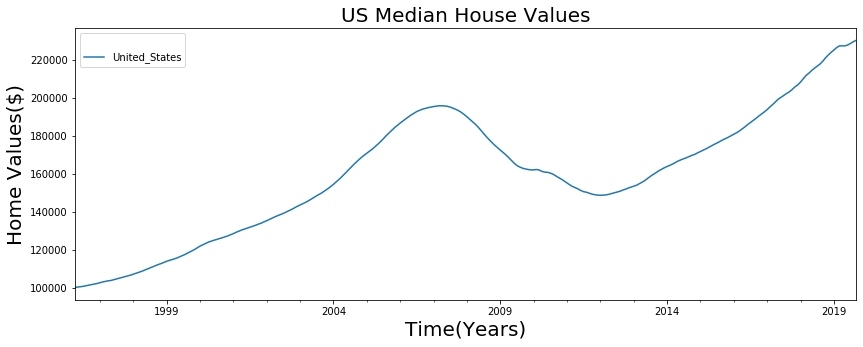

In [77]:
# Display the graphs showing the values

# home_values_all_homesVis.iplot(kind='line', fill=True, title= 'US Median House Values', 
#                                 xTitle='Time(Years)', yTitle='House Value($)')

home_values_all_homesVis.plot(figsize = (14,5))
plt.title('US Median House Values', size = 20)
plt.xlabel('Time(Years)', size = 20)
plt.ylabel('Home Values($)', size = 20)
plt.show()

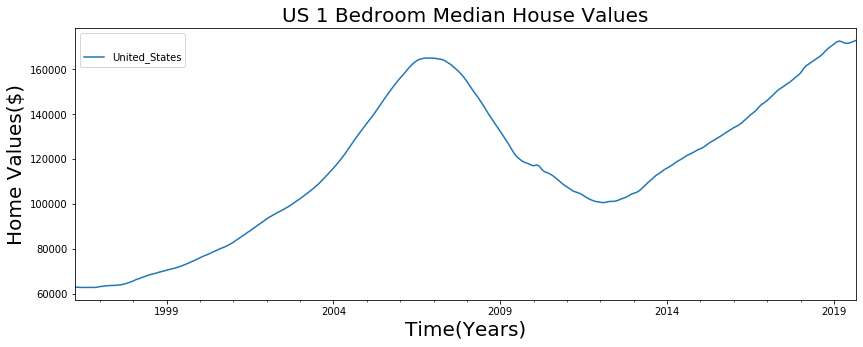

In [78]:
# home_value_1BedroomVis.iplot(kind='line', fill=True, title= 'US 1 Bedroom Median House Values', 
#                                 xTitle='Time(Years)', yTitle='House Value($)')

home_value_1BedroomVis.plot(figsize = (14,5))
plt.title('US 1 Bedroom Median House Values', size = 20)
plt.xlabel('Time(Years)', size = 20)
plt.ylabel('Home Values($)', size = 20)
plt.show()

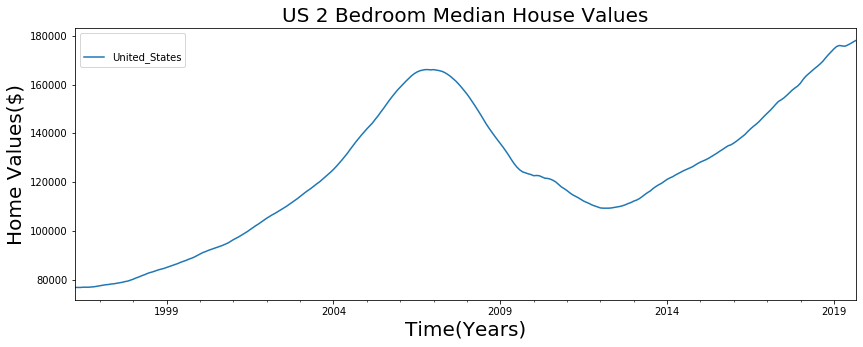

In [79]:
# home_value_2BedroomVis.iplot(kind='line', fill=True, title= 'US 2 Bedroom Median House Values', 
#                                 xTitle='Time(Years)', yTitle='House Value($)')

home_value_2BedroomVis.plot(figsize = (14,5))
plt.title('US 2 Bedroom Median House Values', size = 20)
plt.xlabel('Time(Years)', size = 20)
plt.ylabel('Home Values($)', size = 20)
plt.show()

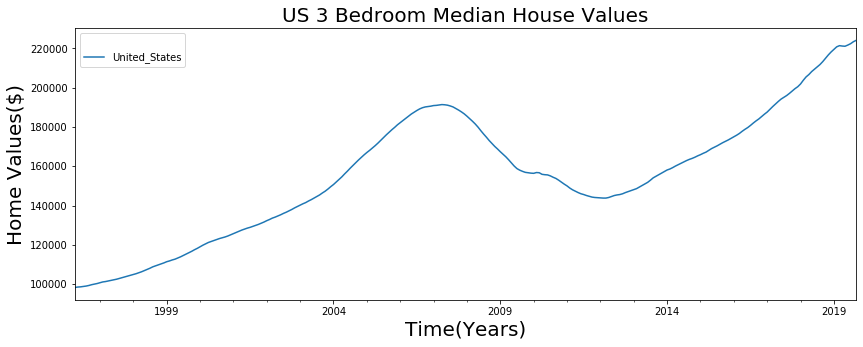

In [80]:
# home_value_3BedroomVis.iplot(kind='line', fill=True, title= 'US 3 Bedroom Median House Values', 
#                                 xTitle='Time(Years)', yTitle='House Value($)')

home_value_3BedroomVis.plot(figsize = (14,5))
plt.title('US 3 Bedroom Median House Values', size = 20)
plt.xlabel('Time(Years)', size = 20)
plt.ylabel('Home Values($)', size = 20)
plt.show()

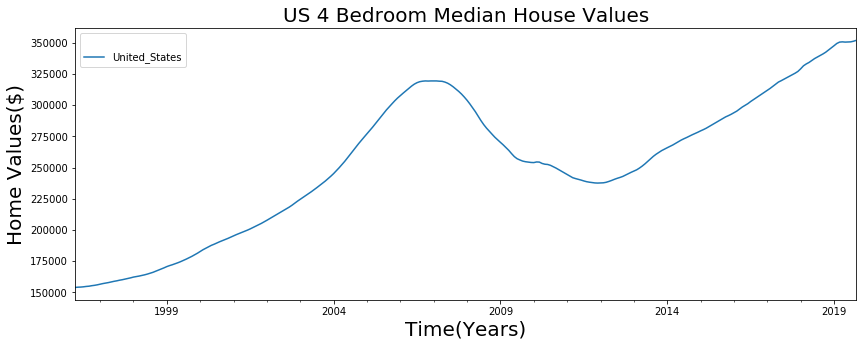

In [81]:
# home_value_4BedroomVis.iplot(kind='line', fill=True, title= 'US 4 Bedroom Median House Values', 
#                                 xTitle='Time(Years)', yTitle='House Value($)')

home_value_4BedroomVis.plot(figsize = (14,5))
plt.title('US 4 Bedroom Median House Values', size = 20)
plt.xlabel('Time(Years)', size = 20)
plt.ylabel('Home Values($)', size = 20)
plt.show()

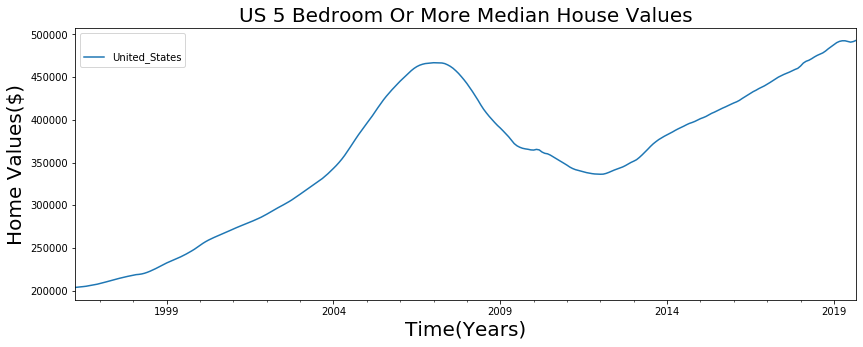

In [82]:
# home_value_5BedroomOrMoreVis.iplot(kind='line', fill=True, title= 'US 5 Bedroom Or More Median House Values', 
#                                 xTitle='Time(Years)', yTitle='House Value($)')

home_value_5BedroomOrMoreVis.plot(figsize = (14,5))
plt.title('US 5 Bedroom Or More Median House Values', size = 20)
plt.xlabel('Time(Years)', size = 20)
plt.ylabel('Home Values($)', size = 20)
plt.show()

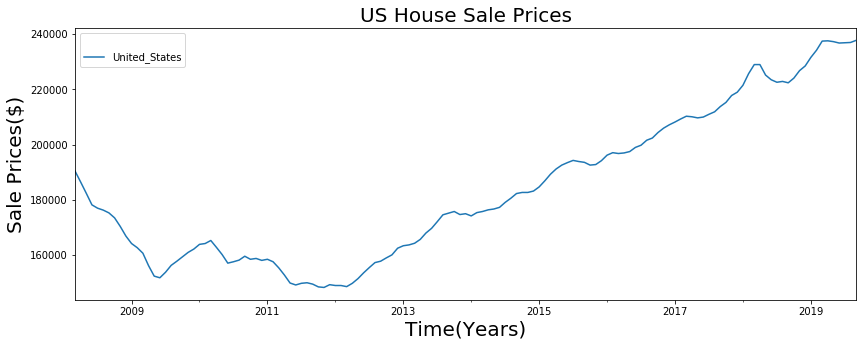

In [83]:
# sale_pricesVis.iplot(kind='line', fill=True, title= 'US Median House Prices', 
#                                 xTitle='Time(Years)', yTitle='House Prices($)')

sale_pricesVis.plot(figsize = (14,5))
plt.title('US House Sale Prices', size = 20)
plt.xlabel('Time(Years)', size = 20)
plt.ylabel('Sale Prices($)', size = 20)
plt.show()

### White Noise

In [84]:
white_noise_home_values = np.random.normal(loc = home_values_all_homes_T.United_States.mean(), scale = home_values_all_homes_T.United_States.std(),
                          size = len(home_values_all_homes_T))
home_values_all_homes_T['wn'] = white_noise_home_values
home_values_all_homes_T.describe()

,United_States,wn
count,282.000000,282.000000
mean,160277.304965,160587.329940
std,32918.542555,35321.450880
min,100200.000000,29226.729893
25%,136275.000000,140891.159899
50%,161650.000000,161513.502288
75%,184725.000000,182716.109580
max,230500.000000,267655.789200


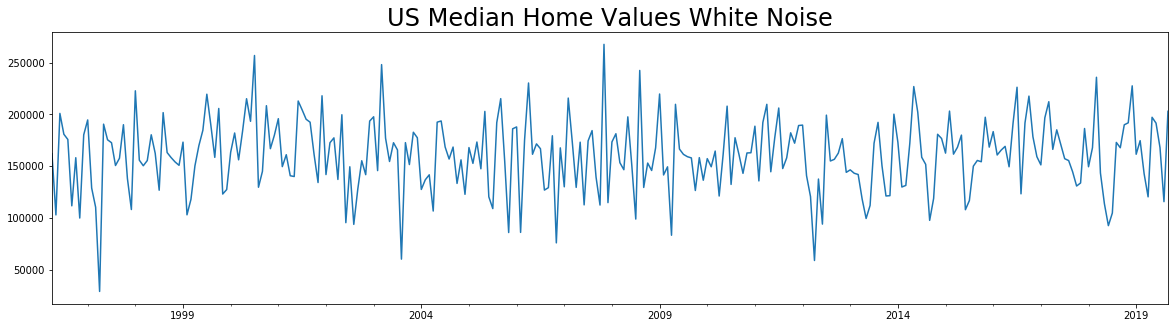

In [85]:
home_values_all_homes_T.wn.plot(figsize = (20,5))
plt.title('US Median Home Values White Noise', size = 24)
plt.show()

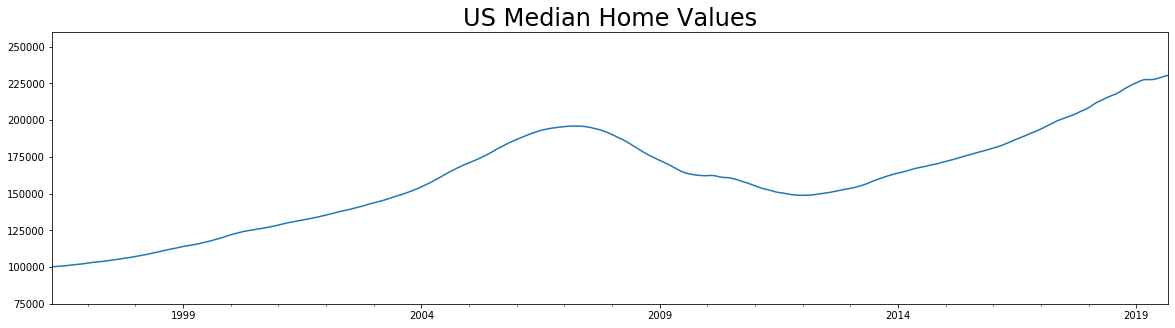

In [86]:
home_values_all_homes_T.United_States.plot(figsize=(20, 5))
plt.title('US Median Home Values', size = 24)
plt.ylim(75000, 260000)
plt.show()

In [87]:
white_noise_1Bedroom = np.random.normal(loc = home_value_1Bedroom_T.United_States.mean(), scale = home_value_1Bedroom_T.United_States.std(),
                          size = len(home_value_1Bedroom_T))
home_value_1Bedroom_T['wn'] = white_noise_1Bedroom
home_value_1Bedroom_T.describe()

,United_States,wn
count,282.000000,282.000000
mean,117075.177305,118436.900461
std,32605.160075,29443.555051
min,63000.000000,34264.819832
25%,94475.000000,98245.514328
50%,116900.000000,117074.502137
75%,144475.000000,137894.851853
max,172900.000000,195976.559297


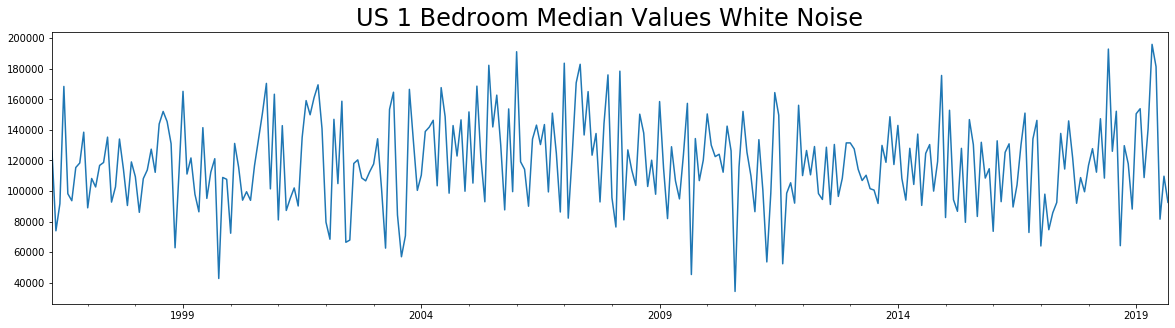

In [88]:
home_value_1Bedroom_T.wn.plot(figsize = (20,5))
plt.title('US 1 Bedroom Median Values White Noise', size = 24)
plt.show()

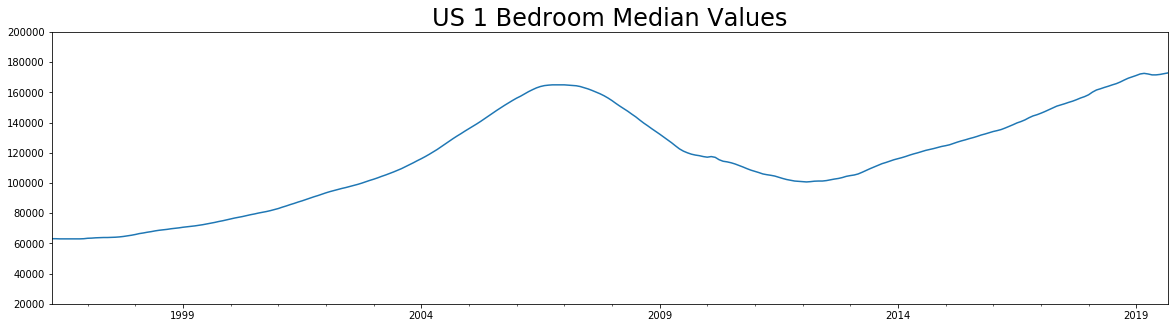

In [89]:
home_value_1Bedroom_T.United_States.plot(figsize=(20, 5))
plt.title('US 1 Bedroom Median Values', size = 24)
plt.ylim(20000, 200000)
plt.show()

In [90]:
white_noise_2Bedroom = np.random.normal(loc = home_value_2Bedroom_T.United_States.mean(), scale = home_value_2Bedroom_T.United_States.std(),
                          size = len(home_value_2Bedroom_T))
home_value_2Bedroom_T['wn'] = white_noise_2Bedroom
home_value_2Bedroom_T.describe()

,United_States,wn
count,282.000000,282.000000
mean,124308.510638,124043.967494
std,28254.777543,26213.478205
min,76800.000000,56454.289079
25%,106075.000000,104814.665029
50%,122650.000000,122386.402304
75%,147100.000000,143833.843259
max,178100.000000,197036.812446


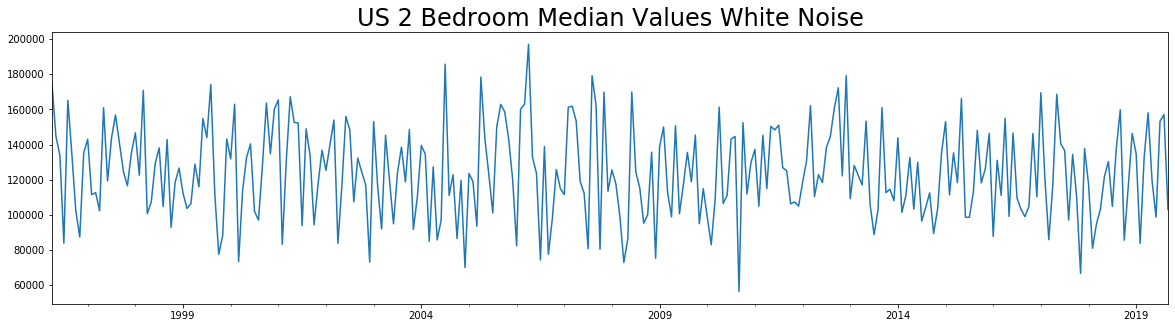

In [91]:
home_value_2Bedroom_T.wn.plot(figsize = (20,5))
plt.title('US 2 Bedroom Median Values White Noise', size = 24)
plt.show()

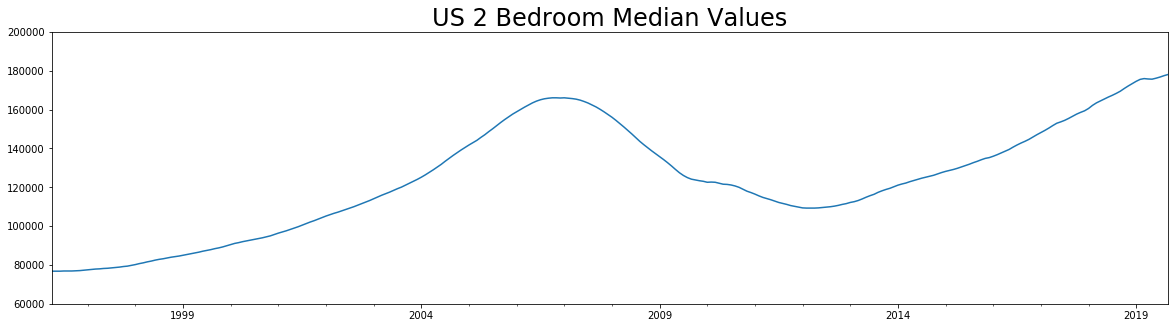

In [92]:
home_value_2Bedroom_T.United_States.plot(figsize=(20, 5))
plt.title('US 2 Bedroom Median Values', size = 24)
plt.ylim(60000, 200000)
plt.show()

In [93]:
white_noise_3Bedroom = np.random.normal(loc = home_value_3Bedroom_T.United_States.mean(), scale = home_value_3Bedroom_T.United_States.std(),
                          size = len(home_value_3Bedroom_T))
home_value_3Bedroom_T['wn'] = white_noise_3Bedroom
home_value_3Bedroom_T.describe()

,United_States,wn
count,282.000000,282.000000
mean,155722.695035,153340.781722
std,31745.355518,30793.543835
min,98300.000000,57068.764932
25%,133075.000000,132166.513568
50%,156250.000000,154936.425749
75%,179475.000000,174309.800410
max,224100.000000,238975.269202


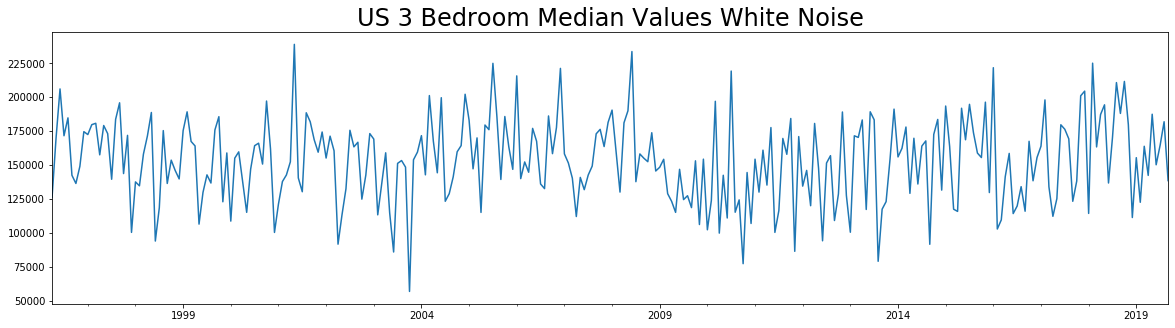

In [94]:
home_value_3Bedroom_T.wn.plot(figsize = (20,5))
plt.title('US 3 Bedroom Median Values White Noise', size = 24)
plt.show()

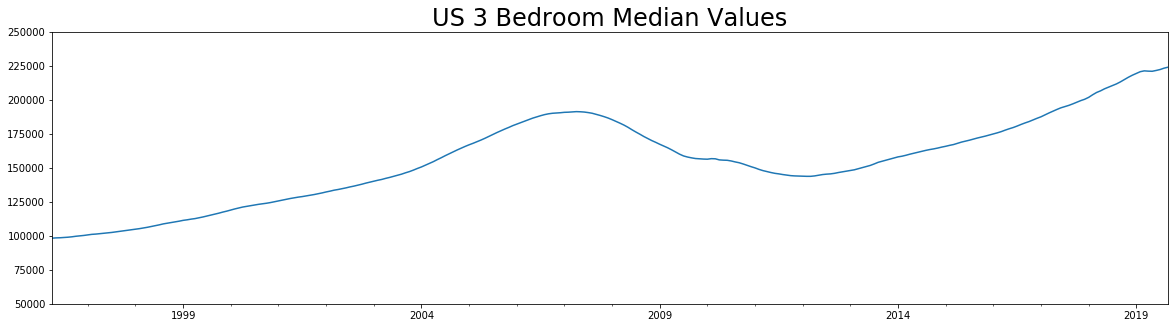

In [95]:
home_value_3Bedroom_T.United_States.plot(figsize=(20, 5))
plt.title('US 3 Bedroom Median Values', size = 24)
plt.ylim(50000, 250000)
plt.show()

In [96]:
white_noise_4Bedroom = np.random.normal(loc = home_value_4Bedroom_T.United_States.mean(), scale = home_value_4Bedroom_T.United_States.std(),
                          size = len(home_value_4Bedroom_T))
home_value_4Bedroom_T['wn'] = white_noise_4Bedroom
home_value_4Bedroom_T.describe()

,United_States,wn
count,282.000000,282.000000
mean,253318.085106,251923.443870
std,55636.167407,55398.195971
min,154000.000000,69767.882813
25%,209425.000000,214493.820432
50%,254850.000000,250168.433534
75%,298650.000000,292921.105779
max,351900.000000,401481.238638


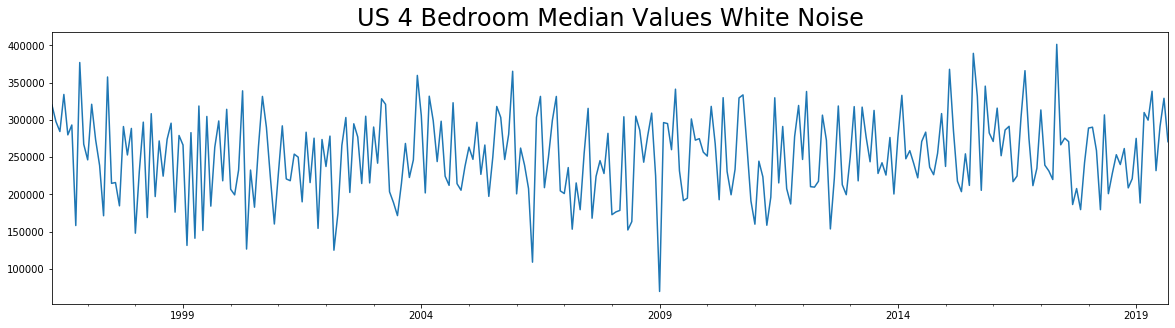

In [97]:
home_value_4Bedroom_T.wn.plot(figsize = (20,5))
plt.title('US 4 Bedroom Median Values White Noise', size = 24)
plt.show()

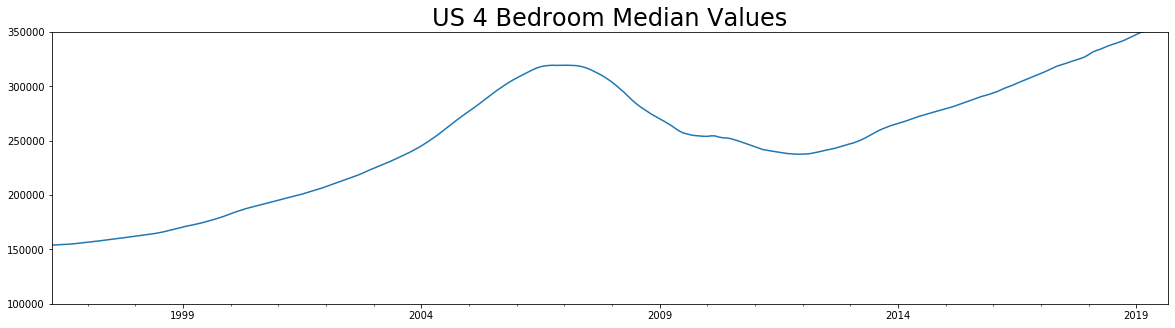

In [98]:
home_value_4Bedroom_T.United_States.plot(figsize=(20, 5))
plt.title('US 4 Bedroom Median Values', size = 24)
plt.ylim(100000, 350000)
plt.show()

In [99]:
white_noise_5BedroomOrMore = np.random.normal(loc = home_value_5BedroomOrMore_T.United_States.mean(), scale = home_value_5BedroomOrMore_T.United_States.std(),
                          size = len(home_value_5BedroomOrMore_T))
home_value_5BedroomOrMore_T['wn'] = white_noise_5BedroomOrMore
home_value_5BedroomOrMore_T.describe()

,United_States,wn
count,282.000000,282.000000
mean,358670.921986,362025.326241
std,84010.044764,86596.241368
min,203700.000000,103270.942735
25%,291875.000000,303711.619211
50%,365400.000000,365625.322535
75%,428700.000000,423915.577090
max,493100.000000,583668.716292


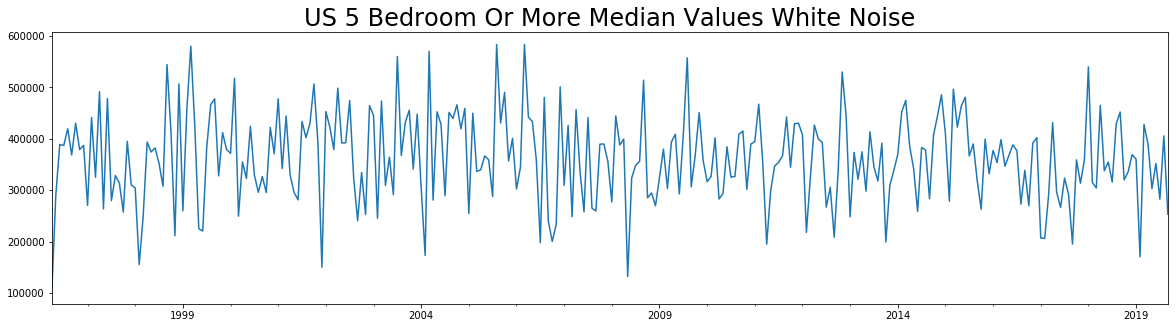

In [100]:
home_value_5BedroomOrMore_T.wn.plot(figsize = (20,5))
plt.title('US 5 Bedroom Or More Median Values White Noise', size = 24)
plt.show()

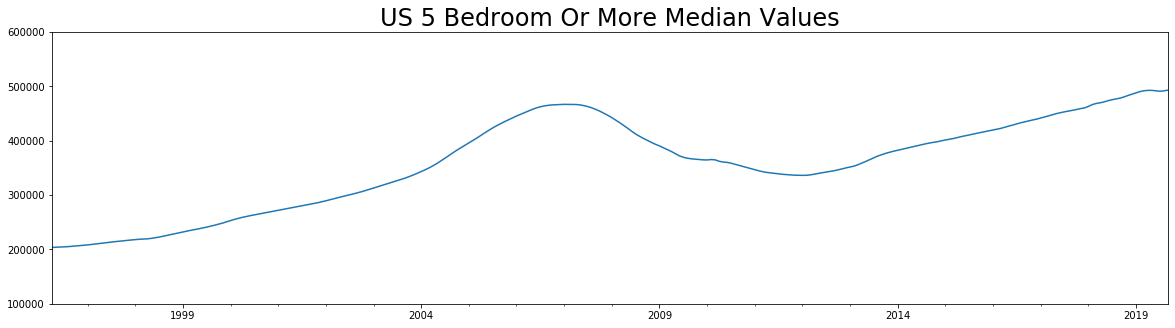

In [101]:
home_value_5BedroomOrMore_T.United_States.plot(figsize=(20, 5))
plt.title('US 5 Bedroom Or More Median Values', size = 24)
plt.ylim(100000, 600000)
plt.show()

In [102]:
white_noise_sale_prices = np.random.normal(loc = sale_prices_T.United_States.mean(), scale = sale_prices_T.United_States.std(),
                          size = len(sale_prices_T))
sale_prices_T['wn'] = white_noise_sale_prices
sale_prices_T.describe()

,United_States,wn
count,139.000000,139.000000
mean,183739.354604,180358.203313
std,27078.083680,25777.302310
min,148300.000000,107578.414777
25%,159500.000000,164595.538406
50%,176700.000000,178722.011997
75%,205200.000000,196890.120796
max,237770.290000,284594.443027


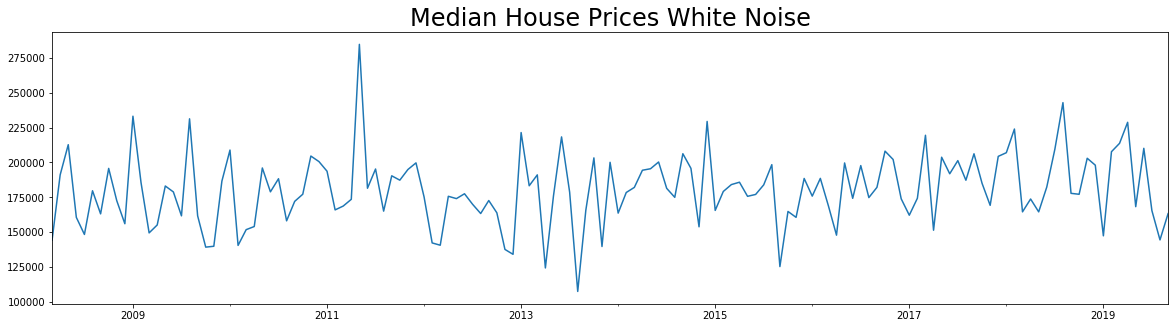

In [103]:
sale_prices_T.wn.plot(figsize = (20,5))
plt.title('Median House Prices White Noise', size = 24)
plt.show()

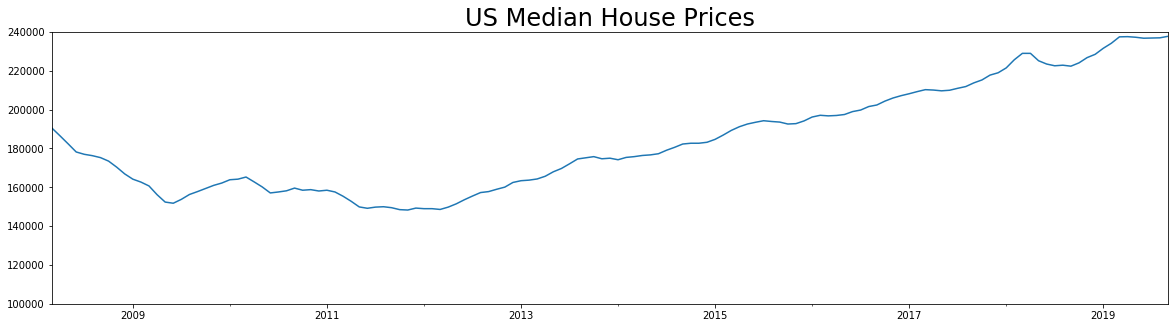

In [104]:
sale_prices_T.United_States.plot(figsize=(20, 5))
plt.title('US Median House Prices', size = 24)
plt.ylim(100000, 240000)
plt.show()

### Stationarity

Testing for stationarity for all homes Time Series

In [105]:
sts.adfuller(home_values_all_homes_T.United_States)

(-1.4642861225864545,
 0.5510987507173888,
 16,
 265,
 {'1%': -3.4552699038400827,
  '5%': -2.8725092359464526,
  '10%': -2.5726152830188678},
 3419.414343999338)

In [106]:
sts.adfuller(home_values_all_homes_T.wn)

(-16.24086635447203,
 3.7287245192656937e-29,
 0,
 281,
 {'1%': -3.4538376962008495,
  '5%': -2.8718811911083093,
  '10%': -2.5722803076202174},
 6293.437337001304)

Testing for stationarity for 1 Bedroom Time Series

In [107]:
sts.adfuller(home_value_1Bedroom_T.United_States)

(-1.7696375767767458,
 0.39563653737052856,
 13,
 268,
 {'1%': -3.454988209954765,
  '5%': -2.8723857312734613,
  '10%': -2.572549407997327},
 3527.1341463202693)

In [108]:
sts.adfuller(home_value_1Bedroom_T.wn)

(-17.383014625803952,
 5.0600852415189884e-30,
 0,
 281,
 {'1%': -3.4538376962008495,
  '5%': -2.8718811911083093,
  '10%': -2.5722803076202174},
 6214.842570191255)

Testing for stationarity for 2 Bedroom Time Series 

In [109]:
sts.adfuller(home_value_2Bedroom_T.United_States)

(-1.6815888549257831,
 0.44062254291237163,
 12,
 269,
 {'1%': -3.4548957220044336,
  '5%': -2.8723451788613157,
  '10%': -2.572527778361272},
 3421.3867895571857)

In [110]:
sts.adfuller(home_value_2Bedroom_T.wn)

(-17.10157442870383,
 7.470708823400347e-30,
 0,
 281,
 {'1%': -3.4538376962008495,
  '5%': -2.8718811911083093,
  '10%': -2.5722803076202174},
 6146.05781521097)

Testing for stationarity for 3 Bedroom Time Series

In [111]:
sts.adfuller(home_value_3Bedroom_T.United_States)

(-1.5609748064001867,
 0.5031616917070416,
 15,
 266,
 {'1%': -3.455175292841607,
  '5%': -2.8724677563219485,
  '10%': -2.57259315846006},
 3487.00351858963)

In [112]:
sts.adfuller(home_value_3Bedroom_T.wn)

(-15.391649836594311,
 3.303754206820182e-28,
 0,
 281,
 {'1%': -3.4538376962008495,
  '5%': -2.8718811911083093,
  '10%': -2.5722803076202174},
 6237.45624085256)

Testing for stationarity for 4 Bedroom Time Series

In [113]:
sts.adfuller(home_value_4Bedroom_T.United_States)

(-1.312927990612785,
 0.6232371834771179,
 13,
 268,
 {'1%': -3.454988209954765,
  '5%': -2.8723857312734613,
  '10%': -2.572549407997327},
 3566.2795038279664)

In [114]:
sts.adfuller(home_value_4Bedroom_T.wn)

(-17.756267618066293,
 3.353366350687481e-30,
 0,
 281,
 {'1%': -3.4538376962008495,
  '5%': -2.8718811911083093,
  '10%': -2.5722803076202174},
 6537.977812631458)

Testing for stationarity for 5 Or More Bedroom Time Series

In [115]:
sts.adfuller(home_value_5BedroomOrMore_T.United_States)

(-1.3568844935278328,
 0.602762953161577,
 12,
 269,
 {'1%': -3.4548957220044336,
  '5%': -2.8723451788613157,
  '10%': -2.572527778361272},
 3795.267791999897)

In [116]:
sts.adfuller(home_value_5BedroomOrMore_T.wn)

(-17.298909734360596,
 5.6445663104175695e-30,
 0,
 281,
 {'1%': -3.4538376962008495,
  '5%': -2.8718811911083093,
  '10%': -2.5722803076202174},
 6778.046352456913)

Testing for stationarity for House Prices Time Series

In [117]:
sts.adfuller(sale_prices_T.United_States)

(0.8350538862754762,
 0.992181441430482,
 12,
 126,
 {'1%': -3.4833462346078936,
  '5%': -2.8847655969877666,
  '10%': -2.5791564575459813},
 2032.0866189814517)

In [118]:
sts.adfuller(sale_prices_T.wn)

(-2.854060316619968,
 0.05095690567589235,
 6,
 132,
 {'1%': -3.4808880719210005,
  '5%': -2.8836966192225284,
  '10%': -2.5785857598714417},
 2870.3703858295353)

### Seasonality

#### Naive Decomposition

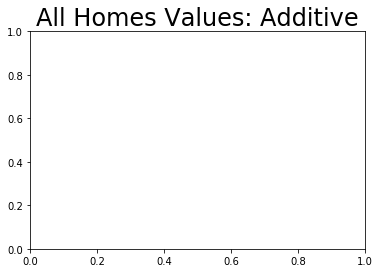

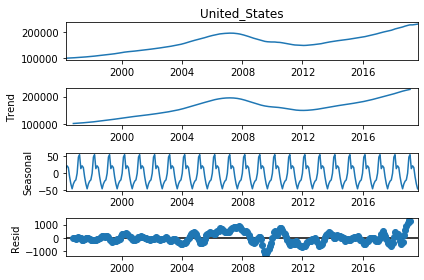

In [119]:
s_dec_home_values_add = seasonal_decompose(home_values_all_homes_T.United_States, model='additive')
plt.title("All Homes Values: Additive", size=24)
s_dec_home_values_add.plot()
plt.show()

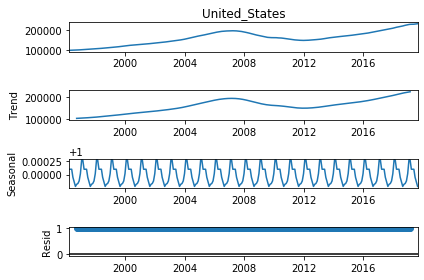

In [120]:
s_dec_home_values_mul = seasonal_decompose(home_values_all_homes_T.United_States, model='multiplicative')
s_dec_home_values_mul.plot()
plt.show()

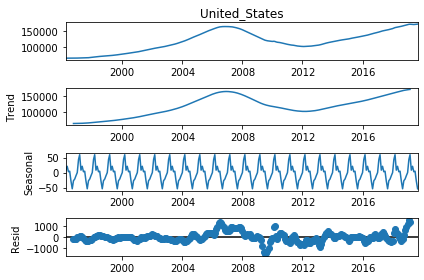

In [121]:
s_dec_1Bedroom_add = seasonal_decompose(home_value_1Bedroom_T.United_States, model='additive')
s_dec_1Bedroom_add.plot()
plt.show()

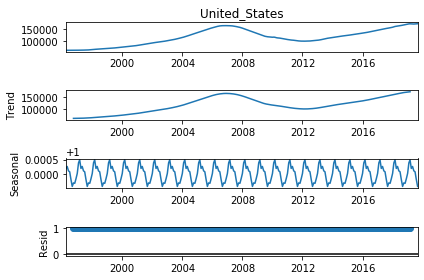

In [122]:
s_dec_1Bedroom_mul = seasonal_decompose(home_value_1Bedroom_T.United_States, model='multiplicative')
s_dec_1Bedroom_mul.plot()
plt.show()

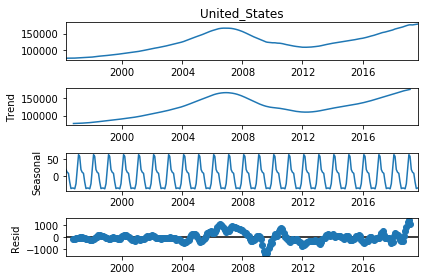

In [123]:
s_dec_2Bedroom_add = seasonal_decompose(home_value_2Bedroom_T.United_States, model='additive')
s_dec_2Bedroom_add.plot()
plt.show()

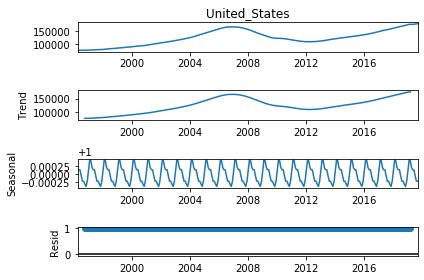

In [124]:
s_dec_2Bedroom_mul = seasonal_decompose(home_value_2Bedroom_T.United_States, model='multiplicative')
s_dec_2Bedroom_mul.plot()
plt.show()

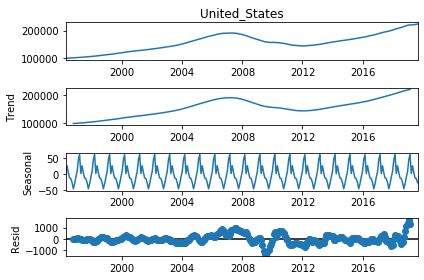

In [125]:
s_dec_3Bedroom_add = seasonal_decompose(home_value_3Bedroom_T.United_States, model='additive')
s_dec_3Bedroom_add.plot()
plt.show()

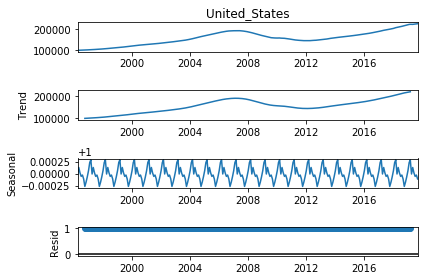

In [126]:
s_dec_3Bedroom_mul = seasonal_decompose(home_value_3Bedroom_T.United_States, model='multiplicative')
s_dec_3Bedroom_mul.plot()
plt.show()

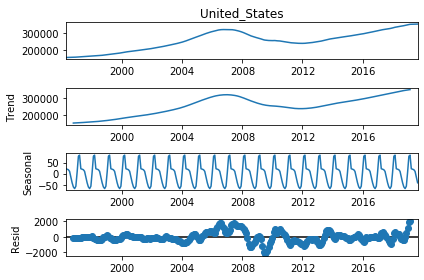

In [127]:
s_dec_4Bedroom_add = seasonal_decompose(home_value_4Bedroom_T.United_States, model='additive')
s_dec_4Bedroom_add.plot()
plt.show()

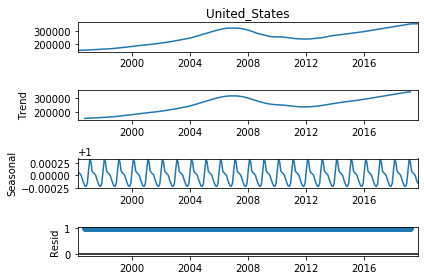

In [128]:
s_dec_4Bedroom_mul = seasonal_decompose(home_value_4Bedroom_T.United_States, model='multiplicative')
s_dec_4Bedroom_mul.plot()
plt.show()

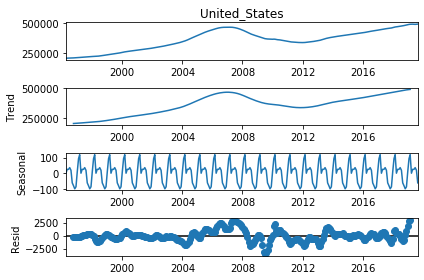

In [129]:
s_dec_5BedroomOrMore_add = seasonal_decompose(home_value_5BedroomOrMore_T.United_States, model='additive')
s_dec_5BedroomOrMore_add.plot()
plt.show()

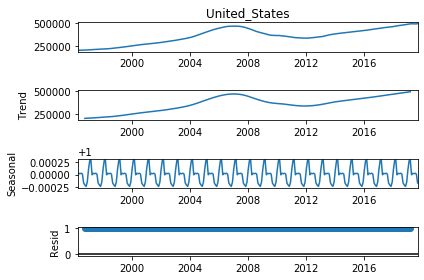

In [130]:
s_dec_5BedroomOrMore_mul = seasonal_decompose(home_value_5BedroomOrMore_T.United_States, model='multiplicative')
s_dec_5BedroomOrMore_mul.plot()
plt.show()

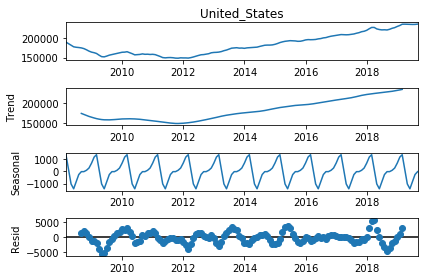

In [131]:
s_dec_sale_prices_add = seasonal_decompose(sale_prices_T.United_States, model='additive')
s_dec_sale_prices_add.plot()
plt.show()

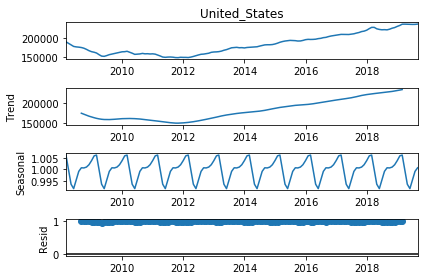

In [132]:
s_dec_sale_prices_mul = seasonal_decompose(sale_prices_T.United_States, model='multiplicative')
s_dec_sale_prices_mul.plot()
plt.show()

### Autocorrelation

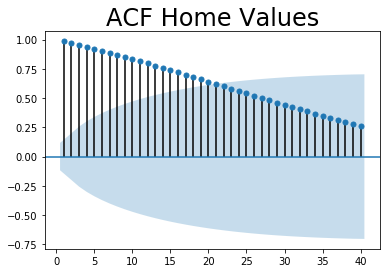

In [133]:
sgt.plot_acf(home_values_all_homes_T.United_States, lags = 40, zero = False)
plt.title('ACF Home Values', size = 24)
plt.show()

Autocorrelation for white noise

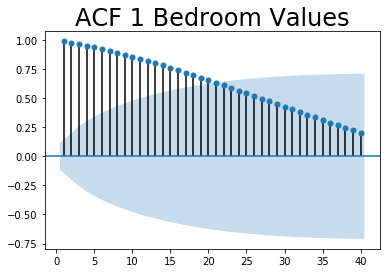

In [134]:
sgt.plot_acf(home_value_1Bedroom_T.United_States, lags = 40, zero = False)
plt.title('ACF 1 Bedroom Values', size = 24)
plt.show()

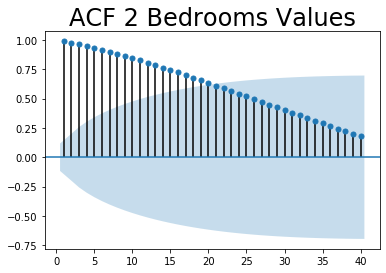

In [135]:
sgt.plot_acf(home_value_2Bedroom_T.United_States, lags = 40, zero = False)
plt.title('ACF 2 Bedrooms Values', size = 24)
plt.show()

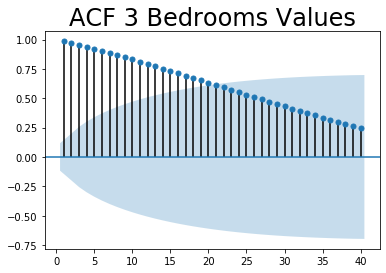

In [136]:
sgt.plot_acf(home_value_3Bedroom_T.United_States, lags = 40, zero = False)
plt.title('ACF 3 Bedrooms Values', size = 24)
plt.show()

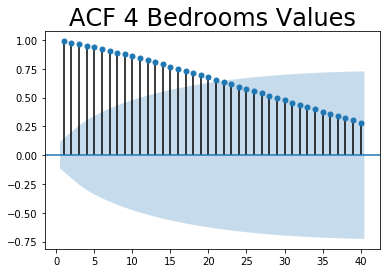

In [137]:
sgt.plot_acf(home_value_4Bedroom_T.United_States, lags = 40, zero = False)
plt.title('ACF 4 Bedrooms Values', size = 24)
plt.show()

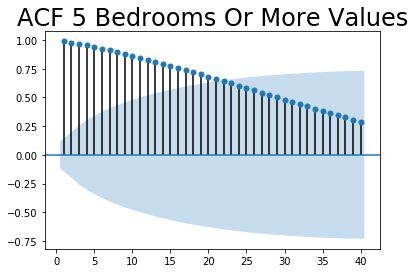

In [138]:
sgt.plot_acf(home_value_5BedroomOrMore_T.United_States, lags = 40, zero = False)
plt.title('ACF 5 Bedrooms Or More Values', size = 24)
plt.show()

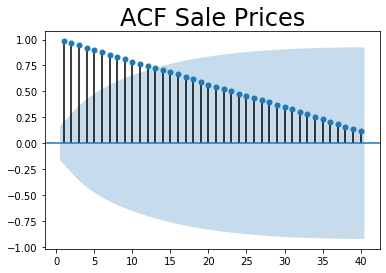

In [139]:
sgt.plot_acf(sale_prices_T.United_States, lags = 40, zero = False)
plt.title('ACF Sale Prices', size = 24)
plt.show()

### Partial AutoCorrelation Function

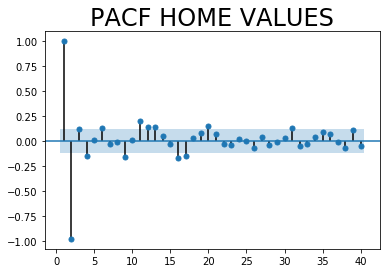

In [140]:
sgt.plot_pacf(home_values_all_homes_T.United_States, lags = 40, zero = False, method = ('ols'))
plt.title('PACF HOME VALUES', size = 24)
plt.show()

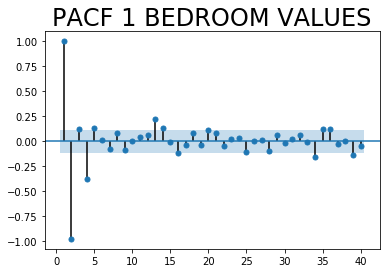

In [141]:
sgt.plot_pacf(home_value_1Bedroom_T.United_States, lags = 40, zero = False, method = ('ols'))
plt.title('PACF 1 BEDROOM VALUES', size = 24)
plt.show()

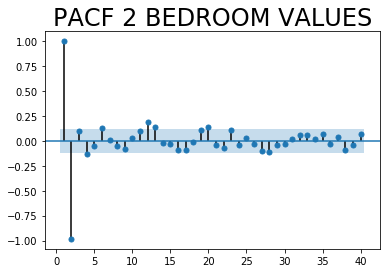

In [142]:
sgt.plot_pacf(home_value_2Bedroom_T.United_States, lags = 40, zero = False, method = ('ols'))
plt.title('PACF 2 BEDROOM VALUES', size = 24)
plt.show()

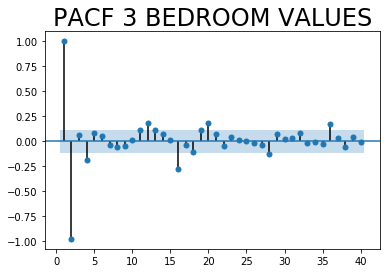

In [143]:
sgt.plot_pacf(home_value_3Bedroom_T.United_States, lags = 40, zero = False, method = ('ols'))
plt.title('PACF 3 BEDROOM VALUES', size = 24)
plt.show()

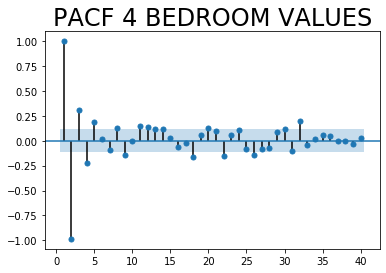

In [144]:
sgt.plot_pacf(home_value_4Bedroom_T.United_States, lags = 40, zero = False, method = ('ols'))
plt.title('PACF 4 BEDROOM VALUES', size = 24)
plt.show()

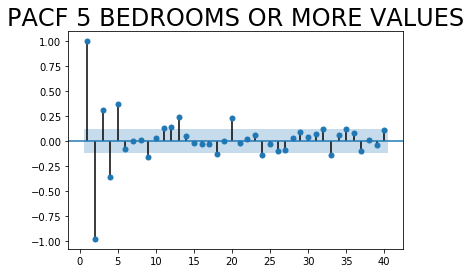

In [145]:
sgt.plot_pacf(home_value_5BedroomOrMore_T.United_States, lags = 40, zero = False, method = ('ols'))
plt.title('PACF 5 BEDROOMS OR MORE VALUES', size = 24)
plt.show()

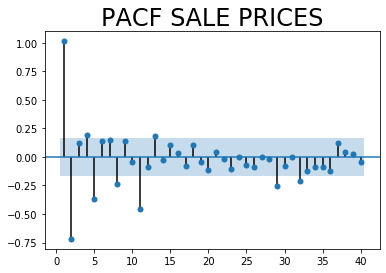

In [146]:
sgt.plot_pacf(sale_prices_T.United_States, lags = 40, zero = False, method = ('ols'))
plt.title('PACF SALE PRICES', size = 24)
plt.show()

## MODELS

## ARIMA MODEL

## ARIMA(1,1,1)

In [147]:
import warnings
warnings.filterwarnings("ignore")

In [148]:
model_arima_homes = ARIMA(home_values_all_homes_T.United_States, order=(1,1,1))
results_arima_homes = model_arima_homes.fit()
results_arima_homes.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:          United_States   No. Observations:                  282
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2088.950
Date:                Fri, 05 Jun 2020   AIC                           4183.901
Time:                        19:00:21   BIC                           4194.816
Sample:                    04-01-1996   HQIC                          4188.278
                         - 09-01-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9322      0.004    228.753      0.000       0.924       0.940
ma.L1         -0.5696      0.013    -42.896      0.000      -0.596      -0.544
sigma2      2.949e+04   1146.450     25.725      0.000    2.72e+04    3.17e+04
===================================================================================
Ljung-Box (Q):                      328.90   Jarque-Bera (JB):              6831.56
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.76   Skew:                            -3.14
Prob(H) (two-sided):                  0.19   Kurtosis:                        26.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [149]:
model_arima_1B = ARIMA(home_value_1Bedroom_T.United_States, order=(1,1,1))
results_arima_1B = model_arima_1B.fit()
results_arima_1B.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:          United_States   No. Observations:                  282
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2088.206
Date:                Fri, 05 Jun 2020   AIC                           4182.412
Time:                        19:00:21   BIC                           4193.327
Sample:                    04-01-1996   HQIC                          4186.789
                         - 09-01-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9279      0.005    179.106      0.000       0.918       0.938
ma.L1         -0.5179      0.017    -29.600      0.000      -0.552      -0.484
sigma2      4.605e+04   1661.657     27.711      0.000    4.28e+04    4.93e+04
===================================================================================
Ljung-Box (Q):                      284.31   Jarque-Bera (JB):              5917.94
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.67   Skew:                            -3.06
Prob(H) (two-sided):                  0.06   Kurtosis:                        24.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [150]:
model_arima_2B = ARIMA(home_value_2Bedroom_T.United_States, order=(1,1,1))
results_arima_2B = model_arima_2B.fit()
results_arima_2B.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:          United_States   No. Observations:                  282
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2032.404
Date:                Fri, 05 Jun 2020   AIC                           4070.808
Time:                        19:00:21   BIC                           4081.723
Sample:                    04-01-1996   HQIC                          4075.186
                         - 09-01-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9243      0.005    203.553      0.000       0.915       0.933
ma.L1         -0.4067      0.020    -20.455      0.000      -0.446      -0.368
sigma2      2.337e+04   1052.259     22.207      0.000    2.13e+04    2.54e+04
===================================================================================
Ljung-Box (Q):                      245.51   Jarque-Bera (JB):              9596.90
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.72   Skew:                            -3.34
Prob(H) (two-sided):                  0.11   Kurtosis:                        30.84
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [151]:
model_arima_3B = ARIMA(home_value_3Bedroom_T.United_States, order=(1,1,1))
results_arima_3B = model_arima_3B.fit()
results_arima_3B.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:          United_States   No. Observations:                  282
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2108.420
Date:                Fri, 05 Jun 2020   AIC                           4222.839
Time:                        19:00:21   BIC                           4233.754
Sample:                    04-01-1996   HQIC                          4227.217
                         - 09-01-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9337      0.004    233.191      0.000       0.926       0.942
ma.L1         -0.6368      0.012    -54.604      0.000      -0.660      -0.614
sigma2      4.096e+04   1625.498     25.197      0.000    3.78e+04    4.41e+04
===================================================================================
Ljung-Box (Q):                      383.04   Jarque-Bera (JB):              4263.67
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.78   Skew:                            -2.84
Prob(H) (two-sided):                  0.23   Kurtosis:                        21.22
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [152]:
model_arima_4B = ARIMA(home_value_4Bedroom_T.United_States, order=(1,1,1))
results_arima_4B = model_arima_4B.fit()
results_arima_4B.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:          United_States   No. Observations:                  282
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2381.896
Date:                Fri, 05 Jun 2020   AIC                           4769.793
Time:                        19:00:22   BIC                           4780.708
Sample:                    04-01-1996   HQIC                          4774.170
                         - 09-01-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9511      0.008    111.999      0.000       0.934       0.968
ma.L1         -0.9121      0.011    -86.297      0.000      -0.933      -0.891
sigma2      1.019e+06   4.72e-10   2.16e+15      0.000    1.02e+06    1.02e+06
===================================================================================
Ljung-Box (Q):                     2234.14   Jarque-Bera (JB):                97.01
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.63   Skew:                            -1.26
Prob(H) (two-sided):                  0.03   Kurtosis:                         4.40
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.46e+30. Standard errors may be unstable.
"""

In [153]:
model_arima_5B = ARIMA(home_value_5BedroomOrMore_T.United_States, order=(1,1,1))
results_arima_5B = model_arima_5B.fit()
results_arima_5B.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:          United_States   No. Observations:                  282
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2516.113
Date:                Fri, 05 Jun 2020   AIC                           5038.225
Time:                        19:00:22   BIC                           5049.140
Sample:                    04-01-1996   HQIC                          5042.603
                         - 09-01-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9522      0.011     90.300      0.000       0.932       0.973
ma.L1         -0.9225      0.012    -73.957      0.000      -0.947      -0.898
sigma2      3.183e+06   2.07e-10   1.54e+16      0.000    3.18e+06    3.18e+06
===================================================================================
Ljung-Box (Q):                     2381.49   Jarque-Bera (JB):                56.66
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.67   Skew:                            -1.01
Prob(H) (two-sided):                  0.05   Kurtosis:                         3.89
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.33e+31. Standard errors may be unstable.
"""

In [154]:
model_arima_sales = ARIMA(sale_prices_T.United_States, order=(1,1,1))
results_arima_sales = model_arima_sales.fit()
results_arima_sales.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:          United_States   No. Observations:                  139
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1220.345
Date:                Fri, 05 Jun 2020   AIC                           2446.690
Time:                        19:00:22   BIC                           2455.472
Sample:                    03-01-2008   HQIC                          2450.259
                         - 09-01-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8516      0.069     12.313      0.000       0.716       0.987
ma.L1         -0.8726      0.064    -13.645      0.000      -0.998      -0.747
sigma2      2.871e+06   7.34e-09   3.91e+14      0.000    2.87e+06    2.87e+06
===================================================================================
Ljung-Box (Q):                      196.57   Jarque-Bera (JB):                10.31
Prob(Q):                              0.00   Prob(JB):                         0.01
Heteroskedasticity (H):               1.06   Skew:                            -0.63
Prob(H) (two-sided):                  0.85   Kurtosis:                         3.43
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.37e+30. Standard errors may be unstable.
"""

## Residuals of the ARIMA(1,1,1)

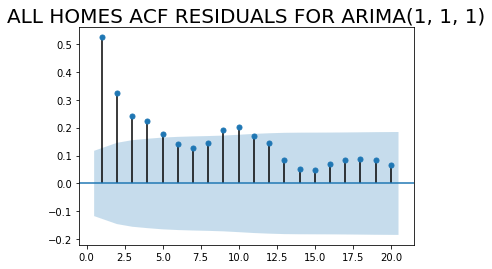

In [155]:
home_values_all_homes_T['res_arima1'] = results_arima_homes.resid
sgt.plot_acf(home_values_all_homes_T.res_arima1[1:], zero = False, lags = 20)
plt.title('ALL HOMES ACF RESIDUALS FOR ARIMA(1, 1, 1)', size = 20)
plt.show()

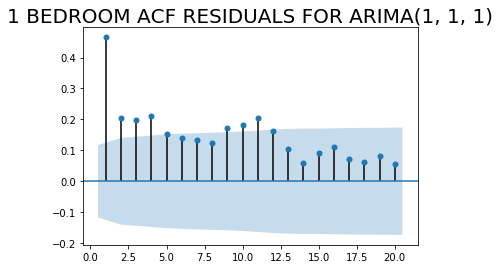

In [156]:
home_value_1Bedroom_T['res_arima1'] = results_arima_1B.resid
sgt.plot_acf(home_value_1Bedroom_T.res_arima1[1:], zero = False, lags = 20)
plt.title('1 BEDROOM ACF RESIDUALS FOR ARIMA(1, 1, 1)', size = 20)
plt.show()

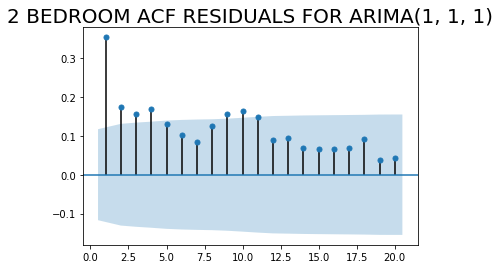

In [157]:
home_value_2Bedroom_T['res_arima1'] = results_arima_2B.resid
sgt.plot_acf(home_value_2Bedroom_T.res_arima1[1:], zero = False, lags = 20)
plt.title('2 BEDROOM ACF RESIDUALS FOR ARIMA(1, 1, 1)', size = 20)
plt.show()

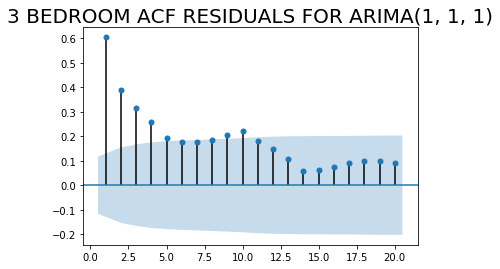

In [158]:
home_value_3Bedroom_T['res_arima1'] = results_arima_3B.resid
sgt.plot_acf(home_value_3Bedroom_T.res_arima1[1:], zero = False, lags = 20)
plt.title('3 BEDROOM ACF RESIDUALS FOR ARIMA(1, 1, 1)', size = 20)
plt.show()

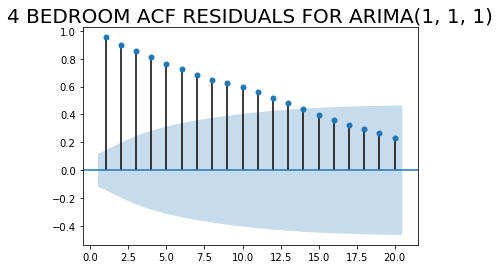

In [159]:
home_value_4Bedroom_T['res_arima1'] = results_arima_4B.resid
sgt.plot_acf(home_value_4Bedroom_T.res_arima1[1:], zero = False, lags = 20)
plt.title('4 BEDROOM ACF RESIDUALS FOR ARIMA(1, 1, 1)', size = 20)
plt.show()

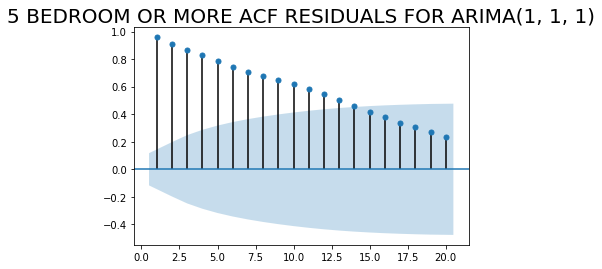

In [160]:
home_value_5BedroomOrMore_T['res_arima1'] = results_arima_5B.resid
sgt.plot_acf(home_value_5BedroomOrMore_T.res_arima1[1:], zero = False, lags = 20)
plt.title('5 BEDROOM OR MORE ACF RESIDUALS FOR ARIMA(1, 1, 1)', size = 20)
plt.show()

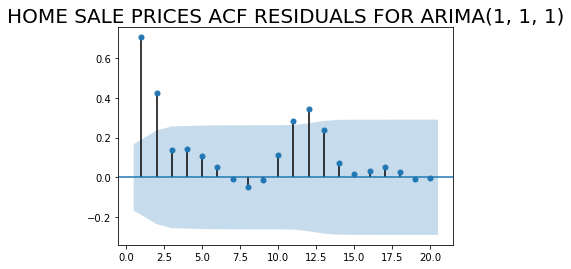

In [161]:
sale_prices_T['res_arima1'] = results_arima_sales.resid
sgt.plot_acf(sale_prices_T.res_arima1[1:], zero = False, lags = 20)
plt.title('HOME SALE PRICES ACF RESIDUALS FOR ARIMA(1, 1, 1)', size = 20)
plt.show()

## HIGHER-LAG ARIMA MODELS

In [162]:
model_arima_homes = ARIMA(home_values_all_homes_T.United_States, order=(6,1,4))
results_arima_homes = model_arima_homes.fit()
results_arima_homes.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:          United_States   No. Observations:                  282
Model:                 ARIMA(6, 1, 4)   Log Likelihood               -2074.503
Date:                Fri, 05 Jun 2020   AIC                           4171.006
Time:                        19:00:24   BIC                           4211.028
Sample:                    04-01-1996   HQIC                          4187.057
                         - 09-01-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3962     10.789     -0.037      0.971     -21.542      20.750
ar.L2          0.5128      0.513      0.999      0.318      -0.493       1.519
ar.L3          0.7470      5.198      0.144      0.886      -9.440      10.934
ar.L4          0.0310      5.767      0.005      0.996     -11.273      11.335
ar.L5         -0.0677      2.188     -0.031      0.975      -4.357       4.222
ar.L6          0.0049      0.261      0.019      0.985      -0.507       0.517
ma.L1          1.0464     10.786      0.097      0.923     -20.094      22.187
ma.L2          0.1372      6.534      0.021      0.983     -12.670      12.944
ma.L3         -0.6393      1.283     -0.498      0.618      -3.153       1.874
ma.L4         -0.2571      6.267     -0.041      0.967     -12.541      12.027
sigma2      2.173e+04   1143.079     19.008      0.000    1.95e+04     2.4e+04
===================================================================================
Ljung-Box (Q):                      271.12   Jarque-Bera (JB):             12393.96
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.72   Skew:                            -3.70
Prob(H) (two-sided):                  0.12   Kurtosis:                        34.69
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [163]:
model_arima_homes = ARIMA(home_value_1Bedroom_T.United_States, order=(2,1,1))
results_arima_homes = model_arima_homes.fit()
results_arima_homes.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:          United_States   No. Observations:                  282
Model:                 ARIMA(2, 1, 1)   Log Likelihood               -2074.413
Date:                Fri, 05 Jun 2020   AIC                           4156.826
Time:                        19:00:24   BIC                           4171.379
Sample:                    04-01-1996   HQIC                          4162.662
                         - 09-01-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3530      0.052     26.263      0.000       1.252       1.454
ar.L2         -0.3865      0.047     -8.176      0.000      -0.479      -0.294
ma.L1         -0.7441      0.032    -23.160      0.000      -0.807      -0.681
sigma2      3.888e+04   1695.207     22.934      0.000    3.56e+04    4.22e+04
===================================================================================
Ljung-Box (Q):                      273.31   Jarque-Bera (JB):              8763.53
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.64   Skew:                            -3.33
Prob(H) (two-sided):                  0.03   Kurtosis:                        29.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [164]:
model_arima_homes = ARIMA(home_value_2Bedroom_T.United_States, order=(1,1,2))
results_arima_homes = model_arima_homes.fit()
results_arima_homes.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:          United_States   No. Observations:                  282
Model:                 ARIMA(1, 1, 2)   Log Likelihood               -2019.141
Date:                Fri, 05 Jun 2020   AIC                           4046.283
Time:                        19:00:24   BIC                           4060.836
Sample:                    04-01-1996   HQIC                          4052.119
                         - 09-01-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9381      0.005    184.788      0.000       0.928       0.948
ma.L1         -0.2032      0.035     -5.889      0.000      -0.271      -0.136
ma.L2         -0.2558      0.031     -8.284      0.000      -0.316      -0.195
sigma2      2.059e+04   1100.304     18.710      0.000    1.84e+04    2.27e+04
===================================================================================
Ljung-Box (Q):                      238.35   Jarque-Bera (JB):             10713.77
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.65   Skew:                            -3.40
Prob(H) (two-sided):                  0.04   Kurtosis:                        32.47
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [165]:
model_arima_homes = ARIMA(home_value_3Bedroom_T.United_States, order=(2,1,3))
results_arima_homes = model_arima_homes.fit()
results_arima_homes.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:          United_States   No. Observations:                  282
Model:                 ARIMA(2, 1, 3)   Log Likelihood               -2097.496
Date:                Fri, 05 Jun 2020   AIC                           4206.993
Time:                        19:00:24   BIC                           4228.823
Sample:                    04-01-1996   HQIC                          4215.748
                         - 09-01-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.5489     73.610      0.021      0.983    -142.724     145.822
ar.L2         -0.5714     69.394     -0.008      0.993    -136.580     135.437
ma.L1         -0.9831     73.610     -0.013      0.989    -145.257     143.291
ma.L2         -0.0204     27.748     -0.001      0.999     -54.406      54.365
ma.L3          0.1510     18.311      0.008      0.993     -35.737      36.039
sigma2      3.027e+04   1549.640     19.537      0.000    2.72e+04    3.33e+04
===================================================================================
Ljung-Box (Q):                      304.15   Jarque-Bera (JB):             10386.19
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.71   Skew:                            -3.52
Prob(H) (two-sided):                  0.10   Kurtosis:                        31.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [166]:
model_arima_homes = ARIMA(home_value_4Bedroom_T.United_States, order=(2,1,3))
results_arima_homes = model_arima_homes.fit()
results_arima_homes.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:          United_States   No. Observations:                  282
Model:                 ARIMA(2, 1, 3)   Log Likelihood               -2382.021
Date:                Fri, 05 Jun 2020   AIC                           4776.043
Time:                        19:00:25   BIC                           4797.873
Sample:                    04-01-1996   HQIC                          4784.798
                         - 09-01-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0452      0.029     -1.533      0.125      -0.103       0.013
ar.L2          0.9532      0.027     34.854      0.000       0.900       1.007
ma.L1          0.0787      0.031      2.531      0.011       0.018       0.140
ma.L2         -0.9158      0.029    -31.392      0.000      -0.973      -0.859
ma.L3          0.0034      0.005      0.725      0.469      -0.006       0.012
sigma2      1.019e+06    2.3e-09   4.43e+14      0.000    1.02e+06    1.02e+06
===================================================================================
Ljung-Box (Q):                     2290.07   Jarque-Bera (JB):                83.65
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.67   Skew:                            -1.21
Prob(H) (two-sided):                  0.05   Kurtosis:                         4.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.94e+30. Standard errors may be unstable.
"""

In [167]:
model_arima_homes = ARIMA(home_value_5BedroomOrMore_T.United_States, order=(2,1,4))
results_arima_homes = model_arima_homes.fit()
results_arima_homes.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:          United_States   No. Observations:                  282
Model:                 ARIMA(2, 1, 4)   Log Likelihood               -2515.947
Date:                Fri, 05 Jun 2020   AIC                           5045.894
Time:                        19:00:25   BIC                           5071.362
Sample:                    04-01-1996   HQIC                          5056.108
                         - 09-01-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0188      1.260      0.015      0.988      -2.452       2.489
ar.L2          0.8842      1.199      0.737      0.461      -1.466       3.234
ma.L1          0.0061      1.260      0.005      0.996      -2.464       2.477
ma.L2         -0.8604      1.168     -0.737      0.461      -3.149       1.428
ma.L3          0.0052      0.005      0.954      0.340      -0.006       0.016
ma.L4          0.0054      0.007      0.784      0.433      -0.008       0.019
sigma2      3.197e+06   8.02e-07   3.99e+12      0.000     3.2e+06     3.2e+06
===================================================================================
Ljung-Box (Q):                     2387.43   Jarque-Bera (JB):                52.62
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.67   Skew:                            -0.99
Prob(H) (two-sided):                  0.05   Kurtosis:                         3.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.59e+29. Standard errors may be unstable.
"""

In [168]:
model_arima_homes = ARIMA(sale_prices_T.United_States, order=(3,1,1))
results_arima_homes = model_arima_homes.fit()
results_arima_homes.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:          United_States   No. Observations:                  139
Model:                 ARIMA(3, 1, 1)   Log Likelihood               -1259.370
Date:                Fri, 05 Jun 2020   AIC                           2528.741
Time:                        19:00:25   BIC                           2543.377
Sample:                    03-01-2008   HQIC                          2534.689
                         - 09-01-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0537      0.303      0.177      0.860      -0.541       0.648
ar.L2         -0.0188      0.006     -3.058      0.002      -0.031      -0.007
ar.L3         -0.0286      0.011     -2.494      0.013      -0.051      -0.006
ma.L1         -0.0638      0.303     -0.210      0.833      -0.658       0.531
sigma2      1.221e+06   6.04e+04     20.219      0.000     1.1e+06    1.34e+06
===================================================================================
Ljung-Box (Q):                      225.64   Jarque-Bera (JB):                11.17
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.82   Skew:                            -0.68
Prob(H) (two-sided):                  0.49   Kurtosis:                         3.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [169]:
model_arima1_homes = ARIMA(home_values_all_homes_T.United_States, order=(2,1,6))
results_arima1_homes = model_arima1_homes.fit()
model_arima2_homes = ARIMA(home_values_all_homes_T.United_States, order=(6,1,4))
results_arima2_homes = model_arima2_homes.fit()

In [170]:
print("ARIMA(2,1,6) FOR ALL HOME VALUES \t AIC = ", results_arima1_homes.aic)
print("ARIMA(6,1,4) FOR ALL HOME VALUES \t AIC = ", results_arima2_homes.aic)

ARIMA(2,1,6) FOR ALL HOME VALUES 	 AIC =  4165.74590497594
ARIMA(6,1,4) FOR ALL HOME VALUES 	 AIC =  4171.00622724249


In [171]:
model_arima1_1B = ARIMA(home_value_1Bedroom_T.United_States, order=(1,1,1))
results_arima1_1B = model_arima1_1B.fit()
model_arima2_1B = ARIMA(home_value_1Bedroom_T.United_States, order=(1,1,2))
results_arima2_1B = model_arima2_1B.fit()
model_arima3_1B = ARIMA(home_value_1Bedroom_T.United_States, order=(2,1,1))
results_arima3_1B = model_arima3_1B.fit()

In [172]:
print("ARIMA(1,1,1) FOR 1 BEDROOM VALUES \t AIC = ", results_arima1_1B.aic)
print("ARIMA(1,1,2) FOR 1 BEDROOM VALUES \t AIC = ", results_arima2_1B.aic)
print("ARIMA(2,1,1) FOR 1 BEDROOM VALUES \t AIC = ", results_arima3_1B.aic)

ARIMA(1,1,1) FOR 1 BEDROOM VALUES 	 AIC =  4182.411761282547
ARIMA(1,1,2) FOR 1 BEDROOM VALUES 	 AIC =  4127.45344074373
ARIMA(2,1,1) FOR 1 BEDROOM VALUES 	 AIC =  4156.825670703314


In [173]:
model_arima1_2B = ARIMA(home_value_2Bedroom_T.United_States, order=(1,1,2))
results_arima1_2B = model_arima1_2B.fit()
model_arima2_2B = ARIMA(home_value_2Bedroom_T.United_States, order=(1,1,3))
results_arima2_2B = model_arima2_2B.fit()

In [174]:
print("ARIMA(1,1,2) FOR 2 BEDROOM VALUES \t AIC = ", results_arima1_2B.aic)
print("ARIMA(1,1,3) FOR 2 BEDROOM VALUES \t AIC = ", results_arima2_2B.aic)

ARIMA(1,1,2) FOR 2 BEDROOM VALUES 	 AIC =  4046.2825173183883
ARIMA(1,1,3) FOR 2 BEDROOM VALUES 	 AIC =  4046.9514281972865


In [175]:
model_arima1_3B = ARIMA(home_value_3Bedroom_T.United_States, order=(1,1,2))
results_arima1_3B = model_arima1_3B.fit()
model_arima2_3B = ARIMA(home_value_3Bedroom_T.United_States, order=(2,1,1))
results_arima2_3B = model_arima2_3B.fit()
model_arima3_3B = ARIMA(home_value_3Bedroom_T.United_States, order=(2,1,3))
results_arima3_3B = model_arima3_3B.fit()

In [176]:
print("ARIMA(1,1,2) FOR 3 BEDROOM VALUES \t AIC = ", results_arima1_3B.aic)
print("ARIMA(2,1,1) FOR 3 BEDROOM VALUES \t AIC = ", results_arima2_3B.aic)
print("ARIMA(2,1,3) FOR 3 BEDROOM VALUES \t AIC = ", results_arima3_3B.aic)

ARIMA(1,1,2) FOR 3 BEDROOM VALUES 	 AIC =  4202.981892812327
ARIMA(2,1,1) FOR 3 BEDROOM VALUES 	 AIC =  4206.129526577986
ARIMA(2,1,3) FOR 3 BEDROOM VALUES 	 AIC =  4206.992843340209


In [177]:
model_arima1_4B = ARIMA(home_value_4Bedroom_T.United_States, order=(1,1,1))
results_arima1_4B = model_arima1_4B.fit()
model_arima2_4B = ARIMA(home_value_4Bedroom_T.United_States, order=(2,1,3))
results_arima2_4B = model_arima2_4B.fit()

In [178]:
print("ARIMA(1,1,1) FOR 4 BEDROOM VALUES \t AIC = ", results_arima1_4B.aic)
print("ARIMA(2,1,3) FOR 4 BEDROOM VALUES \t AIC = ", results_arima2_4B.aic)

ARIMA(1,1,1) FOR 4 BEDROOM VALUES 	 AIC =  4769.792574902876
ARIMA(2,1,3) FOR 4 BEDROOM VALUES 	 AIC =  4776.042725849057


In [179]:
model_arima1_5B = ARIMA(home_value_5BedroomOrMore_T.United_States, order=(1,1,1))
results_arima1_5B = model_arima1_5B.fit()
model_arima2_5B = ARIMA(home_value_5BedroomOrMore_T.United_States, order=(1,1,2))
results_arima2_5B = model_arima2_5B.fit()
model_arima3_5B = ARIMA(home_value_5BedroomOrMore_T.United_States, order=(1,1,3))
results_arima3_5B = model_arima3_5B.fit()
model_arima4_5B = ARIMA(home_value_5BedroomOrMore_T.United_States, order=(1,1,4))
results_arima4_5B = model_arima4_5B.fit()
model_arima5_5B = ARIMA(home_value_5BedroomOrMore_T.United_States, order=(1,1,5))
results_arima5_5B = model_arima5_5B.fit()
model_arima6_5B = ARIMA(home_value_5BedroomOrMore_T.United_States, order=(2,1,1))
results_arima6_5B = model_arima6_5B.fit()
model_arima7_5B = ARIMA(home_value_5BedroomOrMore_T.United_States, order=(2,1,4))
results_arima7_5B = model_arima7_5B.fit()

In [180]:
print("ARIMA(1,1,1) FOR 5 BEDROOM OR MORE VALUES \t AIC = ", results_arima1_5B.aic)
print("ARIMA(1,1,2) FOR 5 BEDROOM OR MORE VALUES \t AIC = ", results_arima2_5B.aic)
print("ARIMA(1,1,3) FOR 5 BEDROOM OR MORE VALUES \t AIC = ", results_arima3_5B.aic)
print("ARIMA(1,1,4) FOR 5 BEDROOM OR MORE VALUES \t AIC = ", results_arima4_5B.aic)
print("ARIMA(1,1,5) FOR 5 BEDROOM OR MORE VALUES \t AIC = ", results_arima5_5B.aic)
print("ARIMA(2,1,1) FOR 5 BEDROOM OR MORE VALUES \t AIC = ", results_arima6_5B.aic)
print("ARIMA(2,1,4) FOR 5 BEDROOM OR MORE VALUES \t AIC = ", results_arima7_5B.aic)

ARIMA(1,1,1) FOR 5 BEDROOM OR MORE VALUES 	 AIC =  5038.225117741525
ARIMA(1,1,2) FOR 5 BEDROOM OR MORE VALUES 	 AIC =  5082.304083968643
ARIMA(1,1,3) FOR 5 BEDROOM OR MORE VALUES 	 AIC =  5073.33416066295
ARIMA(1,1,4) FOR 5 BEDROOM OR MORE VALUES 	 AIC =  5054.920858652441
ARIMA(1,1,5) FOR 5 BEDROOM OR MORE VALUES 	 AIC =  5787.964966166428
ARIMA(2,1,1) FOR 5 BEDROOM OR MORE VALUES 	 AIC =  5040.080724228476
ARIMA(2,1,4) FOR 5 BEDROOM OR MORE VALUES 	 AIC =  5045.893918603383


In [181]:
model_arima1_sale_prices = ARIMA(sale_prices_T.United_States, order=(1,1,2))
results_arima1_sale_prices = model_arima1_sale_prices.fit()
model_arima2_sale_prices = ARIMA(sale_prices_T.United_States, order=(3,1,1))
results_arima2_sale_prices = model_arima2_sale_prices.fit()

In [182]:
print("ARIMA(1,1,2) FOR HOUSE SALE PRICES \t AIC = ", results_arima1_sale_prices.aic)
print("ARIMA(3,1,1) FOR HOUSE SALE PRICES \t AIC = ", results_arima2_sale_prices.aic)

ARIMA(1,1,2) FOR HOUSE SALE PRICES 	 AIC =  2454.3184342429468
ARIMA(3,1,1) FOR HOUSE SALE PRICES 	 AIC =  2528.7409248117565


## AUTOREGRESSIVE MODEL

## AR(1) MODEL

In [183]:
home_values_model_ar = ARMA(home_values_all_homes_T.United_States, order = (1,0))

In [184]:
home_value_results_ar = home_values_model_ar.fit()

In [185]:
home_value_results_ar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:          United_States   No. Observations:                  282
Model:                     ARMA(1, 0)   Log Likelihood               -2321.512
Method:                       css-mle   S.D. of innovations            896.230
Date:                Fri, 05 Jun 2020   AIC                           4649.023
Time:                        19:00:30   BIC                           4659.949
Sample:                    04-01-1996   HQIC                          4653.405
                         - 09-01-2019                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.603e+05   6.47e+04      2.479      0.013    3.35e+04    2.87e+05
ar.L1.United_States     0.9999      0.000   7336.714      0.000       1.000       1.000
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0001           +0.0000j            1.0001            0.0000
-----------------------------------------------------------------------------
"""

In [186]:
home_1Bedroom_ar = ARMA(home_value_1Bedroom_T.United_States, order=(1,0))

In [187]:
home_1Bedroom_results = home_1Bedroom_ar.fit()

In [188]:
home_1Bedroom_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:          United_States   No. Observations:                  282
Model:                     ARMA(1, 0)   Log Likelihood               -2352.024
Method:                       css-mle   S.D. of innovations            999.664
Date:                Fri, 05 Jun 2020   AIC                           4710.048
Time:                        19:00:30   BIC                           4720.973
Sample:                    04-01-1996   HQIC                          4714.429
                         - 09-01-2019                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.171e+05   5.35e+04      2.190      0.029    1.23e+04    2.22e+05
ar.L1.United_States     0.9998      0.000   4164.928      0.000       0.999       1.000
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0002           +0.0000j            1.0002            0.0000
-----------------------------------------------------------------------------
"""

In [189]:
home_2Bedroom_ar = ARMA(home_value_2Bedroom_T.United_States, order=(1,0))

In [190]:
home_2Bedroom_results = home_2Bedroom_ar.fit()

In [191]:
home_2Bedroom_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:          United_States   No. Observations:                  282
Model:                     ARMA(1, 0)   Log Likelihood               -2323.885
Method:                       css-mle   S.D. of innovations            887.282
Date:                Fri, 05 Jun 2020   AIC                           4653.769
Time:                        19:00:30   BIC                           4664.695
Sample:                    04-01-1996   HQIC                          4658.151
                         - 09-01-2019                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.243e+05        nan        nan        nan         nan         nan
ar.L1.United_States     1.0000        nan        nan        nan         nan         nan
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

In [192]:
home_3Bedroom_ar = ARMA(home_value_3Bedroom_T.United_States, order=(1,0))

In [193]:
home_3Bedroom_results = home_3Bedroom_ar.fit()

In [194]:
home_3Bedroom_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:          United_States   No. Observations:                  282
Model:                     ARMA(1, 0)   Log Likelihood               -2320.081
Method:                       css-mle   S.D. of innovations            891.792
Date:                Fri, 05 Jun 2020   AIC                           4646.163
Time:                        19:00:30   BIC                           4657.089
Sample:                    04-01-1996   HQIC                          4650.544
                         - 09-01-2019                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.557e+05   6.25e+04      2.491      0.013    3.32e+04    2.78e+05
ar.L1.United_States     0.9999      0.000   6900.050      0.000       1.000       1.000
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0001           +0.0000j            1.0001            0.0000
-----------------------------------------------------------------------------
"""

In [195]:
home_4Bedroom_ar = ARMA(home_value_4Bedroom_T.United_States, order=(1,0))

In [196]:
home_4Bedroom_results = home_4Bedroom_ar.fit()

In [197]:
home_4Bedroom_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:          United_States   No. Observations:                  282
Model:                     ARMA(1, 0)   Log Likelihood               -2465.560
Method:                       css-mle   S.D. of innovations           1494.210
Date:                Fri, 05 Jun 2020   AIC                           4937.120
Time:                        19:00:30   BIC                           4948.046
Sample:                    04-01-1996   HQIC                          4941.502
                         - 09-01-2019                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2.533e+05   9.71e+04      2.610      0.009    6.31e+04    4.44e+05
ar.L1.United_States     0.9999      0.000   6085.784      0.000       1.000       1.000
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0001           +0.0000j            1.0001            0.0000
-----------------------------------------------------------------------------
"""

In [198]:
home_5BedroomOrMore_ar = ARMA(home_value_5BedroomOrMore_T.United_States, order=(1,0))

In [199]:
home_5BedroomOrMore_results = home_5BedroomOrMore_ar.fit()

In [200]:
home_5BedroomOrMore_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:          United_States   No. Observations:                  282
Model:                     ARMA(1, 0)   Log Likelihood               -2588.622
Method:                       css-mle   S.D. of innovations           2306.652
Date:                Fri, 05 Jun 2020   AIC                           5183.244
Time:                        19:00:30   BIC                           5194.170
Sample:                    04-01-1996   HQIC                          5187.626
                         - 09-01-2019                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                5.887e+05        nan        nan        nan         nan         nan
ar.L1.United_States     1.0000        nan        nan        nan         nan         nan
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

In [201]:
sale_prices_ar = ARMA(sale_prices_T.United_States, order=(1,0))

In [202]:
sale_prices_results = sale_prices_ar.fit()

In [203]:
sale_prices_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:          United_States   No. Observations:                  139
Model:                     ARMA(1, 0)   Log Likelihood               -1237.758
Method:                       css-mle   S.D. of innovations           1743.732
Date:                Fri, 05 Jun 2020   AIC                           2481.516
Time:                        19:00:30   BIC                           2490.319
Sample:                    03-01-2008   HQIC                          2485.093
                         - 09-01-2019                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.837e+05        nan        nan        nan         nan         nan
ar.L1.United_States     0.9989        nan        nan        nan         nan         nan
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0011           +0.0000j            1.0011            0.0000
-----------------------------------------------------------------------------
"""

## HIGHER LAG AR MODELS

In [204]:
home_values_model_ar2 = ARMA(home_values_all_homes_T.United_States, order = (2,0))

In [205]:
home_value_results_ar2 = home_values_model_ar2.fit()

In [206]:
home_value_results_ar2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:          United_States   No. Observations:                  282
Model:                     ARMA(2, 0)   Log Likelihood               -1828.547
Method:                       css-mle   S.D. of innovations            154.278
Date:                Fri, 05 Jun 2020   AIC                           3665.093
Time:                        19:00:30   BIC                           3679.661
Sample:                    04-01-1996   HQIC                          3670.935
                         - 09-01-2019                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.603e+05   1.63e+04      9.814      0.000    1.28e+05    1.92e+05
ar.L1.United_States     1.9871      0.008    245.937      0.000       1.971       2.003
ar.L2.United_States    -0.9876      0.008   -120.736      0.000      -1.004      -0.972
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0060           -0.0223j            1.0063           -0.0035
AR.2            1.0060           +0.0223j            1.0063            0.0035
-----------------------------------------------------------------------------
"""

In [207]:
home_1Bedroom_ar2 = ARMA(home_value_1Bedroom_T.United_States, order=(2,0))

In [208]:
#home_1Bedroom_results2 = home_1Bedroom_ar2.fit()
home_1_Bedroom_ar = ARMA(home_value_1Bedroom_T.United_States, order = (2,0))
home_1_Bedroom_results = home_1_Bedroom_ar.fit()
home_1_Bedroom_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:          United_States   No. Observations:                  282
Model:                     ARMA(2, 0)   Log Likelihood               -1903.498
Method:                       css-mle   S.D. of innovations            201.602
Date:                Fri, 05 Jun 2020   AIC                           3814.995
Time:                        19:00:31   BIC                           3829.563
Sample:                    04-01-1996   HQIC                          3820.837
                         - 09-01-2019                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.171e+05   1.49e+04      7.876      0.000    8.79e+04    1.46e+05
ar.L1.United_States     1.9823      0.010    199.149      0.000       1.963       2.002
ar.L2.United_States    -0.9830      0.010    -97.877      0.000      -1.003      -0.963
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0083           -0.0264j            1.0086           -0.0042
AR.2            1.0083           +0.0264j            1.0086            0.0042
-----------------------------------------------------------------------------
"""

In [209]:
home_2Bedroom_ar2 = ARMA(home_value_2Bedroom_T.United_States, order=(2,0))

In [210]:
home_2Bedroom_results2 = home_2Bedroom_ar2.fit()

In [211]:
home_2Bedroom_results2.summary

<bound method ARMAResults.summary of <statsmodels.tsa.arima_model.ARMAResults object at 0x7fc249d3ae90>>

In [212]:
home_3Bedroom_ar2 = ARMA(home_value_3Bedroom_T.United_States, order=(2,0))

In [213]:
home_3Bedroom_results2 = home_3Bedroom_ar2.fit()

In [214]:
home_3Bedroom_results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:          United_States   No. Observations:                  282
Model:                     ARMA(2, 0)   Log Likelihood               -1862.045
Method:                       css-mle   S.D. of innovations            173.895
Date:                Fri, 05 Jun 2020   AIC                           3732.090
Time:                        19:00:31   BIC                           3746.658
Sample:                    04-01-1996   HQIC                          3737.932
                         - 09-01-2019                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.557e+05   2.01e+04      7.744      0.000    1.16e+05    1.95e+05
ar.L1.United_States     1.9825      0.009    215.124      0.000       1.964       2.001
ar.L2.United_States    -0.9830      0.009   -105.454      0.000      -1.001      -0.965
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0084           -0.0200j            1.0086           -0.0032
AR.2            1.0084           +0.0200j            1.0086            0.0032
-----------------------------------------------------------------------------
"""

In [215]:
home_4Bedroom_ar2 = ARMA(home_value_4Bedroom_T.United_States, order=(2,0))

In [216]:
home_4Bedroom_results2 = home_4Bedroom_ar2.fit()

In [217]:
home_4Bedroom_results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:          United_States   No. Observations:                  282
Model:                     ARMA(2, 0)   Log Likelihood               -1926.406
Method:                       css-mle   S.D. of innovations            218.217
Date:                Fri, 05 Jun 2020   AIC                           3860.811
Time:                        19:00:31   BIC                           3875.379
Sample:                    04-01-1996   HQIC                          3866.653
                         - 09-01-2019                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2.533e+05   2.13e+04     11.885      0.000    2.12e+05    2.95e+05
ar.L1.United_States     1.9885      0.007    282.783      0.000       1.975       2.002
ar.L2.United_States    -0.9891      0.007   -139.201      0.000      -1.003      -0.975
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0052           -0.0235j            1.0055           -0.0037
AR.2            1.0052           +0.0235j            1.0055            0.0037
-----------------------------------------------------------------------------
"""

In [218]:
home_5BedroomOrMore_ar2 = ARMA(home_value_5BedroomOrMore_T.United_States, order=(2,0))

In [219]:
home_5BedroomOrMore_results2 = home_5BedroomOrMore_ar2.fit()

In [220]:
home_5BedroomOrMore_results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:          United_States   No. Observations:                  282
Model:                     ARMA(2, 0)   Log Likelihood               -2076.764
Method:                       css-mle   S.D. of innovations            372.320
Date:                Fri, 05 Jun 2020   AIC                           4161.529
Time:                        19:00:32   BIC                           4176.096
Sample:                    04-01-1996   HQIC                          4167.370
                         - 09-01-2019                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3.587e+05   3.12e+04     11.483      0.000    2.97e+05     4.2e+05
ar.L1.United_States     1.9856      0.008    243.773      0.000       1.970       2.002
ar.L2.United_States    -0.9862      0.008   -119.901      0.000      -1.002      -0.970
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0066           -0.0251j            1.0070           -0.0040
AR.2            1.0066           +0.0251j            1.0070            0.0040
-----------------------------------------------------------------------------
"""

In [221]:
sale_prices_ar2 = ARMA(sale_prices_T.United_States, order=(2,0))

In [222]:
sale_prices_results2 = sale_prices_ar2.fit()

In [223]:
sale_prices_results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:          United_States   No. Observations:                  139
Model:                     ARMA(2, 0)   Log Likelihood               -1187.019
Method:                       css-mle   S.D. of innovations           1149.308
Date:                Fri, 05 Jun 2020   AIC                           2382.038
Time:                        19:00:32   BIC                           2393.776
Sample:                    03-01-2008   HQIC                          2386.808
                         - 09-01-2019                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.837e+05        nan        nan        nan         nan         nan
ar.L1.United_States     1.7366    1.7e-05   1.02e+05      0.000       1.737       1.737
ar.L2.United_States    -0.7366    7.2e-06  -1.02e+05      0.000      -0.737      -0.737
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0000           +0.0000j            1.0000            0.0000
AR.2            1.3575           +0.0000j            1.3575            0.0000
-----------------------------------------------------------------------------
"""

In [224]:
home_values_model_ar3 = ARMA(home_values_all_homes_T.United_States, order = (3,0))

In [225]:
home_value_results_ar3 = home_values_model_ar3.fit()

In [226]:
home_value_results_ar3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:          United_States   No. Observations:                  282
Model:                     ARMA(3, 0)   Log Likelihood               -1826.464
Method:                       css-mle   S.D. of innovations            153.156
Date:                Fri, 05 Jun 2020   AIC                           3662.927
Time:                        19:00:32   BIC                           3681.137
Sample:                    04-01-1996   HQIC                          3670.229
                         - 09-01-2019                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.603e+05   1.79e+04      8.946      0.000    1.25e+05    1.95e+05
ar.L1.United_States     2.1074      0.021     98.815      0.000       2.066       2.149
ar.L2.United_States    -1.2303      0.044    -28.161      0.000      -1.316      -1.145
ar.L3.United_States     0.1225      0.023      5.262      0.000       0.077       0.168
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0082           -0.0217j            1.0084           -0.0034
AR.2            1.0082           +0.0217j            1.0084            0.0034
AR.3            8.0295           -0.0000j            8.0295           -0.0000
-----------------------------------------------------------------------------
"""

In [227]:
home_1Bedroom_ar3 = ARMA(home_value_1Bedroom_T.United_States, order=(3,0))

In [228]:
home_1Bedroom_results3 = home_1Bedroom_ar3.fit()

In [229]:
home_1Bedroom_results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:          United_States   No. Observations:                  282
Model:                     ARMA(3, 0)   Log Likelihood               -1901.462
Method:                       css-mle   S.D. of innovations            200.302
Date:                Fri, 05 Jun 2020   AIC                           3812.923
Time:                        19:00:32   BIC                           3831.133
Sample:                    04-01-1996   HQIC                          3820.225
                         - 09-01-2019                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.171e+05   1.41e+04      8.274      0.000    8.93e+04    1.45e+05
ar.L1.United_States     2.0984      0.037     57.477      0.000       2.027       2.170
ar.L2.United_States    -1.2207      0.073    -16.775      0.000      -1.363      -1.078
ar.L3.United_States     0.1216      0.037      3.276      0.001       0.049       0.194
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0126           -0.0273j            1.0130           -0.0043
AR.2            1.0126           +0.0273j            1.0130            0.0043
AR.3            8.0155           -0.0000j            8.0155           -0.0000
-----------------------------------------------------------------------------
"""

In [230]:
home_2Bedroom_ar3 = ARMA(home_value_2Bedroom_T.United_States, order=(3,0))

In [231]:
home_2Bedroom_results3 = home_2Bedroom_ar3.fit()

In [232]:
home_2Bedroom_results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:          United_States   No. Observations:                  282
Model:                     ARMA(3, 0)   Log Likelihood               -1822.505
Method:                       css-mle   S.D. of innovations            151.139
Date:                Fri, 05 Jun 2020   AIC                           3655.010
Time:                        19:00:33   BIC                           3673.220
Sample:                    04-01-1996   HQIC                          3662.312
                         - 09-01-2019                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.243e+05   1.37e+04      9.096      0.000    9.75e+04    1.51e+05
ar.L1.United_States     2.0836      0.023     89.620      0.000       2.038       2.129
ar.L2.United_States    -1.1841      0.046    -25.818      0.000      -1.274      -1.094
ar.L3.United_States     0.0998      0.023      4.254      0.000       0.054       0.146
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0084           -0.0249j            1.0088           -0.0039
AR.2            1.0084           +0.0249j            1.0088            0.0039
AR.3            9.8442           -0.0000j            9.8442           -0.0000
-----------------------------------------------------------------------------
"""

In [233]:
home_3Bedroom_ar3 = ARMA(home_value_3Bedroom_T.United_States, order=(3,0))

In [234]:
home_3Bedroom_results3 = home_3Bedroom_ar3.fit()

In [235]:
home_3Bedroom_results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:          United_States   No. Observations:                  282
Model:                     ARMA(3, 0)   Log Likelihood               -1861.664
Method:                       css-mle   S.D. of innovations            173.710
Date:                Fri, 05 Jun 2020   AIC                           3733.327
Time:                        19:00:33   BIC                           3751.537
Sample:                    04-01-1996   HQIC                          3740.630
                         - 09-01-2019                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.557e+05   1.72e+04      9.028      0.000    1.22e+05     1.9e+05
ar.L1.United_States     2.0390      0.034     59.756      0.000       1.972       2.106
ar.L2.United_States    -1.0966      0.069    -15.800      0.000      -1.233      -0.961
ar.L3.United_States     0.0571      0.036      1.583      0.113      -0.014       0.128
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0092           -0.0225j            1.0095           -0.0035
AR.2            1.0092           +0.0225j            1.0095            0.0035
AR.3           17.1850           -0.0000j           17.1850           -0.0000
-----------------------------------------------------------------------------
"""

In [236]:
home_4Bedroom_ar3 = ARMA(home_value_4Bedroom_T.United_States, order=(3,0))

In [237]:
home_4Bedroom_results3 = home_4Bedroom_ar3.fit()

In [238]:
home_4Bedroom_results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:          United_States   No. Observations:                  282
Model:                     ARMA(3, 0)   Log Likelihood               -1912.674
Method:                       css-mle   S.D. of innovations            207.735
Date:                Fri, 05 Jun 2020   AIC                           3835.348
Time:                        19:00:34   BIC                           3853.557
Sample:                    04-01-1996   HQIC                          3842.650
                         - 09-01-2019                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2.533e+05   2.52e+04     10.036      0.000    2.04e+05    3.03e+05
ar.L1.United_States     2.2894      0.012    193.102      0.000       2.266       2.313
ar.L2.United_States    -1.5933      0.022    -71.493      0.000      -1.637      -1.550
ar.L3.United_States     0.3034      0.012     26.172      0.000       0.281       0.326
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0096           -0.0238j            1.0099           -0.0038
AR.2            1.0096           +0.0238j            1.0099            0.0038
AR.3            3.2315           -0.0000j            3.2315           -0.0000
-----------------------------------------------------------------------------
"""

In [239]:
home_5BedroomOrMore_ar3 = ARMA(home_value_5BedroomOrMore_T.United_States, order=(3,0))

In [240]:
home_5BedroomOrMore_results3 = home_5BedroomOrMore_ar3.fit()

In [241]:
home_5BedroomOrMore_results3 = home_5BedroomOrMore_ar3.fit()

In [242]:
home_5BedroomOrMore_results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:          United_States   No. Observations:                  282
Model:                     ARMA(3, 0)   Log Likelihood               -2062.673
Method:                       css-mle   S.D. of innovations            353.968
Date:                Fri, 05 Jun 2020   AIC                           4135.346
Time:                        19:00:34   BIC                           4153.556
Sample:                    04-01-1996   HQIC                          4142.649
                         - 09-01-2019                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3.587e+05   4.44e+04      8.076      0.000    2.72e+05    4.46e+05
ar.L1.United_States     2.2956      0.013    176.682      0.000       2.270       2.321
ar.L2.United_States    -1.6110      0.025    -64.763      0.000      -1.660      -1.562
ar.L3.United_States     0.3151      0.013     23.812      0.000       0.289       0.341
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0141           -0.0208j            1.0143           -0.0033
AR.2            1.0141           +0.0208j            1.0143            0.0033
AR.3            3.0853           -0.0000j            3.0853           -0.0000
-----------------------------------------------------------------------------
"""

In [243]:
sale_prices_ar3 = ARMA(sale_prices_T.United_States, order=(3,0))

In [244]:
sale_prices_results3 = sale_prices_ar3.fit()

In [245]:
sale_prices_results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:          United_States   No. Observations:                  139
Model:                     ARMA(3, 0)   Log Likelihood               -1184.928
Method:                       css-mle   S.D. of innovations           1142.914
Date:                Fri, 05 Jun 2020   AIC                           2379.855
Time:                        19:00:34   BIC                           2394.527
Sample:                    03-01-2008   HQIC                          2385.818
                         - 09-01-2019                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.837e+05        nan        nan        nan         nan         nan
ar.L1.United_States     1.8078   2.03e-05   8.91e+04      0.000       1.808       1.808
ar.L2.United_States    -0.9157   1.07e-05  -8.55e+04      0.000      -0.916      -0.916
ar.L3.United_States     0.1079   8.34e-07   1.29e+05      0.000       0.108       0.108
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0000           +0.0000j            1.0000            0.0000
AR.2            1.5651           +0.0000j            1.5651            0.0000
AR.3            5.9227           +0.0000j            5.9227            0.0000
-----------------------------------------------------------------------------
"""

## AUTO-ARIMA

In [246]:
from pmdarima.arima import auto_arima

In [247]:
model_auto_homevalues = auto_arima(home_values_all_homes_T.United_States[1:], start_p=0, start_q=0, max_p=4, max_q=4, seasonal = True, 
                                  trace=True, m=12)

Performing stepwise search to minimize aic
Fit ARIMA(0,2,0)x(1,0,1,12) [intercept=True]; AIC=3607.970, BIC=3622.495, Time=0.312 seconds
Fit ARIMA(0,2,0)x(0,0,0,12) [intercept=True]; AIC=3613.561, BIC=3620.823, Time=0.010 seconds
Fit ARIMA(1,2,0)x(1,0,0,12) [intercept=True]; AIC=3614.882, BIC=3629.407, Time=0.100 seconds
Fit ARIMA(0,2,1)x(0,0,1,12) [intercept=True]; AIC=3614.257, BIC=3628.782, Time=0.063 seconds
Fit ARIMA(0,2,0)x(0,0,0,12) [intercept=False]; AIC=3611.598, BIC=3615.229, Time=0.010 seconds
Fit ARIMA(0,2,0)x(0,0,1,12) [intercept=True]; AIC=3615.333, BIC=3626.226, Time=0.081 seconds
Fit ARIMA(0,2,0)x(1,0,0,12) [intercept=True]; AIC=3615.363, BIC=3626.256, Time=0.065 seconds
Fit ARIMA(0,2,0)x(2,0,1,12) [intercept=True]; AIC=3606.009, BIC=3624.166, Time=1.239 seconds
Fit ARIMA(0,2,0)x(2,0,0,12) [intercept=True]; AIC=3615.402, BIC=3629.927, Time=0.545 seconds
Fit ARIMA(0,2,0)x(2,0,2,12) [intercept=True]; AIC=3602.969, BIC=3624.756, Time=1.899 seconds
Fit ARIMA(0,2,0)x(1,0,2,12

In [248]:
model_auto_homevalues

ARIMA(maxiter=50, method='lbfgs', order=(2, 2, 0), out_of_sample_size=0,
      scoring='mse', scoring_args=None, seasonal_order=(2, 0, 2, 12),
      start_params=None, suppress_warnings=False, trend=None,
      with_intercept=True)

In [249]:
model_auto_homevalues.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                  281
Model:             SARIMAX(2, 2, 0)x(2, 0, [1, 2], 12)   Log Likelihood               -1792.090
Date:                                 Fri, 05 Jun 2020   AIC                           3600.179
Time:                                         19:01:07   BIC                           3629.229
Sample:                                              0   HQIC                          3611.832
                                                 - 281                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.1974      1.846     -0.107      0.915      -3.816       3.421
ar.L1          0.0709      0.038      1.864      0.062      -0.004       0.146
ar.L2         -0.1033      0.041     -2.533      0.011      -0.183      -0.023
ar.S.L12       1.3712      0.270      5.085      0.000       0.843       1.900
ar.S.L24      -0.6535      0.198     -3.306      0.001      -1.041      -0.266
ma.S.L12      -1.4502      0.288     -5.028      0.000      -2.016      -0.885
ma.S.L24       0.6335      0.253      2.507      0.012       0.138       1.129
sigma2      2.252e+04   1583.079     14.227      0.000    1.94e+04    2.56e+04
===================================================================================
Ljung-Box (Q):                       37.84   Jarque-Bera (JB):               170.46
Prob(Q):                              0.57   Prob(JB):                         0.00
Heteroskedasticity (H):               4.26   Skew:                            -0.63
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.62
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [250]:
model_auto_1B = auto_arima(home_value_1Bedroom_T.United_States[1:], start_p=0, start_q=0, max_p=4, max_q=4, seasonal = True, 
                                  trace=True, m=12)

Performing stepwise search to minimize aic
Fit ARIMA(0,1,0)x(1,0,1,12) [intercept=True]; AIC=4588.355, BIC=4602.894, Time=0.350 seconds
Fit ARIMA(0,1,0)x(0,0,0,12) [intercept=True]; AIC=4621.164, BIC=4628.434, Time=0.013 seconds
Fit ARIMA(1,1,0)x(1,0,0,12) [intercept=True]; AIC=4195.317, BIC=4209.857, Time=0.422 seconds
Fit ARIMA(0,1,1)x(0,0,1,12) [intercept=True]; AIC=4519.458, BIC=4533.997, Time=0.328 seconds
Fit ARIMA(0,1,0)x(0,0,0,12) [intercept=False]; AIC=4665.769, BIC=4669.404, Time=0.007 seconds
Fit ARIMA(1,1,0)x(0,0,0,12) [intercept=True]; AIC=4228.241, BIC=4239.145, Time=0.112 seconds
Fit ARIMA(1,1,0)x(2,0,0,12) [intercept=True]; AIC=4197.015, BIC=4215.189, Time=1.076 seconds
Fit ARIMA(1,1,0)x(1,0,1,12) [intercept=True]; AIC=4197.041, BIC=4215.215, Time=0.752 seconds
Fit ARIMA(1,1,0)x(0,0,1,12) [intercept=True]; AIC=4197.166, BIC=4211.705, Time=0.419 seconds
Fit ARIMA(1,1,0)x(2,0,1,12) [intercept=True]; AIC=4171.244, BIC=4193.053, Time=2.118 seconds
Near non-invertible roots 

In [251]:
model_auto_1B.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  281
Model:             SARIMAX(3, 1, 2)x(1, 0, 2, 12)   Log Likelihood               -2044.871
Date:                            Fri, 05 Jun 2020   AIC                           4109.743
Time:                                    19:02:12   BIC                           4146.091
Sample:                                         0   HQIC                          4124.322
                                            - 281                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      3.5379      0.852      4.151      0.000       1.868       5.208
ar.L1          0.9945      0.168      5.913      0.000       0.665       1.324
ar.L2         -0.1103      0.265     -0.416      0.677      -0.630       0.409
ar.L3          0.0682      0.107      0.639      0.523      -0.141       0.277
ma.L1         -0.2672      0.165     -1.615      0.106      -0.591       0.057
ma.L2         -0.3207      0.150     -2.143      0.032      -0.614      -0.027
ar.S.L12       0.6869      0.112      6.139      0.000       0.468       0.906
ma.S.L12      -0.6848      0.109     -6.283      0.000      -0.898      -0.471
ma.S.L24      -0.1808      0.053     -3.441      0.001      -0.284      -0.078
sigma2       3.44e+04   2228.752     15.433      0.000       3e+04    3.88e+04
===================================================================================
Ljung-Box (Q):                      227.62   Jarque-Bera (JB):              9941.95
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.45   Skew:                            -3.42
Prob(H) (two-sided):                  0.00   Kurtosis:                        31.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [252]:
model_auto_2B = auto_arima(home_value_2Bedroom_T.United_States[1:], start_p=0, start_q=0, max_p=4, max_q=4, seasonal = True, 
                                  trace=True, m=12)

Performing stepwise search to minimize aic
Fit ARIMA(0,2,0)x(1,0,1,12) [intercept=True]; AIC=3603.751, BIC=3618.276, Time=0.626 seconds
Fit ARIMA(0,2,0)x(0,0,0,12) [intercept=True]; AIC=3608.150, BIC=3615.413, Time=0.010 seconds
Fit ARIMA(1,2,0)x(1,0,0,12) [intercept=True]; AIC=3610.591, BIC=3625.116, Time=0.080 seconds
Fit ARIMA(0,2,1)x(0,0,1,12) [intercept=True]; AIC=3610.388, BIC=3624.913, Time=0.159 seconds
Fit ARIMA(0,2,0)x(0,0,0,12) [intercept=False]; AIC=3606.204, BIC=3609.836, Time=0.008 seconds
Fit ARIMA(0,2,0)x(0,0,1,12) [intercept=True]; AIC=3610.106, BIC=3620.999, Time=0.059 seconds
Fit ARIMA(0,2,0)x(1,0,0,12) [intercept=True]; AIC=3610.112, BIC=3621.005, Time=0.066 seconds
Fit ARIMA(0,2,0)x(2,0,1,12) [intercept=True]; AIC=3604.257, BIC=3622.414, Time=1.597 seconds
Near non-invertible roots for order (0, 2, 0)(2, 0, 1, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.994)
Fit ARIMA(0,2,0)x(1,0,2,12) [intercept=True]; AIC=360

In [253]:
model_auto_2B.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  281
Model:             SARIMAX(0, 2, 0)x(1, 0, [1], 12)   Log Likelihood               -1797.875
Date:                              Fri, 05 Jun 2020   AIC                           3603.751
Time:                                      19:02:23   BIC                           3618.276
Sample:                                           0   HQIC                          3609.578
                                              - 281                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.1552      0.651     -0.238      0.812      -1.431       1.121
ar.S.L12       0.8554      0.062     13.692      0.000       0.733       0.978
ma.S.L12      -0.9961      0.545     -1.829      0.067      -2.064       0.071
sigma2      2.185e+04   1.12e+04      1.954      0.051     -65.051    4.38e+04
===================================================================================
Ljung-Box (Q):                       44.52   Jarque-Bera (JB):                78.08
Prob(Q):                              0.29   Prob(JB):                         0.00
Heteroskedasticity (H):               4.77   Skew:                             0.04
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.59
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [254]:
model_auto_3B = auto_arima(home_value_3Bedroom_T.United_States[1:], start_p=0, start_q=0, max_p=4, max_q=4, seasonal = True, 
                                  trace=True, m=12)

Performing stepwise search to minimize aic
Fit ARIMA(0,2,0)x(1,0,1,12) [intercept=True]; AIC=3680.838, BIC=3695.363, Time=0.399 seconds
Fit ARIMA(0,2,0)x(0,0,0,12) [intercept=True]; AIC=3680.135, BIC=3687.397, Time=0.010 seconds
Fit ARIMA(1,2,0)x(1,0,0,12) [intercept=True]; AIC=3683.946, BIC=3698.471, Time=0.078 seconds
Fit ARIMA(0,2,1)x(0,0,1,12) [intercept=True]; AIC=3683.935, BIC=3698.459, Time=0.107 seconds
Fit ARIMA(0,2,0)x(0,0,0,12) [intercept=False]; AIC=3678.177, BIC=3681.808, Time=0.014 seconds
Fit ARIMA(0,2,0)x(1,0,0,12) [intercept=True]; AIC=3682.019, BIC=3692.912, Time=0.057 seconds
Fit ARIMA(0,2,0)x(0,0,1,12) [intercept=True]; AIC=3682.009, BIC=3692.903, Time=0.057 seconds
Fit ARIMA(1,2,0)x(0,0,0,12) [intercept=True]; AIC=3682.054, BIC=3692.948, Time=0.033 seconds
Fit ARIMA(0,2,1)x(0,0,0,12) [intercept=True]; AIC=3682.048, BIC=3692.941, Time=0.025 seconds
Fit ARIMA(1,2,1)x(0,0,0,12) [intercept=True]; AIC=3681.798, BIC=3696.323, Time=0.165 seconds
Total fit time: 0.965 seco

In [255]:
model_auto_3B.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  281
Model:               SARIMAX(0, 2, 0)   Log Likelihood               -1838.088
Date:                Fri, 05 Jun 2020   AIC                           3678.177
Time:                        19:02:24   BIC                           3681.808
Sample:                             0   HQIC                          3679.633
                                - 281                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       3.09e+04   1507.403     20.497      0.000    2.79e+04    3.39e+04
===================================================================================
Ljung-Box (Q):                       50.84   Jarque-Bera (JB):               196.37
Prob(Q):                              0.12   Prob(JB):                         0.00
Heteroskedasticity (H):               5.50   Skew:                            -0.37
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.04
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [256]:
model_auto_4B = auto_arima(home_value_4Bedroom_T.United_States[1:], start_p=0, start_q=0, max_p=4, max_q=4, seasonal = True, 
                                  trace=True, m=12)

Performing stepwise search to minimize aic
Fit ARIMA(0,1,0)x(1,0,1,12) [intercept=True]; AIC=4820.464, BIC=4835.003, Time=0.425 seconds
Fit ARIMA(0,1,0)x(0,0,0,12) [intercept=True]; AIC=4822.358, BIC=4829.627, Time=0.010 seconds
Fit ARIMA(1,1,0)x(1,0,0,12) [intercept=True]; AIC=5520.915, BIC=5535.454, Time=0.339 seconds
Fit ARIMA(0,1,1)x(0,0,1,12) [intercept=True]; AIC=4811.211, BIC=4825.751, Time=0.116 seconds
Fit ARIMA(0,1,0)x(0,0,0,12) [intercept=False]; AIC=4890.831, BIC=4894.465, Time=0.010 seconds
Fit ARIMA(0,1,1)x(0,0,0,12) [intercept=True]; AIC=4814.521, BIC=4825.426, Time=0.034 seconds
Fit ARIMA(0,1,1)x(1,0,1,12) [intercept=True]; AIC=4813.215, BIC=4831.389, Time=0.720 seconds
Fit ARIMA(0,1,1)x(0,0,2,12) [intercept=True]; AIC=4812.630, BIC=4830.804, Time=0.267 seconds
Fit ARIMA(0,1,1)x(1,0,0,12) [intercept=True]; AIC=4811.291, BIC=4825.830, Time=0.103 seconds
Fit ARIMA(0,1,1)x(1,0,2,12) [intercept=True]; AIC=4814.565, BIC=4836.373, Time=2.315 seconds
Fit ARIMA(0,1,0)x(0,0,1,12

In [257]:
model_auto_4B.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  281
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -2365.145
Date:                Fri, 05 Jun 2020   AIC                           4738.290
Time:                        19:02:33   BIC                           4752.829
Sample:                             0   HQIC                          4744.121
                                - 281                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     31.6805     10.308      3.073      0.002      11.477      51.884
ar.L1          0.9323      0.014     68.983      0.000       0.906       0.959
ma.L1         -0.8931      0.016    -57.526      0.000      -0.924      -0.863
sigma2      9.834e+05      0.001   1.34e+09      0.000    9.83e+05    9.83e+05
===================================================================================
Ljung-Box (Q):                     2319.87   Jarque-Bera (JB):                84.69
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.43   Skew:                            -1.20
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.24
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.72e+24. Standard errors may be unstable.
"""

In [258]:
model_auto_5B = auto_arima(home_value_5BedroomOrMore_T.United_States[1:], start_p=0, start_q=0, max_p=4, max_q=4, seasonal = True, 
                                  trace=True, m=12)

Performing stepwise search to minimize aic
Fit ARIMA(0,1,0)x(1,0,1,12) [intercept=True]; AIC=5072.375, BIC=5086.914, Time=0.502 seconds
Fit ARIMA(0,1,0)x(0,0,0,12) [intercept=True]; AIC=5073.619, BIC=5080.889, Time=0.010 seconds
Fit ARIMA(1,1,0)x(1,0,0,12) [intercept=True]; AIC=5070.884, BIC=5085.423, Time=0.478 seconds
Fit ARIMA(0,1,1)x(0,0,1,12) [intercept=True]; AIC=5063.841, BIC=5078.380, Time=0.085 seconds
Fit ARIMA(0,1,0)x(0,0,0,12) [intercept=False]; AIC=5133.982, BIC=5137.616, Time=0.008 seconds
Fit ARIMA(0,1,1)x(0,0,0,12) [intercept=True]; AIC=5066.687, BIC=5077.592, Time=0.029 seconds
Fit ARIMA(0,1,1)x(1,0,1,12) [intercept=True]; AIC=5065.845, BIC=5084.019, Time=0.819 seconds
Fit ARIMA(0,1,1)x(0,0,2,12) [intercept=True]; AIC=5065.452, BIC=5083.626, Time=0.319 seconds
Fit ARIMA(0,1,1)x(1,0,0,12) [intercept=True]; AIC=5063.886, BIC=5078.425, Time=0.107 seconds
Fit ARIMA(0,1,1)x(1,0,2,12) [intercept=True]; AIC=5067.415, BIC=5089.224, Time=2.635 seconds
Fit ARIMA(0,1,0)x(0,0,1,12

In [259]:
model_auto_5B.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  281
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -2500.073
Date:                Fri, 05 Jun 2020   AIC                           5008.147
Time:                        19:02:42   BIC                           5022.686
Sample:                             0   HQIC                          5013.978
                                - 281                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     55.2910     22.318      2.477      0.013      11.548      99.034
ar.L1          0.9244      0.022     42.012      0.000       0.881       0.968
ma.L1         -0.8961      0.024    -37.160      0.000      -0.943      -0.849
sigma2      3.241e+06      0.001   4.03e+09      0.000    3.24e+06    3.24e+06
===================================================================================
Ljung-Box (Q):                     2517.74   Jarque-Bera (JB):                47.58
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.49   Skew:                            -0.94
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 9.13e+24. Standard errors may be unstable.
"""

In [260]:
model_auto_sales = auto_arima(sale_prices_T.United_States[1:], start_p=0, start_q=0, max_p=4, max_q=4, seasonal = True, 
                                  trace=True, m=12)

Performing stepwise search to minimize aic
Fit ARIMA(0,2,0)x(1,0,1,12) [intercept=True]; AIC=2326.728, BIC=2338.379, Time=0.212 seconds
Fit ARIMA(0,2,0)x(0,0,0,12) [intercept=True]; AIC=2324.785, BIC=2330.610, Time=0.009 seconds
Fit ARIMA(1,2,0)x(1,0,0,12) [intercept=True]; AIC=2327.610, BIC=2339.260, Time=0.061 seconds
Fit ARIMA(0,2,1)x(0,0,1,12) [intercept=True]; AIC=2327.627, BIC=2339.278, Time=0.066 seconds
Fit ARIMA(0,2,0)x(0,0,0,12) [intercept=False]; AIC=2322.901, BIC=2325.813, Time=0.006 seconds
Fit ARIMA(0,2,0)x(1,0,0,12) [intercept=True]; AIC=2325.607, BIC=2334.344, Time=0.033 seconds
Fit ARIMA(0,2,0)x(0,0,1,12) [intercept=True]; AIC=2325.571, BIC=2334.309, Time=0.109 seconds
Fit ARIMA(1,2,0)x(0,0,0,12) [intercept=True]; AIC=2326.785, BIC=2335.523, Time=0.024 seconds
Fit ARIMA(0,2,1)x(0,0,0,12) [intercept=True]; AIC=2326.858, BIC=2335.596, Time=0.026 seconds
Fit ARIMA(1,2,1)x(0,0,0,12) [intercept=True]; AIC=2328.242, BIC=2339.892, Time=0.192 seconds
Total fit time: 0.752 seco

In [261]:
model_auto_sales.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  138
Model:               SARIMAX(0, 2, 0)   Log Likelihood               -1160.450
Date:                Fri, 05 Jun 2020   AIC                           2322.901
Time:                        19:02:43   BIC                           2325.813
Sample:                             0   HQIC                          2324.084
                                - 138                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       1.51e+06   1.46e+05     10.366      0.000    1.22e+06    1.79e+06
===================================================================================
Ljung-Box (Q):                       77.51   Jarque-Bera (JB):                 9.31
Prob(Q):                              0.00   Prob(JB):                         0.01
Heteroskedasticity (H):               0.78   Skew:                            -0.24
Prob(H) (two-sided):                  0.41   Kurtosis:                         4.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## PREDICTIONS

In [262]:
all_homes_model = ARIMA(home_values_all_homes_T['United_States'], order=(6,1,4))

In [263]:
all_homes_results = all_homes_model.fit()

In [264]:
home_values_all_homes_T.head()

,United_States,wn,res_arima1
1996-04-01,100200.0,162132.894466,100200.000000
1996-05-01,100400.0,103082.930404,-3424.525590
1996-06-01,100600.0,201016.845053,-982.887599
1996-07-01,100800.0,180920.890652,-469.599086
1996-08-01,101100.0,175868.903559,-142.536114


In [265]:
home_values_all_homes_T.tail()

,United_States,wn,res_arima1
2019-05-01,227600.0,197287.539430,-549.100510
2019-06-01,228100.0,191628.455950,187.251917
2019-07-01,228900.0,167994.640167,440.536491
2019-08-01,229800.0,115854.201719,405.129041
2019-09-01,230500.0,203057.648534,91.739114


In [266]:
start = "2001-04-01"

In [267]:
end = "2024-09-01"

In [268]:
all_home_values_predictions = all_homes_results.predict(start, end, typ='levels').rename('ALL HOMES VALUES ARIMA PREDICTIONS')

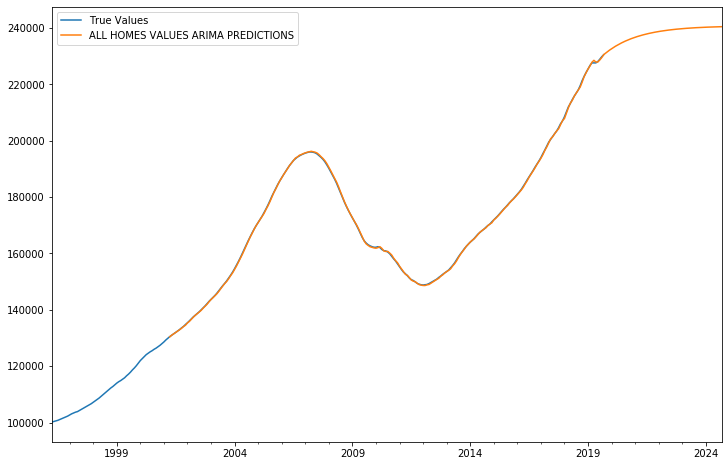

In [269]:
home_values_all_homes_T['United_States'].rename('True Values').plot(legend = True, figsize=(12,8))
all_home_values_predictions.plot(legend = True)

# df_home_values_all_homes_T['United_States'].plot(figsize = (14,5))
# all_home_values_predictions.plot(figsize = (14,5))
# plt.title('US HOMES VALUE PREDICTIONS', size = 20)
# plt.xlabel('Time(Years)', size = 20)
# plt.ylabel('Home Values($)', size = 20)

plt.show()

In [270]:
from statsmodels.tools.eval_measures import rmse
from sklearn.metrics import mean_absolute_error

In [271]:
print("The rmse for all home values is: ", rmse(home_values_all_homes_T['United_States'].iloc [-342:], all_home_values_predictions))
print("The mae for all home values is: ", mean_absolute_error(home_values_all_homes_T['United_States'].iloc [-342:], all_home_values_predictions))

The rmse for all home values is:  41443.96410078279
The mae for all home values is:  37653.67235462763


In [272]:
homes_1B_model = ARIMA(home_value_1Bedroom_T['United_States'], order=(2,1,1))

In [273]:
homes_results_1B = homes_1B_model.fit()

In [274]:
start_1B = "2001-04-01"

In [275]:
end_1B = "2024-09-01"

In [276]:
homes_1B_predictions = homes_results_1B.predict(start_1B, end_1B, typ='levels').rename('1 BEDROOM VALUES ARIMA PREDICTIONS')

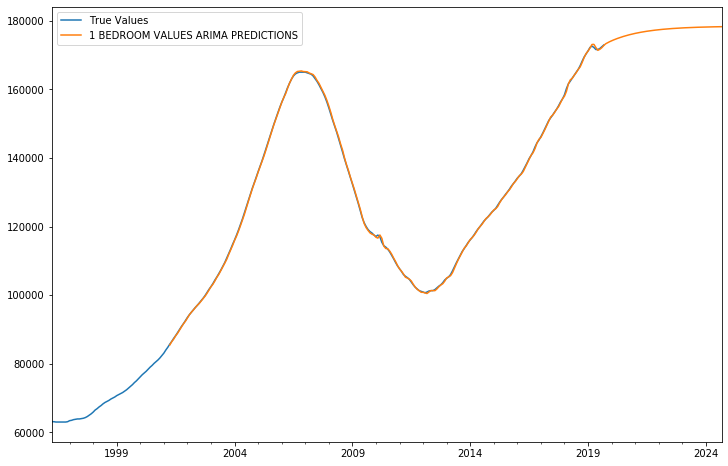

In [277]:
home_value_1Bedroom_T['United_States'].rename('True Values').plot(legend = True, figsize=(12,8))
homes_1B_predictions.plot(legend = True)

In [278]:
print("The rmse for 1 Bedroom values is: ", rmse(home_value_1Bedroom_T['United_States'].iloc [-342:], homes_1B_predictions))
print("The mae for 1 Bedroom values is: ", mean_absolute_error(home_value_1Bedroom_T['United_States'].iloc [-342:], homes_1B_predictions))

The rmse for 1 Bedroom values is:  43892.94066166344
The mae for 1 Bedroom values is:  39221.211805106286


In [279]:
homes_2B_model = ARIMA(home_value_2Bedroom_T['United_States'], order=(1,1,2))

In [280]:
homes_results_2B = homes_2B_model.fit()

In [281]:
start_2B = "2001-04-01"

In [282]:
end_2B = "2024-09-01"

In [283]:
homes_2B_predictions = homes_results_2B.predict(start_2B, end_2B, typ='levels').rename('2 BEDROOM VALUES ARIMA PREDICTIONS')

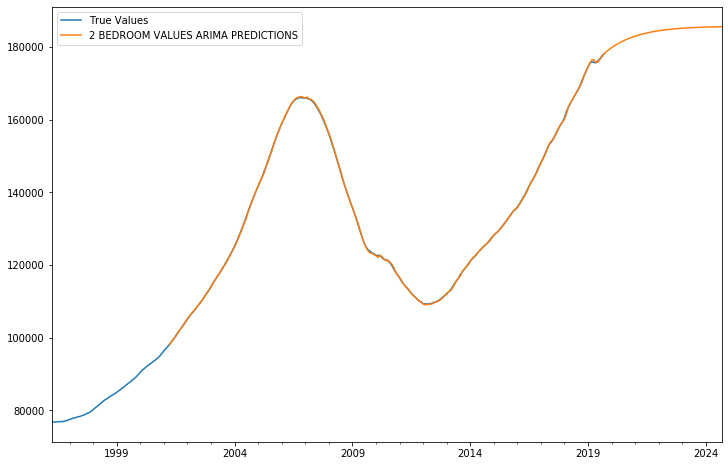

In [284]:
home_value_2Bedroom_T['United_States'].rename('True Values').plot(legend = True, figsize=(12,8))
homes_2B_predictions.plot(legend = True)

In [285]:
print("The rmse for 2 Bedroom values is: ", rmse(home_value_2Bedroom_T['United_States'].iloc [-342:], homes_2B_predictions))
print("The mae for 2 Bedroom values is: ", mean_absolute_error(home_value_2Bedroom_T['United_States'].iloc [-342:], homes_2B_predictions))

The rmse for 2 Bedroom values is:  39820.03369680412
The mae for 2 Bedroom values is:  35979.33852247033


In [286]:
homes_3B_model = ARIMA(home_value_3Bedroom_T['United_States'], order=(2,1,3))

In [287]:
homes_results_3B = homes_3B_model.fit()

In [288]:
start_3B = "2001-04-01"

In [289]:
end_3B = "2024-09-01"

In [290]:
homes_3B_predictions = homes_results_3B.predict(start_3B, end_3B, typ='levels').rename('3 BEDROOM VALUES ARIMA PREDICTIONS')

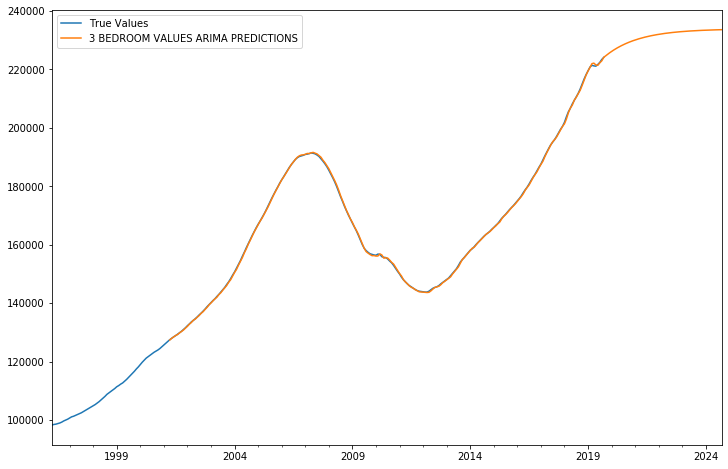

In [291]:
home_value_3Bedroom_T['United_States'].rename('True Values').plot(legend = True, figsize=(12,8))
homes_3B_predictions.plot(legend = True)

In [292]:
print("The rmse for 3 Bedroom values is: ", rmse(home_value_3Bedroom_T['United_States'].iloc [-342:], homes_3B_predictions))
print("The mae for 3 Bedroom values is: ", mean_absolute_error(home_value_3Bedroom_T['United_States'].iloc [-342:], homes_3B_predictions))

The rmse for 3 Bedroom values is:  40809.34856769631
The mae for 3 Bedroom values is:  37105.466872225574


In [293]:
homes_4B_model = ARIMA(home_value_4Bedroom_T['United_States'], order=(2,1,3))

In [294]:
homes_results_4B = homes_4B_model.fit()

In [295]:
start_4B = "2001-04-01"

In [296]:
end_4B = "2024-09-01"

In [297]:
homes_4B_predictions = homes_results_4B.predict(start_4B, end_4B, typ='levels').rename('4 BEDROOM VALUES ARIMA PREDICTIONS')

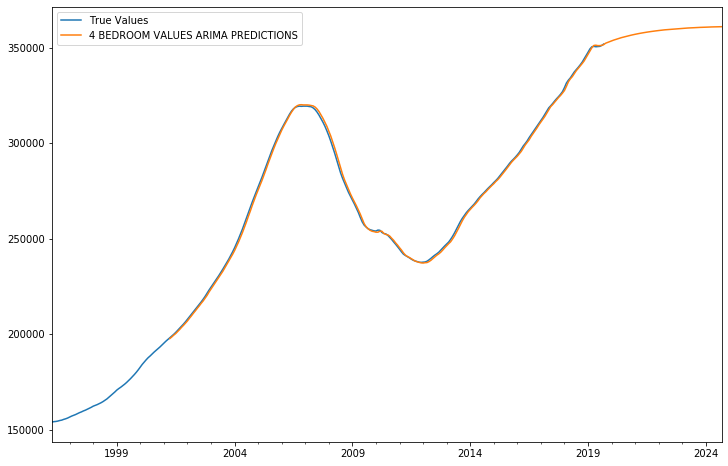

In [298]:
home_value_4Bedroom_T['United_States'].rename('True Values').plot(legend = True, figsize=(12,8))
homes_4B_predictions.plot(legend = True)

In [299]:
print("The rmse for 4 Bedroom values is: ", rmse(home_value_4Bedroom_T['United_States'].iloc [-342:], homes_4B_predictions))
print("The mae for 4 Bedroom values is: ", mean_absolute_error(home_value_4Bedroom_T['United_States'].iloc [-342:], homes_4B_predictions))

The rmse for 4 Bedroom values is:  65928.51651930444
The mae for 4 Bedroom values is:  59171.32537877208


In [300]:
homes_5B_model = ARIMA(home_value_5BedroomOrMore_T['United_States'], order=(2,1,4))

In [301]:
homes_results_5B = homes_5B_model.fit()

In [302]:
start_5B = "2001-04-01"

In [303]:
end_5B = "2024-09-01"

In [304]:
homes_5B_predictions = homes_results_5B.predict(start_4B, end_4B, typ='levels').rename('5 BEDROOM OR MORE VALUES ARIMA PREDICTIONS')

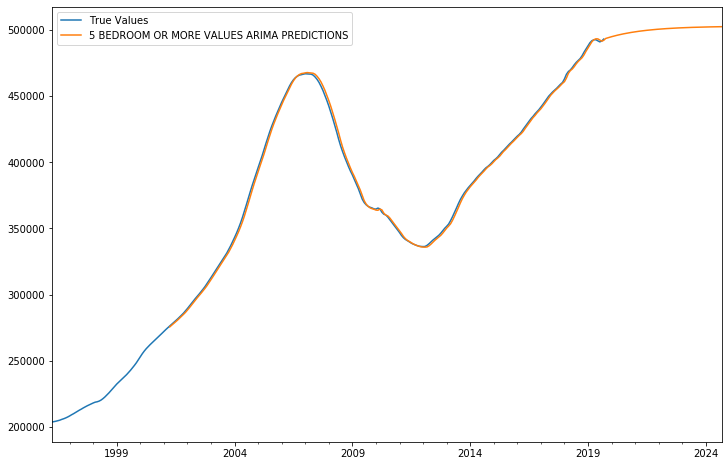

In [305]:
home_value_5BedroomOrMore_T['United_States'].rename('True Values').plot(legend = True, figsize=(12,8))
homes_5B_predictions.plot(legend = True)

In [306]:
print("The rmse for 5 Bedroom values is: ", rmse(home_value_5BedroomOrMore_T['United_States'].iloc [-342:], homes_5B_predictions))
print("The mae for 5 Bedroom values is: ", mean_absolute_error(home_value_5BedroomOrMore_T['United_States'].iloc [-342:], homes_5B_predictions))

The rmse for 5 Bedroom values is:  98125.03862864886
The mae for 5 Bedroom values is:  87072.83064874049


In [307]:
sale_prices_model = ARIMA(sale_prices_T['United_States'], order=(3,1,1))

In [308]:
sale_prices_results = sale_prices_model.fit()

In [309]:
start_sale_prices = "2013-03-01"

In [310]:
end_sale_prices = "2024-09-01"

In [311]:
sale_prices_predictions = sale_prices_results.predict(start_sale_prices, end_sale_prices, typ='levels').rename('HOUSE SALE PRICES ARIMA PREDICTIONS')

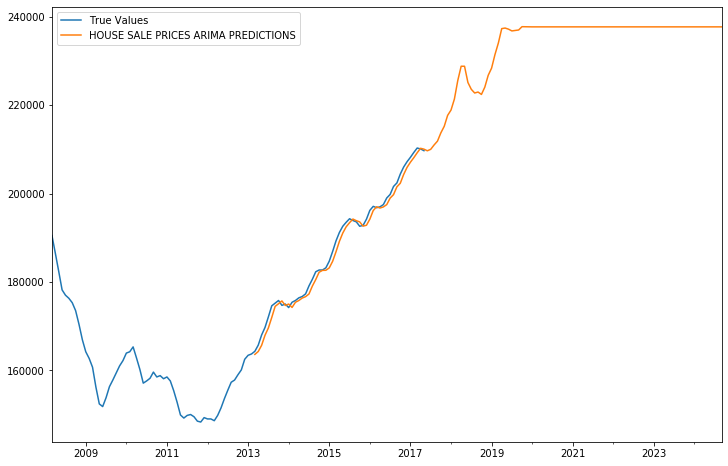

In [312]:
df_sale_prices_T['United_States'].rename('True Values').plot(legend = True, figsize=(12,8))
sale_prices_predictions.plot(legend = True)

In [313]:
print("The rmse for sale prices is: ", rmse(sale_prices_T['United_States'].iloc[-198:], sale_prices_predictions))
print("The mae for 5 Bedroom values is: ", mean_absolute_error(sale_prices_T['United_States'].iloc [-198:], sale_prices_predictions))

The rmse for sale prices is:  39018.111510396186
The mae for 5 Bedroom values is:  34263.244337919656


## FACEBOOK'S PROPHET LIBRARY

In [314]:
from fbprophet import Prophet

In [315]:
home_values_all_homes_T.reset_index(inplace=True)
home_value_1Bedroom_T.reset_index(inplace=True)
home_value_2Bedroom_T.reset_index(inplace=True)
home_value_3Bedroom_T.reset_index(inplace=True)
home_value_4Bedroom_T.reset_index(inplace=True)
home_value_5BedroomOrMore_T.reset_index(inplace=True)
sale_prices_T.reset_index(inplace=True)

In [316]:
home_values_all_homes_T.columns = ['ds', 'y', 'm', 'w']
home_value_1Bedroom_T.columns = ['ds', 'y', 'm', 'w']
home_value_2Bedroom_T.columns = ['ds', 'y', 'm', 'w']
home_value_3Bedroom_T.columns = ['ds', 'y', 'm', 'w']
home_value_4Bedroom_T.columns = ['ds', 'y', 'm', 'w']
home_value_5BedroomOrMore_T.columns = ['ds', 'y', 'm', 'w']
sale_prices_T.columns = ['ds', 'y', 'm', 'w']

In [317]:
home_values_all_homes_T

,ds,y,m,w
0,1996-04-01,100200.0,162132.894466,100200.000000
1,1996-05-01,100400.0,103082.930404,-3424.525590
2,1996-06-01,100600.0,201016.845053,-982.887599
3,1996-07-01,100800.0,180920.890652,-469.599086
4,1996-08-01,101100.0,175868.903559,-142.536114
...,...,...,...,...
277,2019-05-01,227600.0,197287.539430,-549.100510
278,2019-06-01,228100.0,191628.455950,187.251917
279,2019-07-01,228900.0,167994.640167,440.536491
280,2019-08-01,229800.0,115854.201719,405.129041


In [318]:
sale_prices_T

,ds,y,m,w
0,2008-03-01,190500.00,144333.311564,190500.000000
1,2008-04-01,186500.00,191091.349623,-1220.320044
2,2008-05-01,182400.00,212711.874509,-1757.220856
3,2008-06-01,178200.00,160639.154685,-2240.450743
4,2008-07-01,177000.00,148404.058536,422.973794
...,...,...,...,...
134,2019-05-01,237300.00,168309.803737,-67.519044
135,2019-06-01,236800.00,210107.337301,-303.449826
136,2019-07-01,236900.00,165476.243797,260.980771
137,2019-08-01,237000.00,144507.592061,242.585713


In [319]:
all_homes_model = Prophet()
all_homes_model.fit(home_values_all_homes_T)
homes_1Bedroom = Prophet()
homes_1Bedroom.fit(home_value_1Bedroom_T)
homes_2Bedroom = Prophet()
homes_2Bedroom.fit(home_value_2Bedroom_T)
homes_3Bedroom = Prophet()
homes_3Bedroom.fit(home_value_3Bedroom_T)
homes_4Bedroom = Prophet()
homes_4Bedroom.fit(home_value_4Bedroom_T)
homes_5Bedroom = Prophet()
homes_5Bedroom.fit(home_value_5BedroomOrMore_T)
sale_prices = Prophet()
sale_prices.fit(sale_prices_T)

INFO:numexpr.utils:NumExpr defaulting to 4 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disab

In [320]:
# PLACEHOLDER TO HOLD FUTURE PREDICTIONS

In [321]:
all_homes_future = all_homes_model.make_future_dataframe(periods=60, freq='MS')
homes_1Bedroom_future = homes_1Bedroom.make_future_dataframe(periods=60, freq='MS')
homes_2Bedroom_future = homes_2Bedroom.make_future_dataframe(periods=60, freq='MS')
homes_3Bedroom_future = homes_3Bedroom.make_future_dataframe(periods=60, freq='MS')
homes_4Bedroom_future = homes_4Bedroom.make_future_dataframe(periods=60, freq='MS')
homes_5Bedroom_future = homes_5Bedroom.make_future_dataframe(periods=60, freq='MS')
sale_prices_future = sale_prices.make_future_dataframe(periods=60, freq='MS')

In [322]:
all_homes_forecast = all_homes_model.predict(all_homes_future)
homes_1Bedroom_forecast = homes_1Bedroom.predict(homes_1Bedroom_future)
homes_2Bedroom_forecast = homes_2Bedroom.predict(homes_2Bedroom_future)
homes_3Bedroom_forecast = homes_3Bedroom.predict(homes_3Bedroom_future)
homes_4Bedroom_forecast = homes_4Bedroom.predict(homes_4Bedroom_future)
homes_5Bedroom_forecast = homes_5Bedroom.predict(homes_5Bedroom_future)
sale_prices_forecast = sale_prices.predict(sale_prices_future)

In [323]:
all_homes_forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1996-04-01,99536.081667,98341.655889,100739.584343,99536.081667,99536.081667,37.441598,37.441598,37.441598,37.441598,37.441598,37.441598,0.0,0.0,0.0,99573.523266
1,1996-05-01,99877.247513,98687.254492,101163.287921,99877.247513,99877.247513,51.874979,51.874979,51.874979,51.874979,51.874979,51.874979,0.0,0.0,0.0,99929.122492
2,1996-06-01,100229.785554,99162.980304,101471.383570,100229.785554,100229.785554,44.110279,44.110279,44.110279,44.110279,44.110279,44.110279,0.0,0.0,0.0,100273.895833
3,1996-07-01,100570.951399,99317.291217,101834.231449,100570.951399,100570.951399,22.500431,22.500431,22.500431,22.500431,22.500431,22.500431,0.0,0.0,0.0,100593.451830
4,1996-08-01,100923.489440,99783.334876,102156.035175,100923.489440,100923.489440,30.477182,30.477182,30.477182,30.477182,30.477182,30.477182,0.0,0.0,0.0,100953.966621
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337,2024-05-01,293411.265075,257608.836571,331310.184513,257277.806411,331503.894486,51.874979,51.874979,51.874979,51.874979,51.874979,51.874979,0.0,0.0,0.0,293463.140053
338,2024-06-01,294539.575364,257719.339411,333997.738636,257633.266058,333884.797349,44.110279,44.110279,44.110279,44.110279,44.110279,44.110279,0.0,0.0,0.0,294583.685644
339,2024-07-01,295631.488548,258127.078987,335504.661984,257817.190426,335632.623697,22.500431,22.500431,22.500431,22.500431,22.500431,22.500431,0.0,0.0,0.0,295653.988978
340,2024-08-01,296759.798837,257639.996844,337680.327355,257992.539640,337811.097302,30.477182,30.477182,30.477182,30.477182,30.477182,30.477182,0.0,0.0,0.0,296790.276019


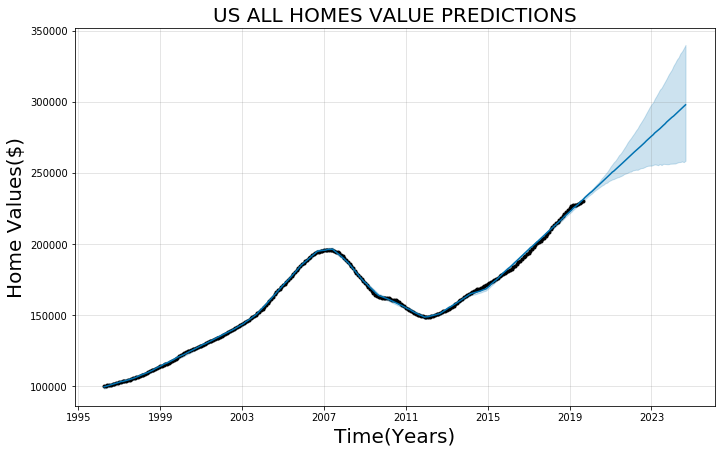

In [324]:
all_homes_model.plot(all_homes_forecast)
plt.title('US ALL HOMES VALUE PREDICTIONS', size = 20)
plt.xlabel('Time(Years)', size = 20)
plt.ylabel('Home Values($)', size = 20)
plt.show()

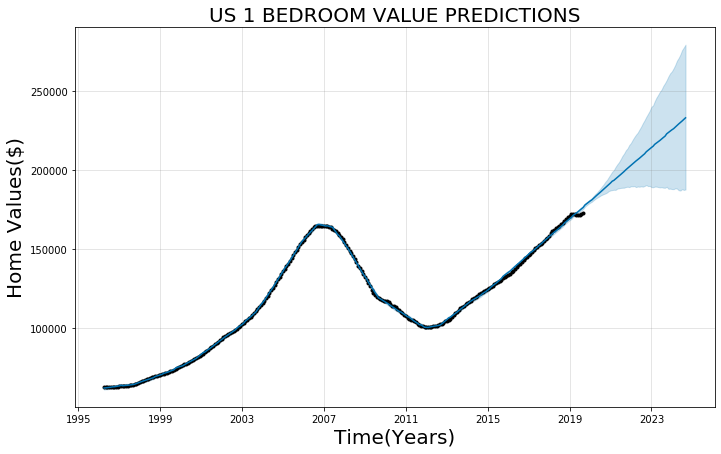

In [325]:
homes_1Bedroom.plot(homes_1Bedroom_forecast)
plt.title('US 1 BEDROOM VALUE PREDICTIONS', size = 20)
plt.xlabel('Time(Years)', size = 20)
plt.ylabel('Home Values($)', size = 20)
plt.show()

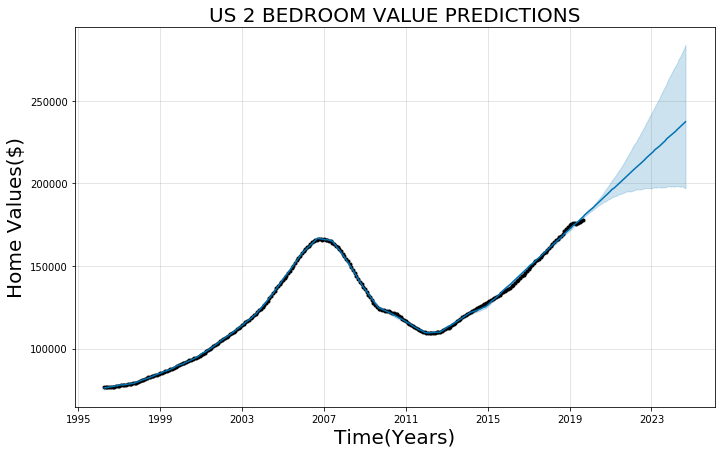

In [326]:
homes_2Bedroom.plot(homes_2Bedroom_forecast)
plt.title('US 2 BEDROOM VALUE PREDICTIONS', size = 20)
plt.xlabel('Time(Years)', size = 20)
plt.ylabel('Home Values($)', size = 20)
plt.show()

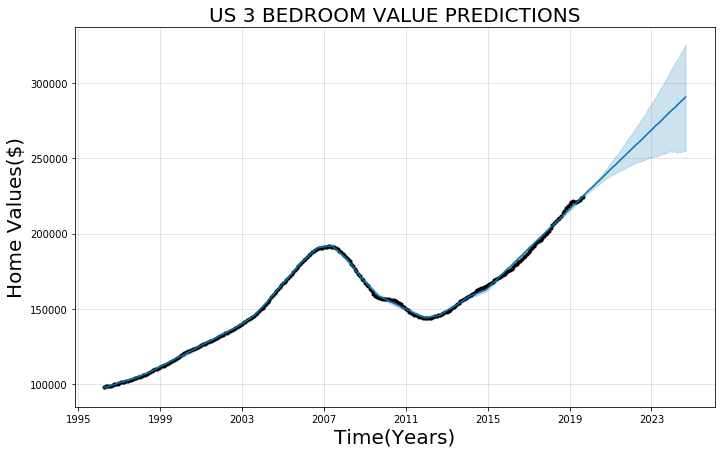

In [327]:
homes_3Bedroom.plot(homes_3Bedroom_forecast)
plt.title('US 3 BEDROOM VALUE PREDICTIONS', size = 20)
plt.xlabel('Time(Years)', size = 20)
plt.ylabel('Home Values($)', size = 20)
plt.show()

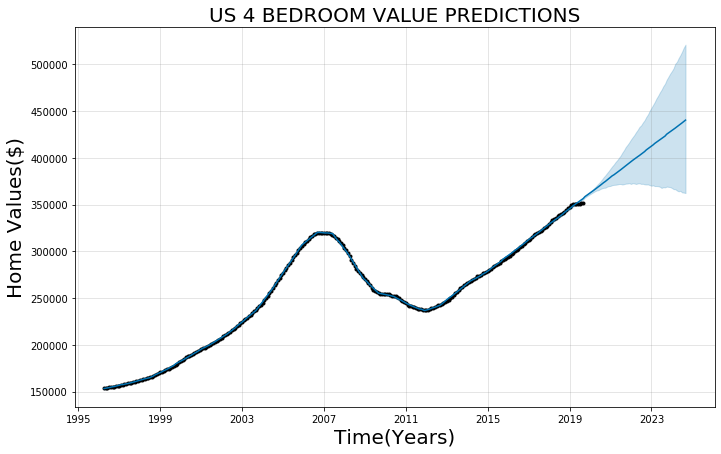

In [328]:
homes_4Bedroom.plot(homes_4Bedroom_forecast)
plt.title('US 4 BEDROOM VALUE PREDICTIONS', size = 20)
plt.xlabel('Time(Years)', size = 20)
plt.ylabel('Home Values($)', size = 20)
plt.show()

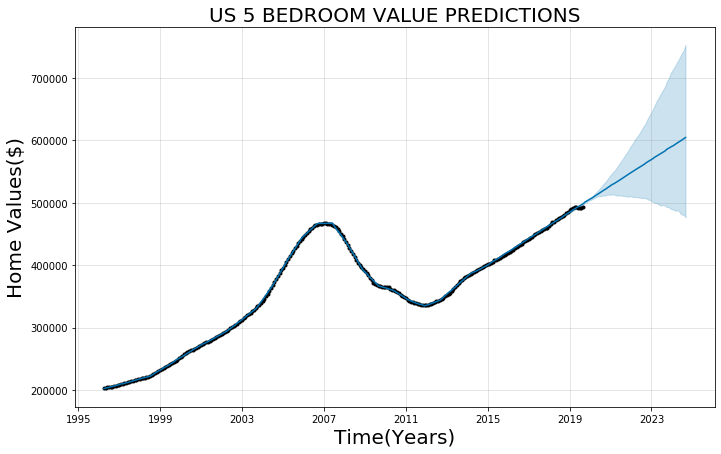

In [329]:
homes_5Bedroom.plot(homes_5Bedroom_forecast)
plt.title('US 5 BEDROOM VALUE PREDICTIONS', size = 20)
plt.xlabel('Time(Years)', size = 20)
plt.ylabel('Home Values($)', size = 20)
plt.show()

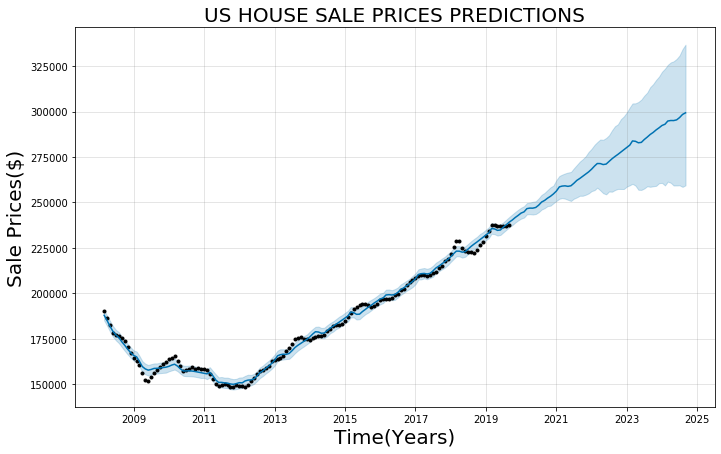

In [330]:
sale_prices.plot(sale_prices_forecast)
plt.title('US HOUSE SALE PRICES PREDICTIONS', size = 20)
plt.xlabel('Time(Years)', size = 20)
plt.ylabel('Sale Prices($)', size = 20)
plt.show()

In [331]:
predictions_all_homes = all_homes_forecast.iloc[-221:]['yhat']
predictions_1Bedroom = homes_1Bedroom_forecast.iloc[-221:]['yhat']
predictions_2Bedroom = homes_2Bedroom_forecast.iloc[-221:]['yhat']
predictions_3Bedroom = homes_3Bedroom_forecast.iloc[-221:]['yhat']
predictions_4Bedroom = homes_4Bedroom_forecast.iloc[-221:]['yhat']
predictions_5Bedroom = homes_5Bedroom_forecast.iloc[-221:]['yhat']
predictions_sale_prices = sale_prices_forecast.iloc[-78:]['yhat']

In [332]:
print("The rmse for all home values is: ", rmse(predictions_all_homes, home_values_all_homes_T['y'].iloc[-221:]))
print("The rmse for 1 Bedroom values is: ", rmse(predictions_1Bedroom, home_value_1Bedroom_T['y'].iloc[-221:]))
print("The rmse for 2 Bedroom values is: ", rmse(predictions_2Bedroom, home_value_2Bedroom_T['y'].iloc[-221:]))
print("The rmse for 3 Bedroom values is: ", rmse(predictions_3Bedroom, home_value_3Bedroom_T['y'].iloc[-221:]))
print("The rmse for 4 Bedroom values is: ", rmse(predictions_4Bedroom, home_value_4Bedroom_T['y'].iloc[-221:]))
print("The rmse for 5 Bedroom values is: ", rmse(predictions_5Bedroom, home_value_5BedroomOrMore_T['y'].iloc[-221:]))
print("The rmse for sale prices is: ", rmse(predictions_sale_prices, sale_prices_T['y'].iloc[-78:]))

The rmse for all home values is:  48890.16858921716
The rmse for 1 Bedroom values is:  48827.946212336734
The rmse for 2 Bedroom values is:  45492.56293279017
The rmse for 3 Bedroom values is:  48364.42633935388
The rmse for 4 Bedroom values is:  71663.13825477345
The rmse for 5 Bedroom values is:  102064.77362625972
The rmse for sale prices is:  58844.430101477046


In [333]:
print("The mae for all home values is: ", mean_absolute_error(home_values_all_homes_T['y'].iloc[-221:], predictions_all_homes))
print("The mae for 1 Bedroom values is: ", mean_absolute_error(home_value_1Bedroom_T['y'].iloc[-221:], predictions_1Bedroom))
print("The mae for 2 Bedroom values is: ", mean_absolute_error(home_value_2Bedroom_T['y'].iloc[-221:], predictions_2Bedroom))
print("The mae for 3 Bedroom values is: ", mean_absolute_error(home_value_3Bedroom_T['y'].iloc[-221:], predictions_3Bedroom))
print("The mae for 4 Bedroom values is: ", mean_absolute_error(home_value_4Bedroom_T['y'].iloc[-221:], predictions_4Bedroom))
print("The mae for 5 Bedroom values is: ", mean_absolute_error(home_value_5BedroomOrMore_T['y'].iloc[-221:], predictions_5Bedroom))
print("The mae for sale prices is: ", mean_absolute_error(sale_prices_T['y'].iloc[-78:], predictions_sale_prices))

The mae for all home values is:  43900.77326686785
The mae for 1 Bedroom values is:  45007.32583914579
The mae for 2 Bedroom values is:  41479.07641897613
The mae for 3 Bedroom values is:  43523.449085433764
The mae for 4 Bedroom values is:  65878.16330270526
The mae for 5 Bedroom values is:  93752.18124048924
The mae for sale prices is:  58769.46701715359
